In [249]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [250]:
pip install -U seaborn 

Note: you may need to restart the kernel to use updated packages.


In [251]:
# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Importing various classifiers and ensemble methods from sklearn
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Importing Support Vector Classifier from sklearn
from sklearn.svm import SVC

# Importing K-Nearest Neighbors Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importing functions for cross-validation and train-test splitting from sklearn
from sklearn.model_selection import cross_val_score, train_test_split

# Importing metrics for model evaluation from sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing seaborn for statistical data visualization
import seaborn as sns

from sklearn import metrics

In [252]:
df=pd.read_csv('Compiled_data.csv')

In [253]:
df=df.iloc[:,1:]

In [254]:
df_for_val=df.copy()

In [255]:
df.drop('IC50',axis=1,inplace=True)

In [256]:
df.pivot_table(columns='Class',values='RDF20p',aggfunc='count').iloc[0]

Class
0    146
1    146
2    292
Name: RDF20p, dtype: int64

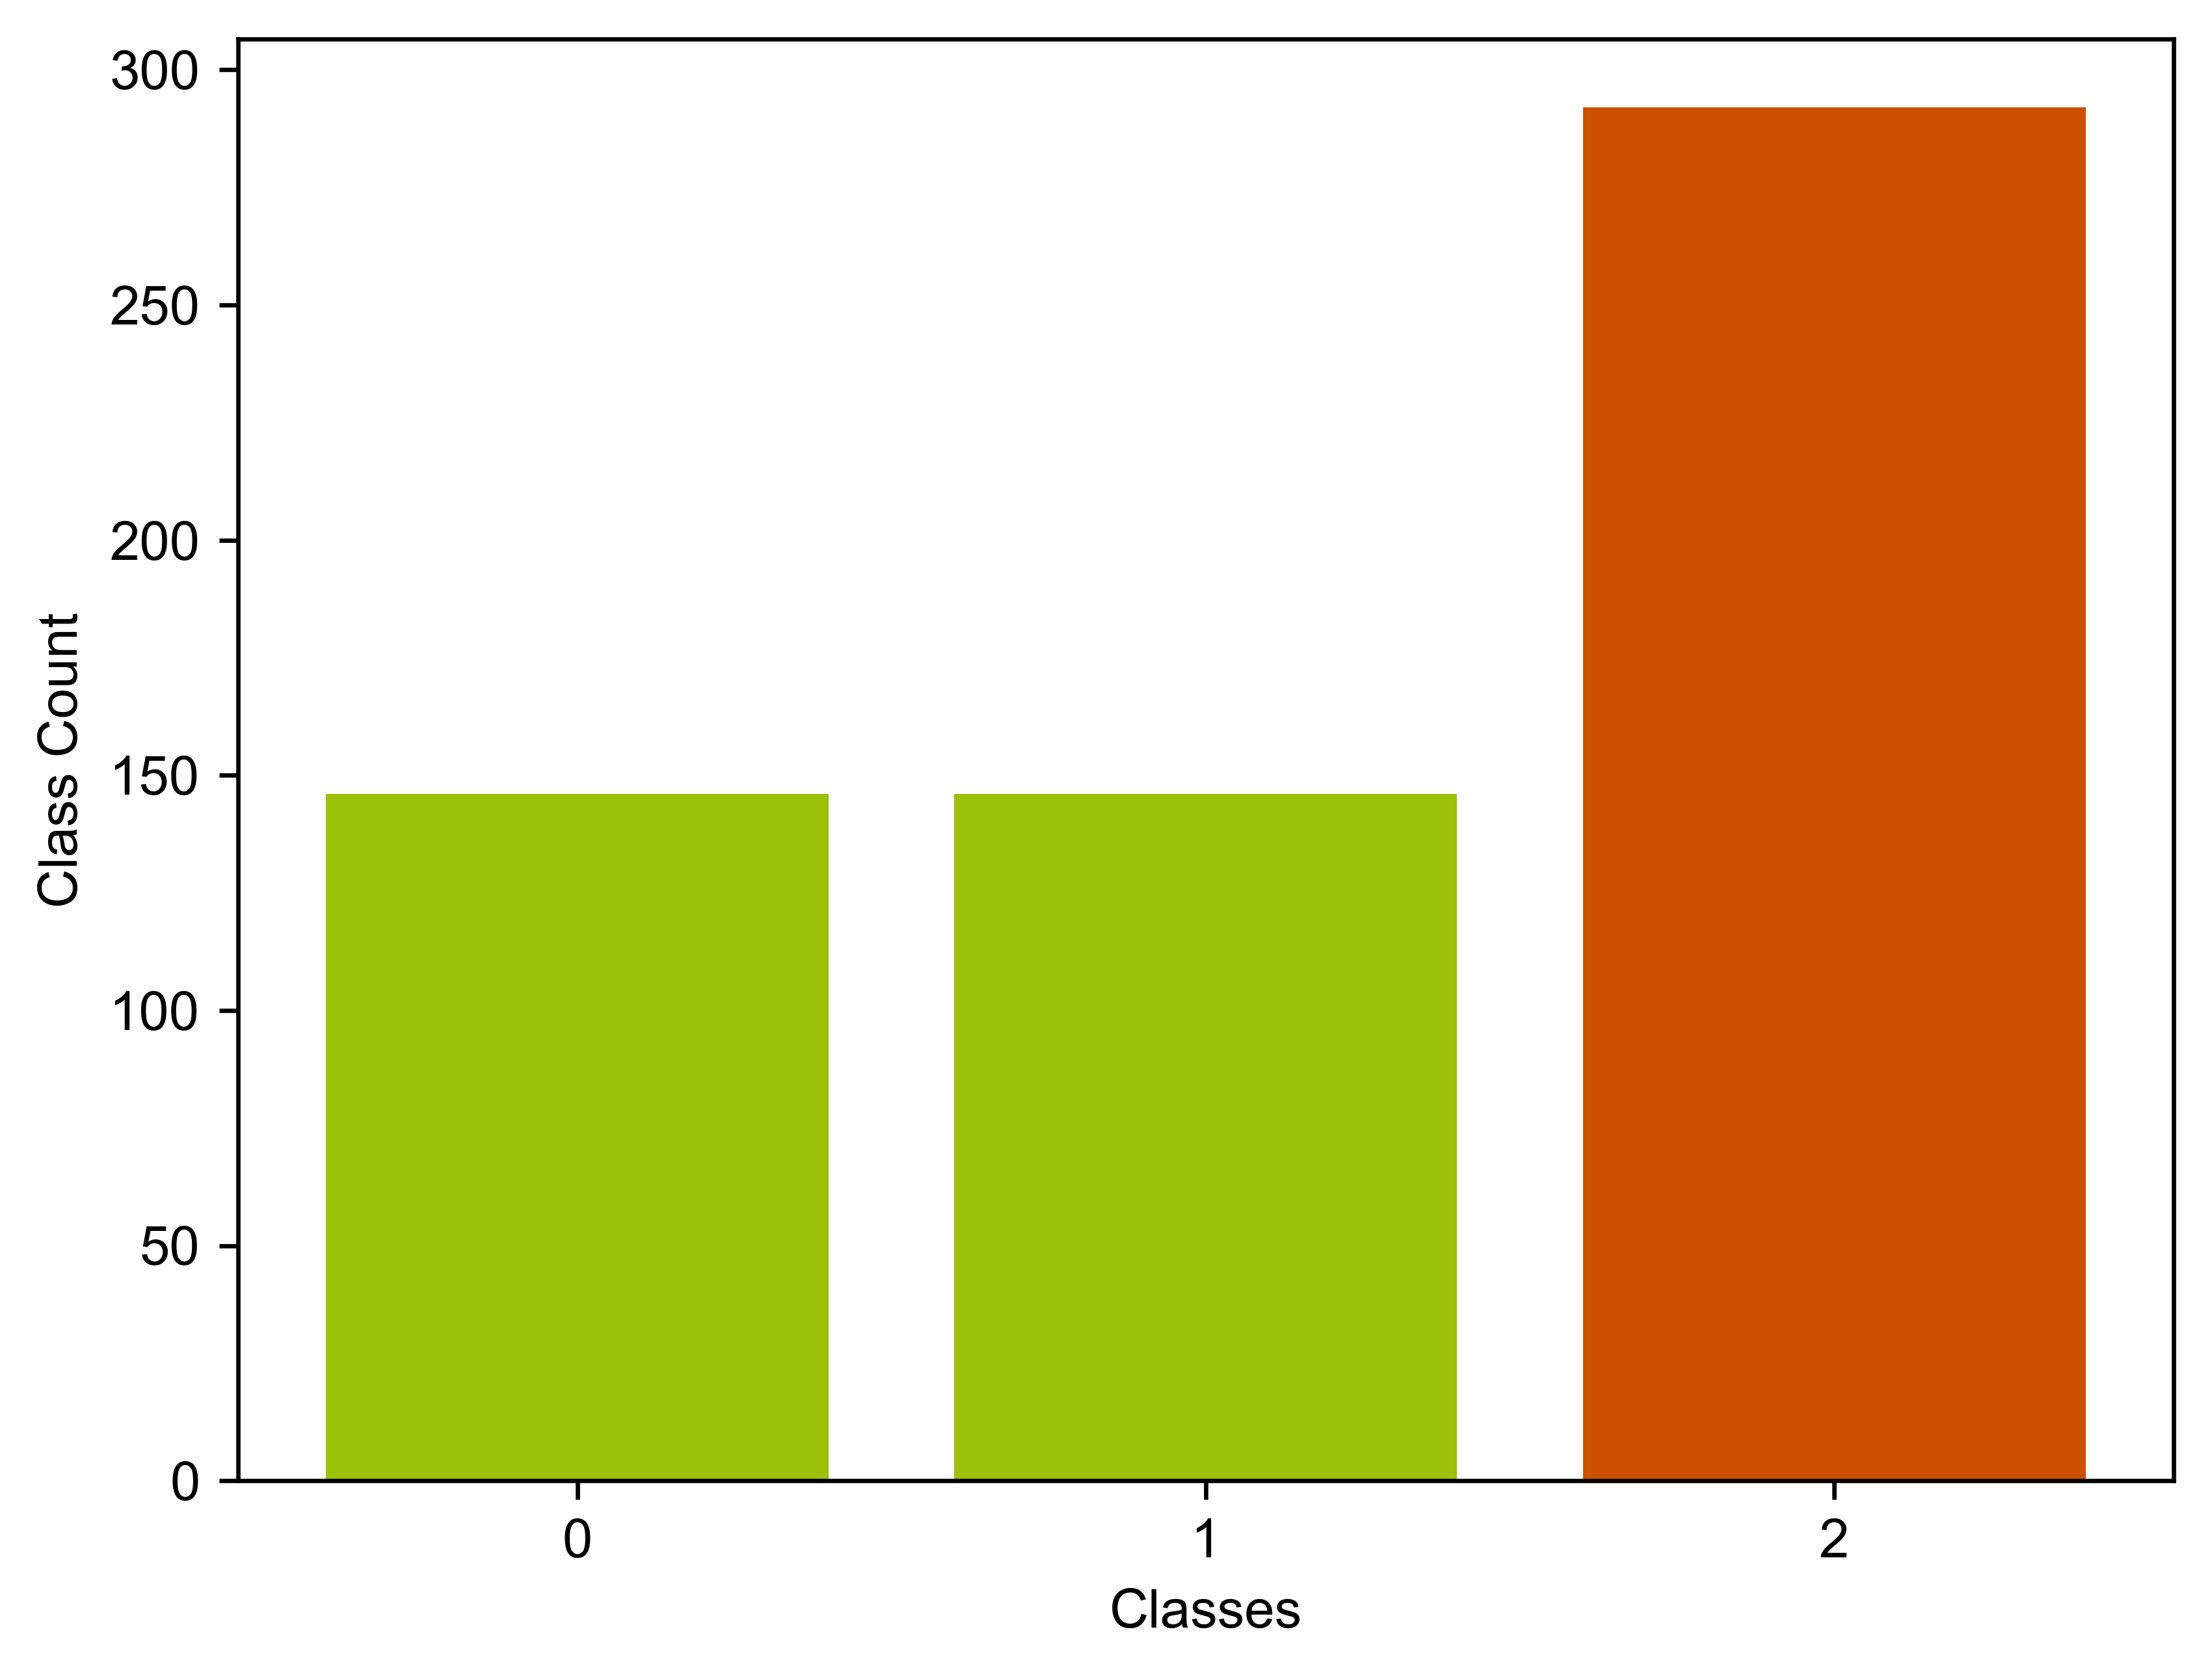

In [257]:
plt.bar(x=df.pivot_table(columns='Class',values='RDF20p',aggfunc='count').columns,height=df.pivot_table(columns='Class',values='RDF20p',aggfunc='count').iloc[0],color=['#9bc209','#9bc209','#cc5000'])
plt.ylabel('Class Count',fontfamily='Arial',fontweight='21')
plt.xlabel('Classes',fontfamily='Arial',fontweight='21')
plt.xticks(np.arange(0,3),[0,1,2],fontfamily='Arial',fontweight=21)
plt.yticks(fontfamily='Arial',fontweight=21)
plt.savefig('classdivision_model2.png', dpi=600, format='png')

In [258]:
x=df.drop('Class',axis=1)
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [259]:
clf1=RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features=50)
clf2=HistGradientBoostingClassifier(max_iter=262,learning_rate=0.12,min_samples_leaf=40,l2_regularization=8,max_bins=255,random_state=42)
clf3=SVC(C=400,kernel='rbf',gamma='scale',probability=True)
clf4=XGBClassifier()
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [260]:
y_pred=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)
y_pred3=clf3.predict(x_test)

In [261]:
y_pred4=clf3.predict(x_test)
accuracy_score(y_test,y_pred4)

0.7008547008547008

In [262]:
Rf_accuracy=accuracy_score(y_test,y_pred)

In [263]:
Rf_accuracy

0.7777777777777778

In [264]:
histGradient_boost_accuracy=accuracy_score(y_pred2,y_test)

In [265]:
SVC_accuracy=accuracy_score(y_test,y_pred3)

In [266]:
SVC_accuracy

0.7008547008547008

In [267]:
y_pred2

array([0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 2, 2])

In [268]:
y_pred4=clf4.predict(x_test)

In [269]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.79      0.79      0.79        29\n           1       0.41      0.67      0.51        18\n           2       0.95      0.80      0.87        70\n\n    accuracy                           0.78       117\n   macro avg       0.72      0.75      0.72       117\nweighted avg       0.83      0.78      0.79       117\n'

In [270]:
XGBC_accuracy=accuracy_score(y_pred4,y_test)

In [271]:
XGBC_accuracy

0.7692307692307693

In [272]:
histGradient_boost_accuracy

0.8376068376068376

In [273]:
plt.rcParams['figure.dpi'] = 600 

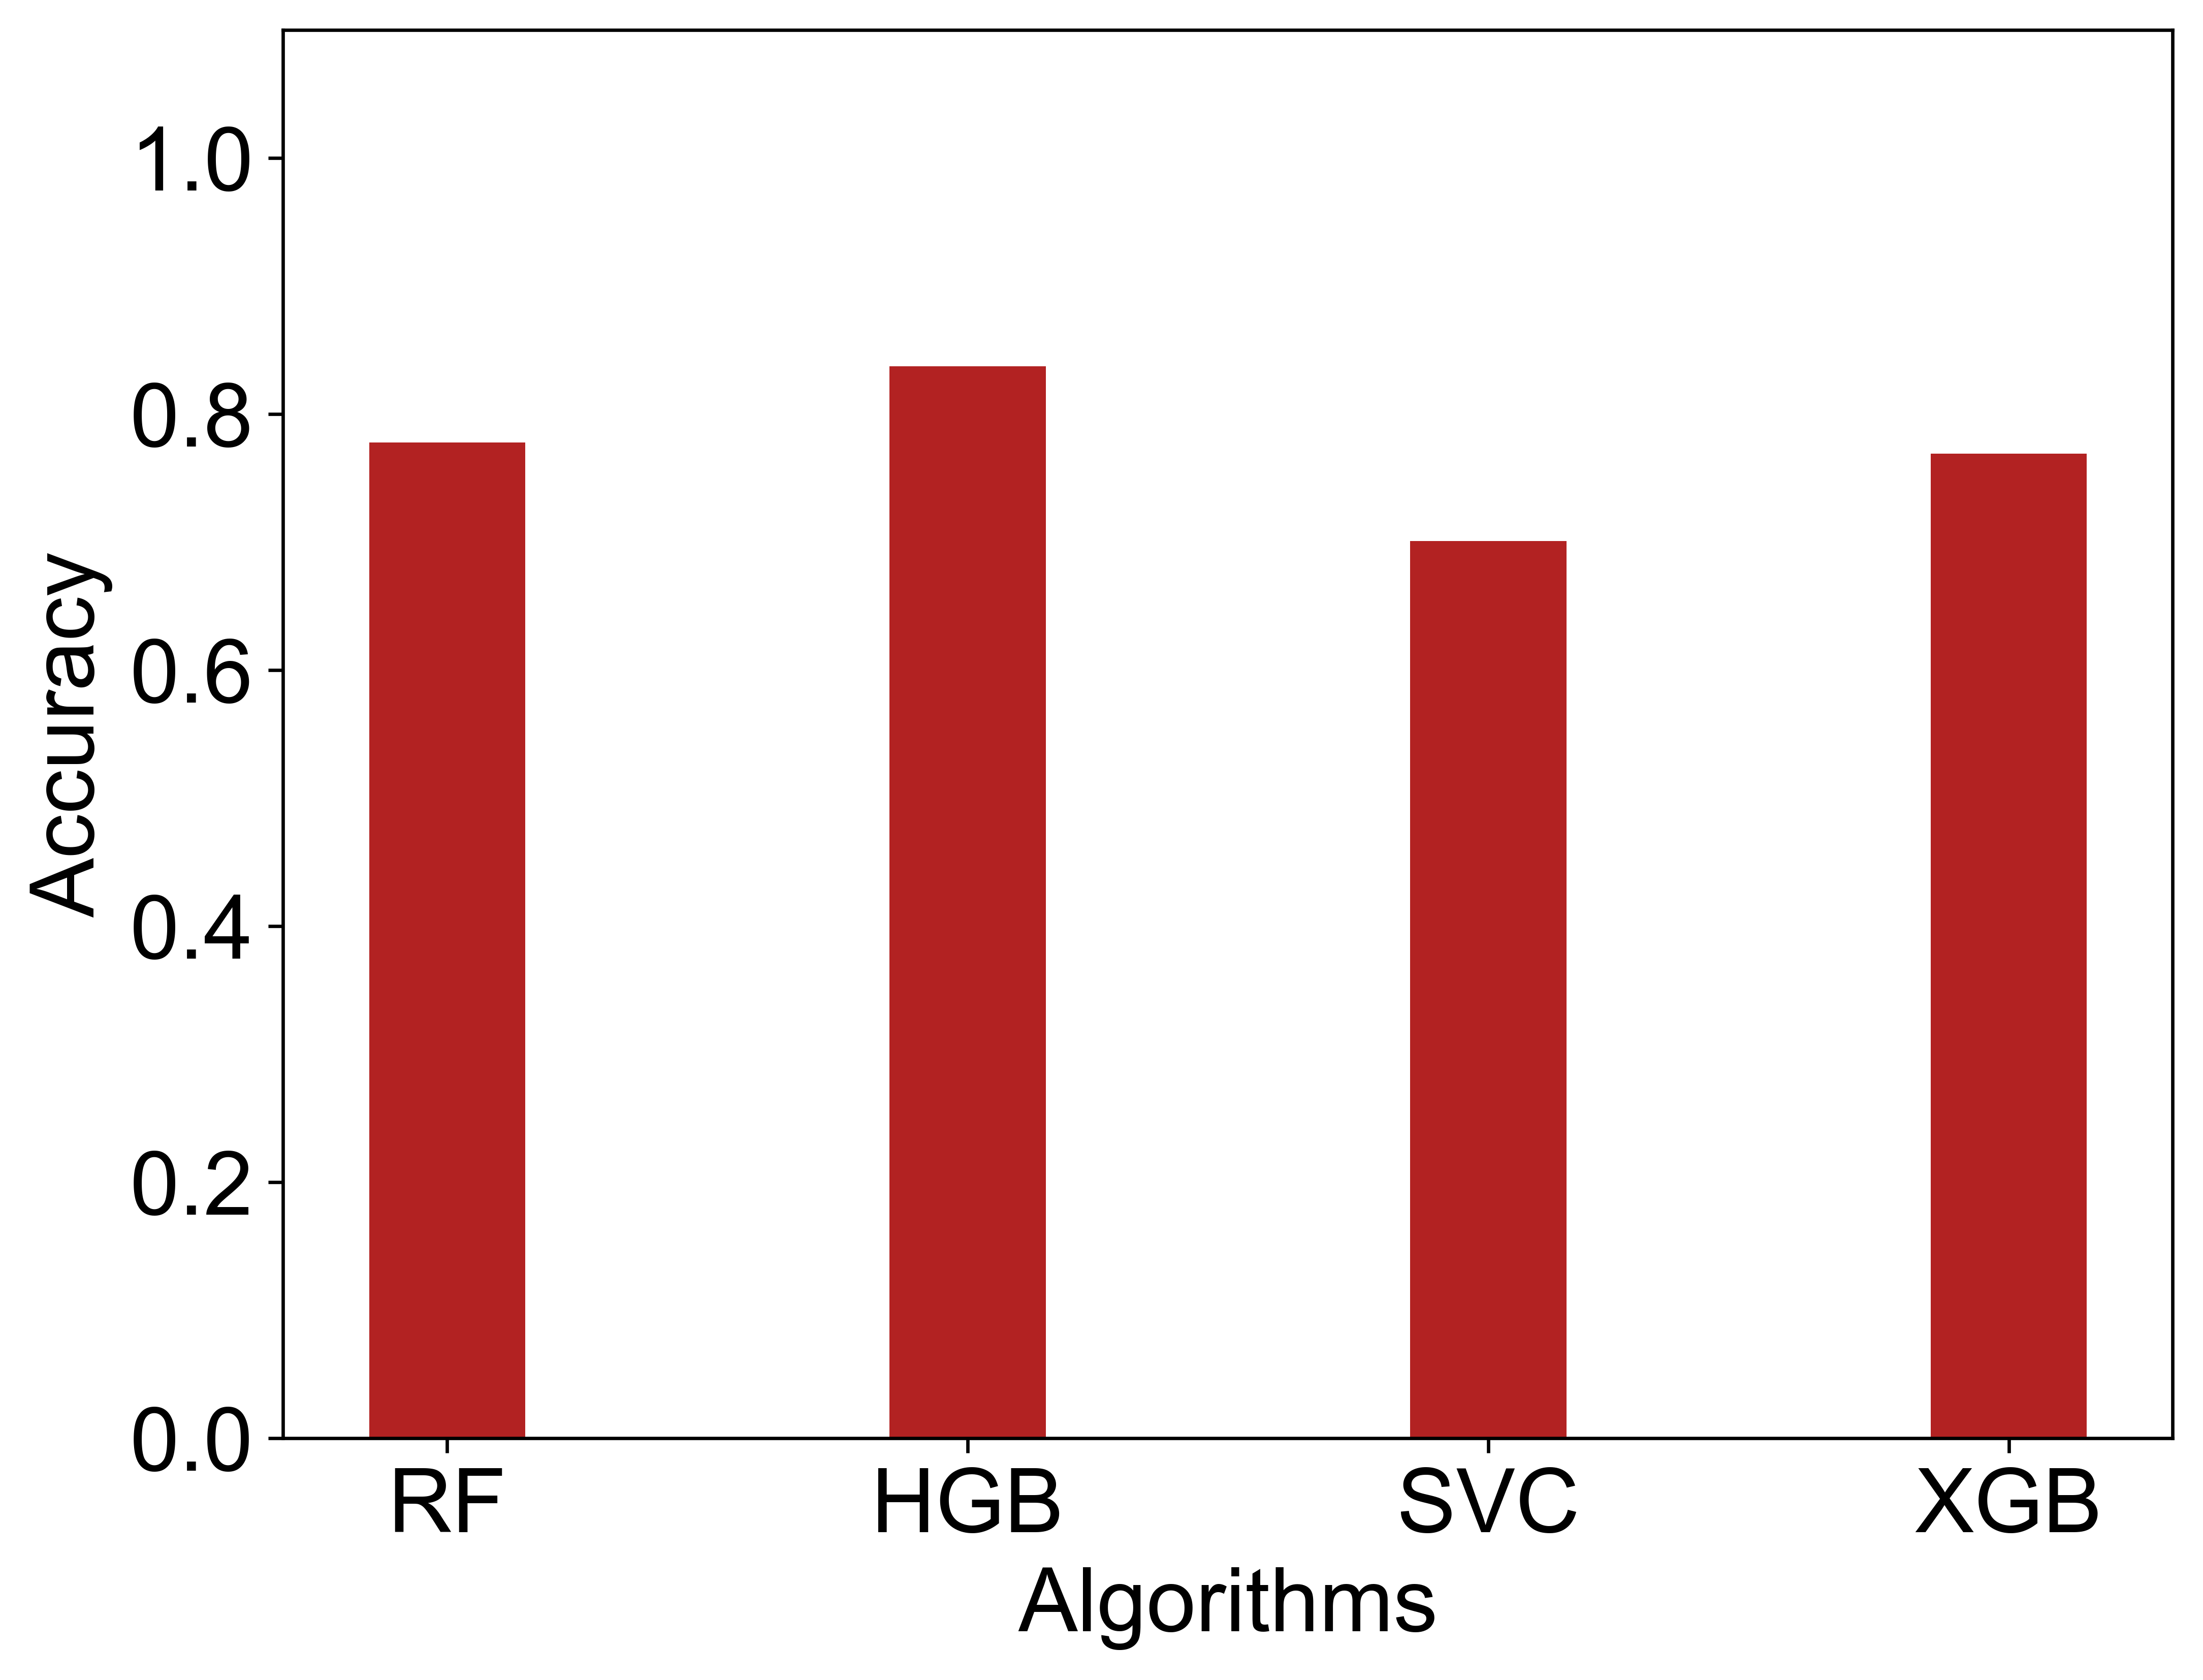

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these accuracy values are defined beforehand
accuracies = [Rf_accuracy, histGradient_boost_accuracy, SVC_accuracy, XGBC_accuracy]

plt.figure(figsize=(8, 6))

# Fixed the error in the bar plot line
plt.bar(x=np.arange(4), width=0.3, height=accuracies, color='firebrick')

# Optional annotation block (commented as in your code)
# for i, j in zip(np.arange(4), [round(Rf_accuracy, 2), round(histGradient_boost_accuracy, 2), round(SVC_accuracy, 2), round(XGBC_accuracy, 2)]):
#     plt.text(x=i-0.16, y=j+0.01, s=j)

plt.ylim(0, 1.1)
plt.xticks(np.arange(4), ['RF', 'HGB', 'SVC', 'XGB'], fontfamily='Arial', fontsize=21, fontweight=21)
plt.yticks(fontfamily='Arial', fontsize=21, fontweight=21)

plt.ylabel('Accuracy', fontfamily='Arial', fontweight=21, fontsize=21)
plt.xlabel('Algorithms', fontfamily='Arial', fontweight=21, fontsize=21)

plt.show()

In [275]:
from sklearn.metrics import recall_score,f1_score,precision_score
recall1=recall_score(y_pred,y_test,average='weighted')
recall2=recall_score(y_pred2,y_test,average='weighted')
recall3=recall_score(y_pred3,y_test,average='weighted')
recall4=recall_score(y_pred4,y_test,average='weighted')
precision1=precision_score(y_pred,y_test,average='weighted')
precision2=precision_score(y_pred2,y_test,average='weighted')
precision3=precision_score(y_pred3,y_test,average='weighted')
precision4=precision_score(y_pred4,y_test,average='weighted')
f1_1=f1_score(y_pred,y_test,average='weighted')
f1_2=f1_score(y_pred2,y_test,average='weighted')
f1_3=f1_score(y_pred3,y_test,average='weighted')
f1_4=f1_score(y_pred4,y_test,average='weighted')

([<matplotlib.axis.XTick at 0x7f6172fe6bc0>,
 [Text(0, 0, 'RF'), Text(1, 0, 'HGB'), Text(2, 0, 'SVC'), Text(3, 0, 'XGB')])

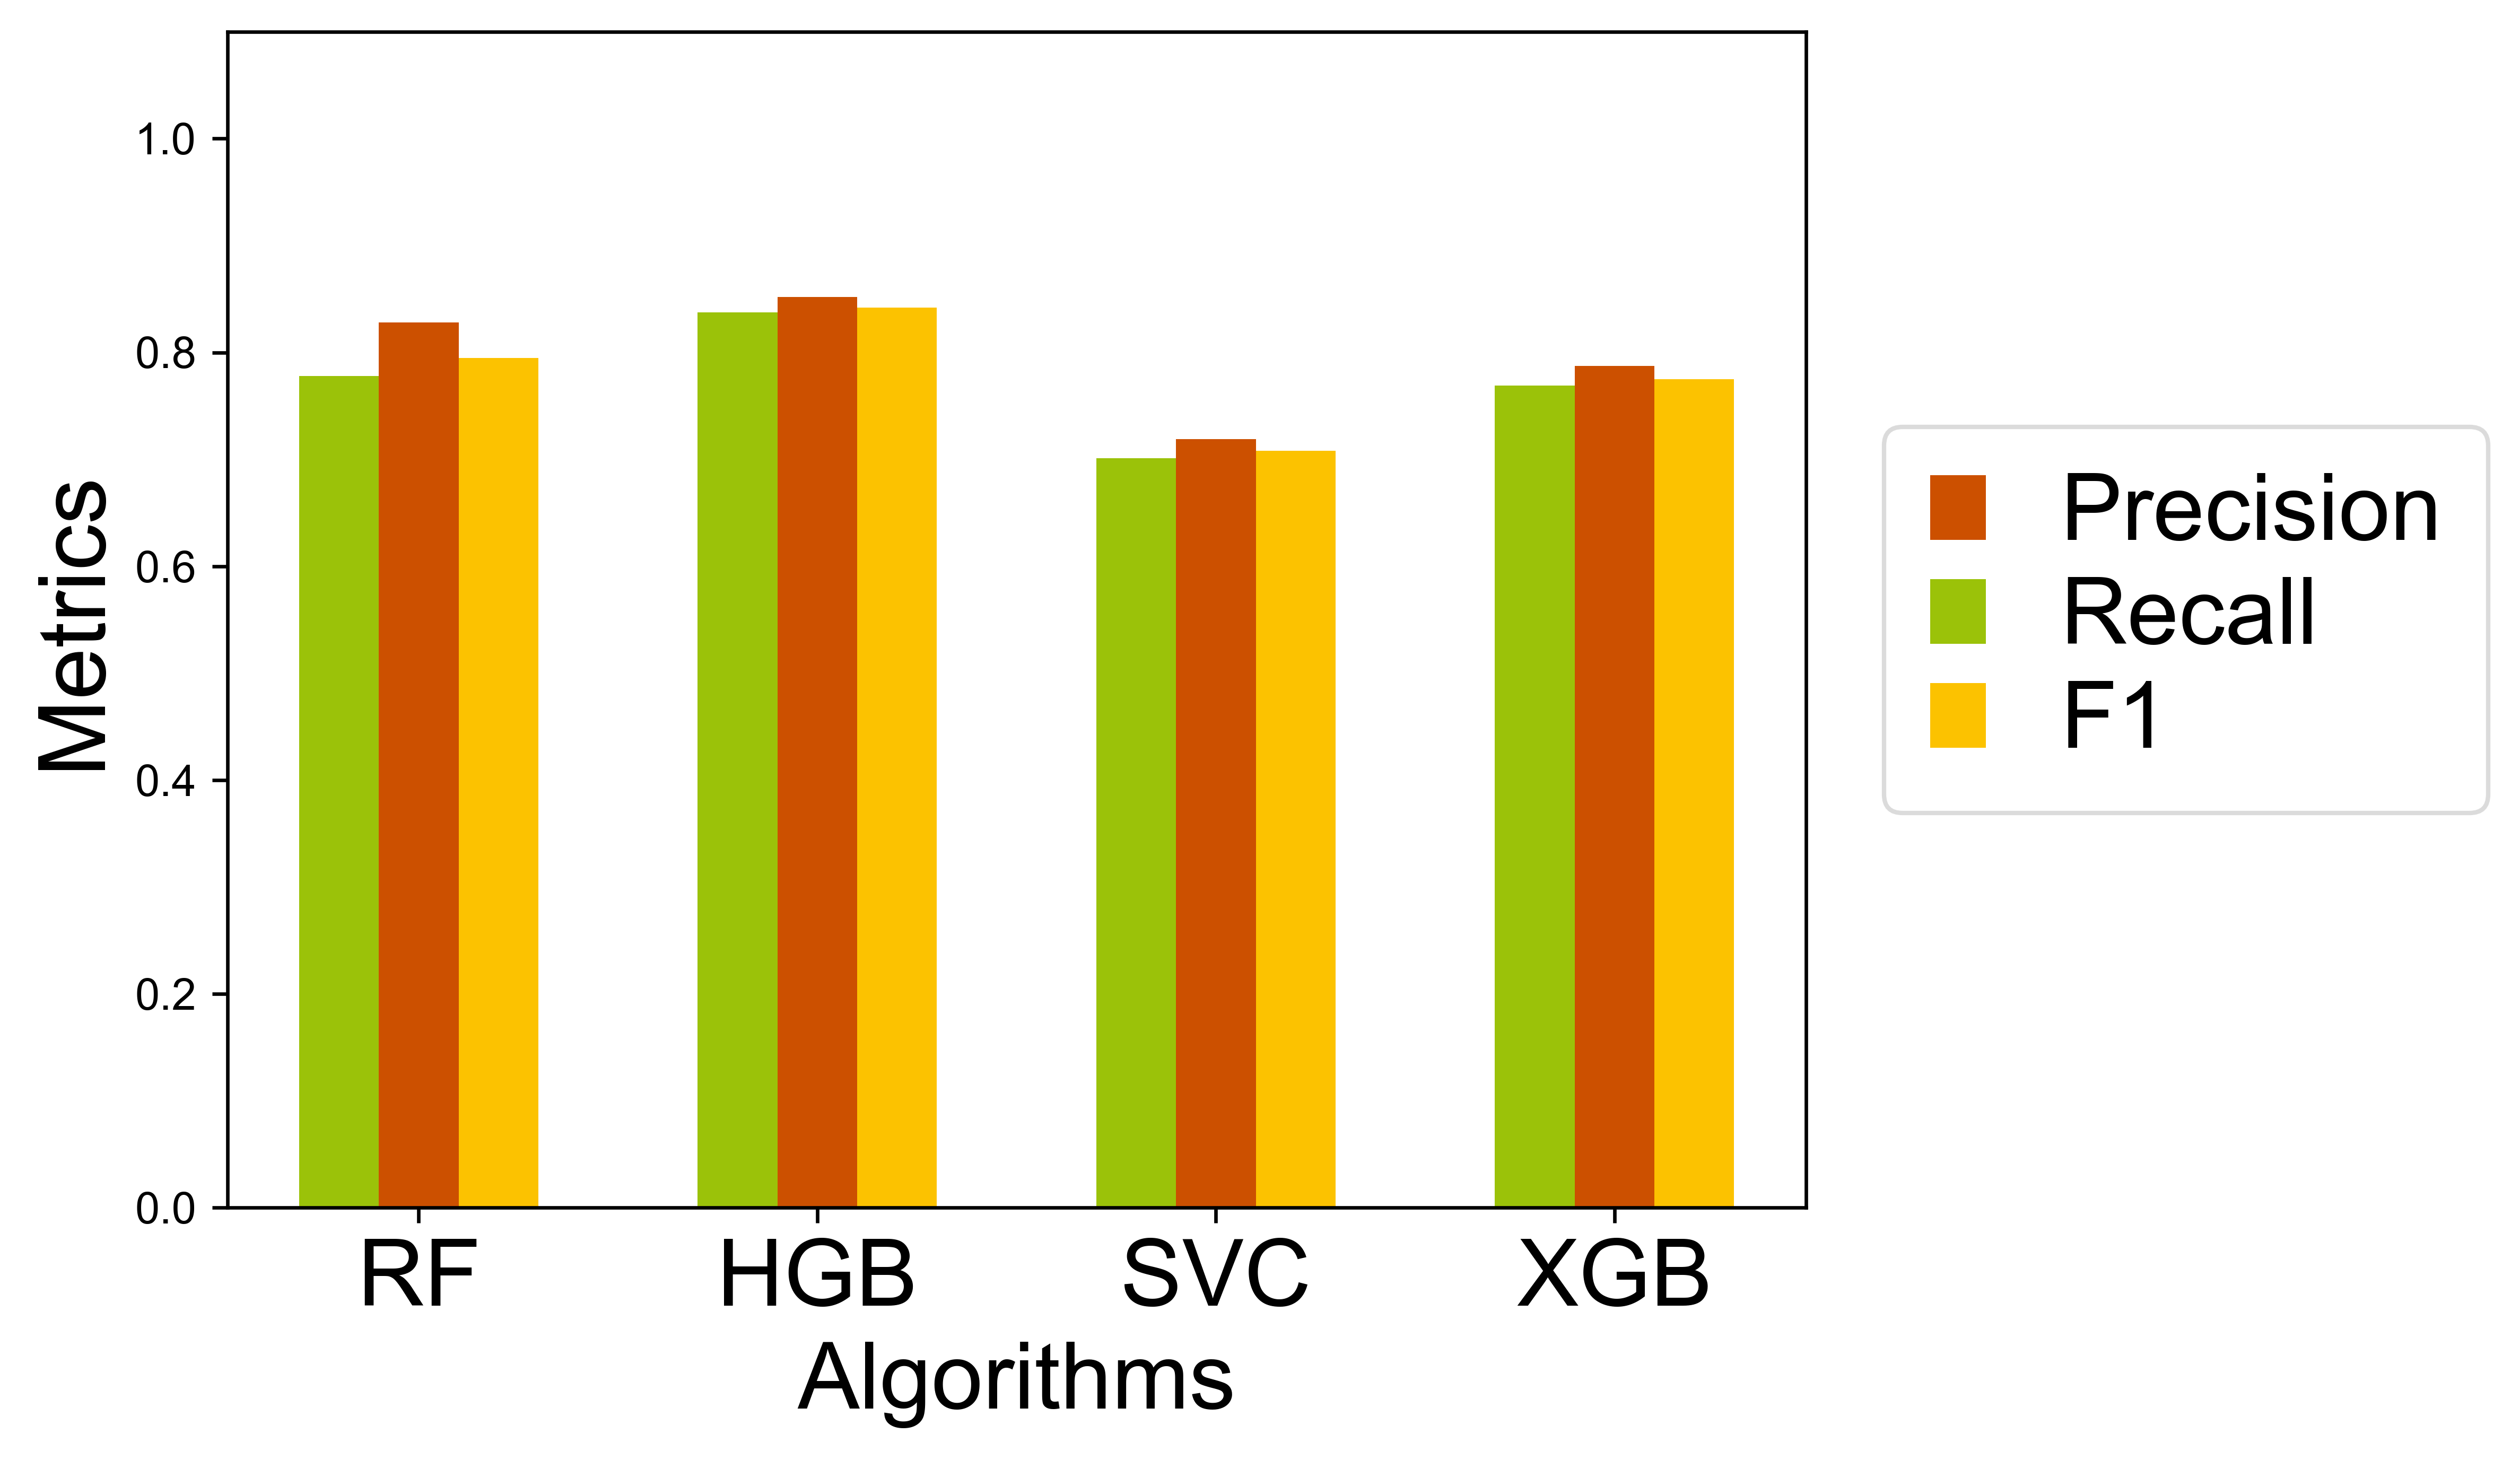

In [276]:
plt.bar(x=np.arange(4),height=[precision1,precision2,precision3,precision4],width=0.2,label='Precision',color='#cc5000')
plt.bar(x=np.arange(4)-0.2,height=[recall1,recall2,recall3,recall4],width=0.2,label='Recall',color='#9bc209')
plt.bar(x=np.arange(4)+0.2,height=[f1_1,f1_2,f1_3,f1_4],width=0.2,label='F1',color='#fcc200')
# Move legend outside the plot (right side)
plt.legend(
    fontsize=4,
    prop={'family': 'Arial', 'size': 21, 'weight':21},
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # move outside the plot
    frameon=True,
    framealpha=0.7,
    borderpad=0.5,
    labelspacing=0.2,
    handlelength=0.6
)
plt.yticks(fontfamily='Arial', fontweight=21)
plt.ylabel('Metrics', fontfamily='Arial', fontweight=21, fontsize=21)
plt.xlabel('Algorithms', fontfamily='Arial', fontweight=21, fontsize=21)
plt.ylim(0,1.1)
plt.xticks(np.arange(4), ['RF', 'HGB', 'SVC', 'XGB'],fontsize=21,fontweight=21,fontfamily='Arial')

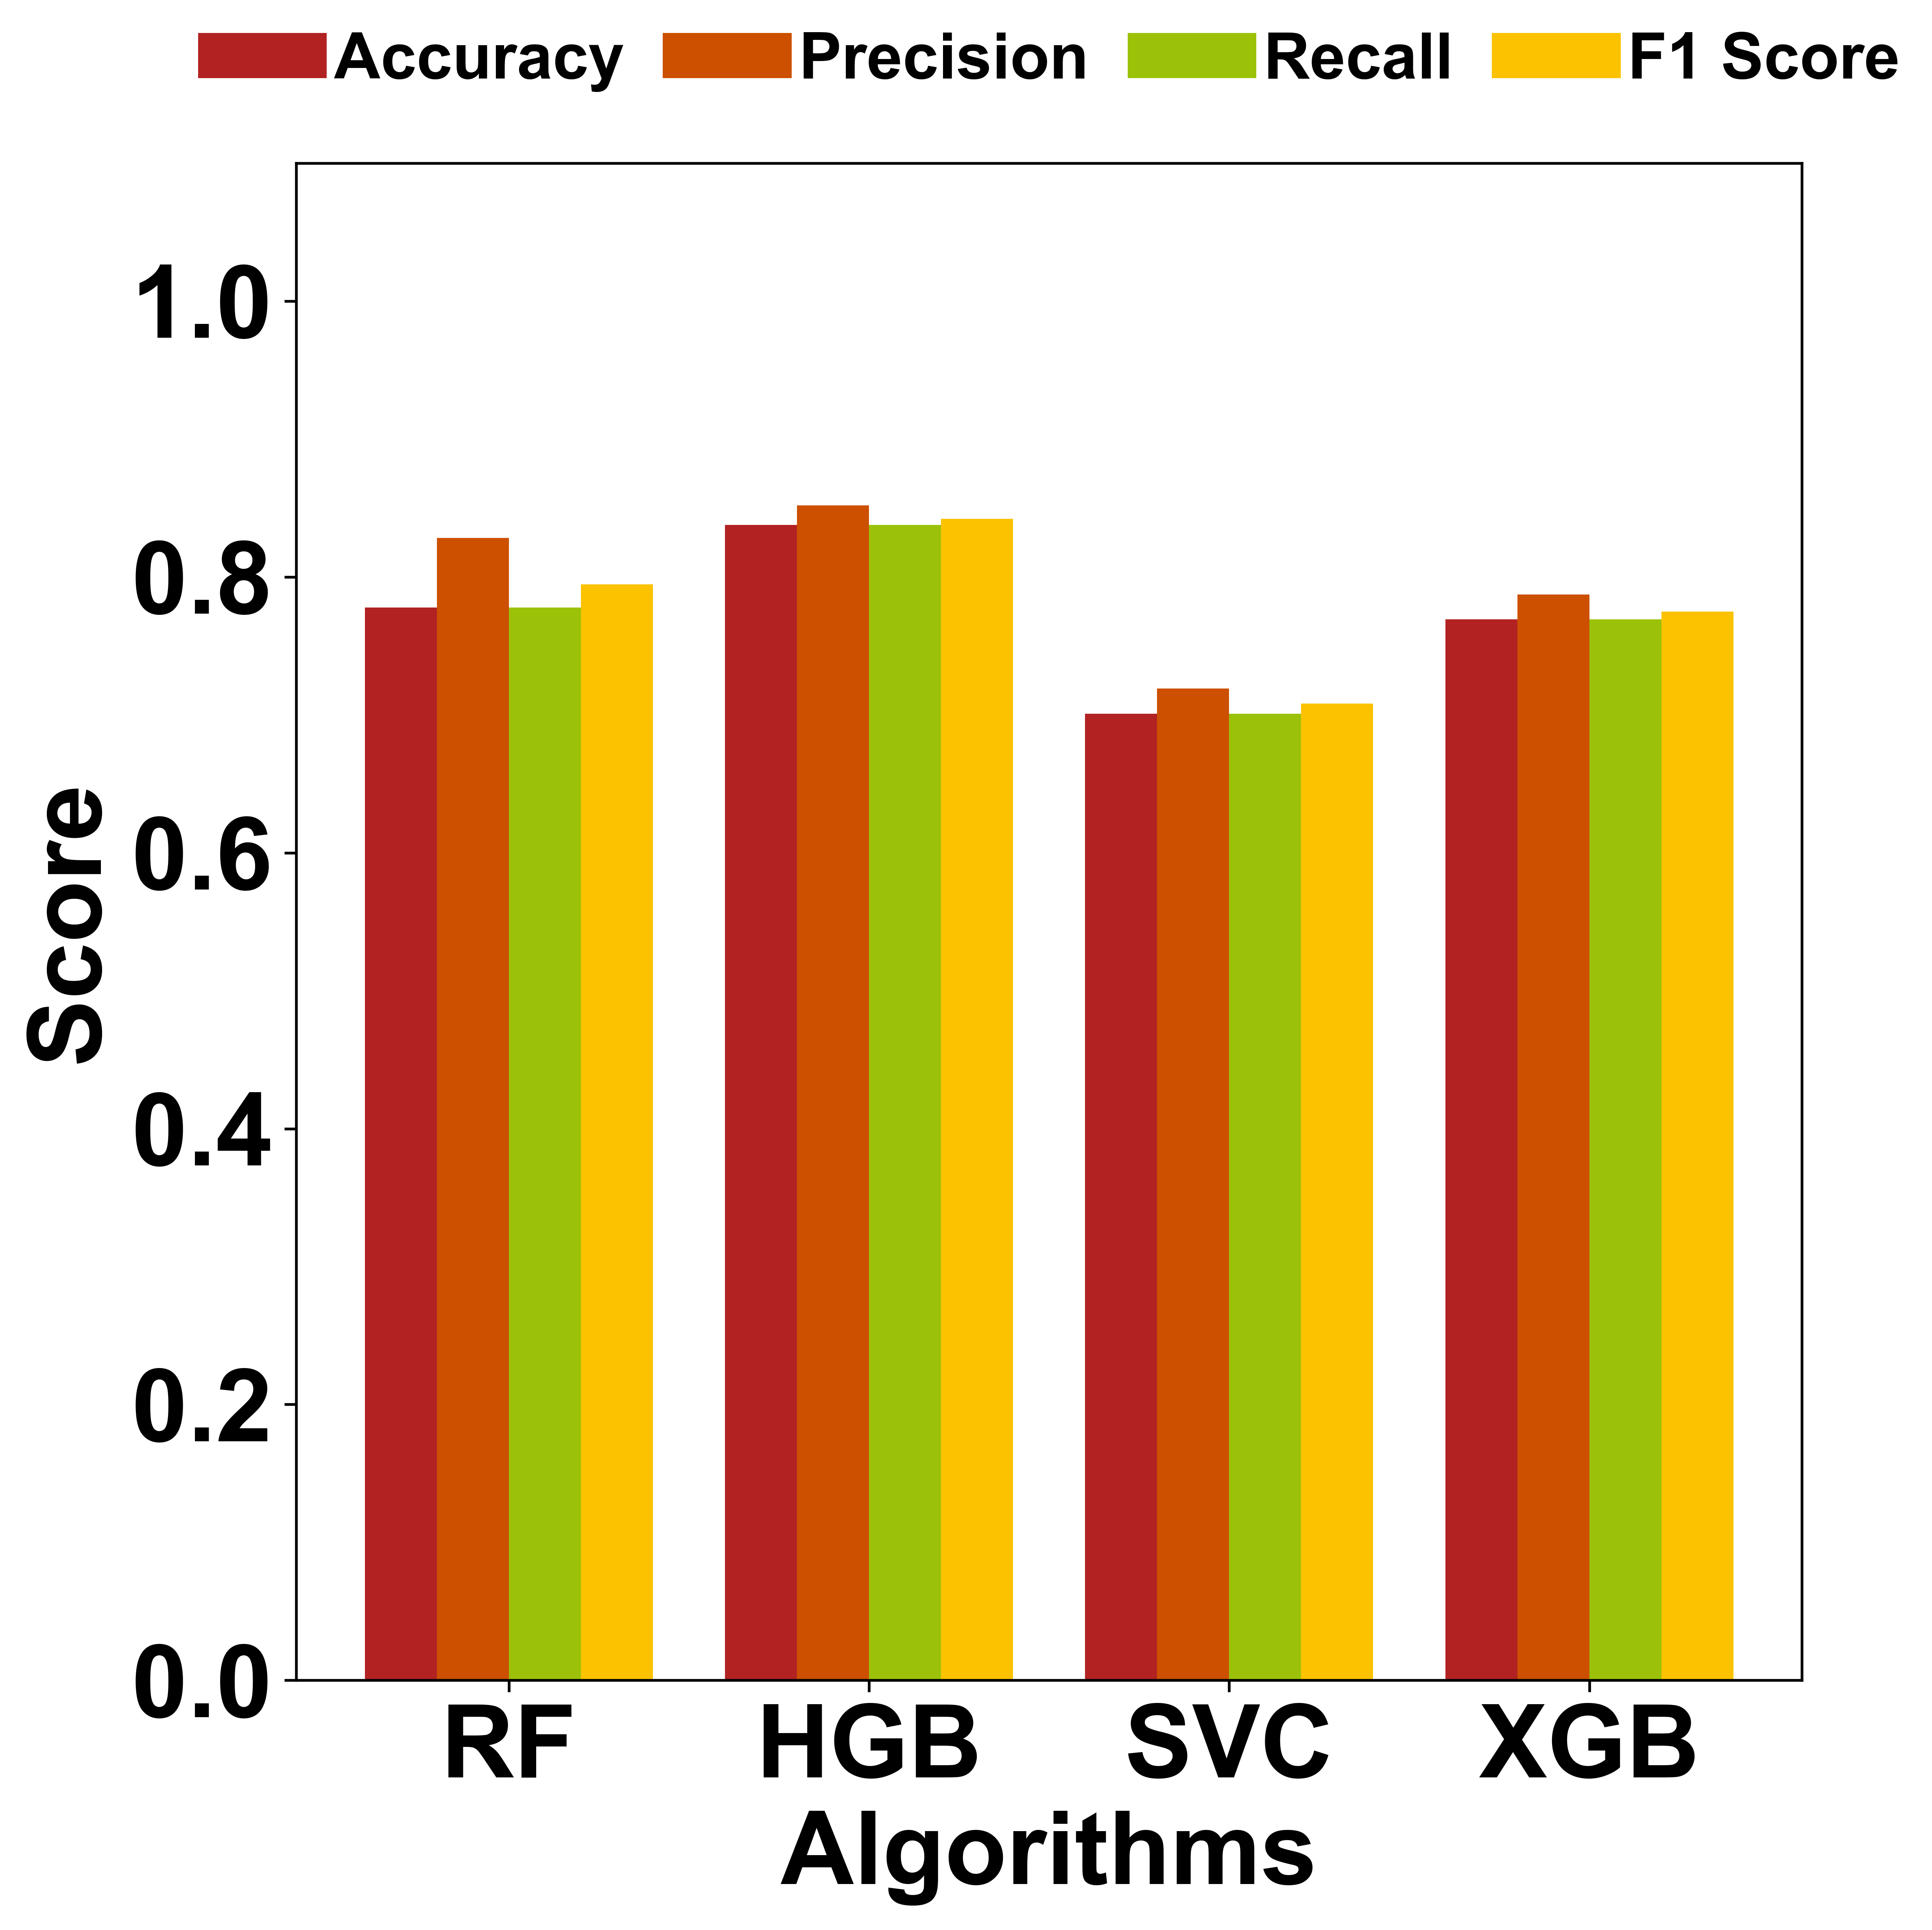

In [277]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. List your models *and* their y_preds in the same order
models = ['RF', 'HGB', 'SVC', 'XGB']
y_preds = [y_pred, y_pred2, y_pred3, y_pred4]  # make sure you have these variables

# 2. Compute all four metrics for each model
accuracies = [accuracy_score(y_hat, y_test) for y_hat in y_preds]
precisions = [precision_score(y_hat, y_test, average='weighted') for y_hat in y_preds]
recalls    = [recall_score   (y_hat, y_test, average='weighted') for y_hat in y_preds]
f1s        = [f1_score       (y_hat, y_test, average='weighted') for y_hat in y_preds]

# 3. Plot setup
x = np.arange(len(models))
width = 0.2  # width of each bar

plt.figure(figsize=(8, 8))
plt.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='firebrick')
plt.bar(x - 0.5*width, precisions, width, label='Precision', color='#cc5000')
plt.bar(x + 0.5*width, recalls,    width, label='Recall',    color='#9bc209')
plt.bar(x + 1.5*width, f1s,        width, label='F1 Score',  color='#fcc200')

# 4. Labels & ticks
plt.xticks(x, models, fontfamily='Arial', fontsize=30, fontweight='bold')
plt.yticks(fontfamily='Arial', fontsize=30, fontweight='bold')
plt.xlabel('Algorithms', fontfamily='Arial', fontsize=30, fontweight='bold')
plt.ylabel('Score',      fontfamily='Arial', fontsize=30, fontweight='bold')
plt.ylim(0, 1.1)

# 5. Legend on top, horizontal, with extra columnspacing to spread them out
plt.legend(
    ncol=4,
    handletextpad=0.11,
    labelspacing=0.08,
    columnspacing=0.6,      # ↑ increase this to push legends apart
    borderpad=0.12,
    borderaxespad=0.20,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    frameon=False,
    framealpha=0.7,
    prop={'family': 'Arial', 'weight':'bold', 'size':19}
)

plt.grid(False)
plt.tight_layout()
plt.savefig('combined_metrics_model2.png', dpi=600, format='png')
plt.show()

In [278]:
c=metrics.confusion_matrix(y_pred,y_test)
c_2=metrics.confusion_matrix(y_pred2,y_test)
c_3=metrics.confusion_matrix(y_pred3,y_test)
c_4=metrics.confusion_matrix(y_pred4,y_test)

In [279]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c, display_labels = [0, 1, 2])
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_2, display_labels = [0, 1, 2])
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_3, display_labels = [0, 1, 2])
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_4, display_labels = [0, 1, 2])

<Figure size 4800x4800 with 0 Axes>

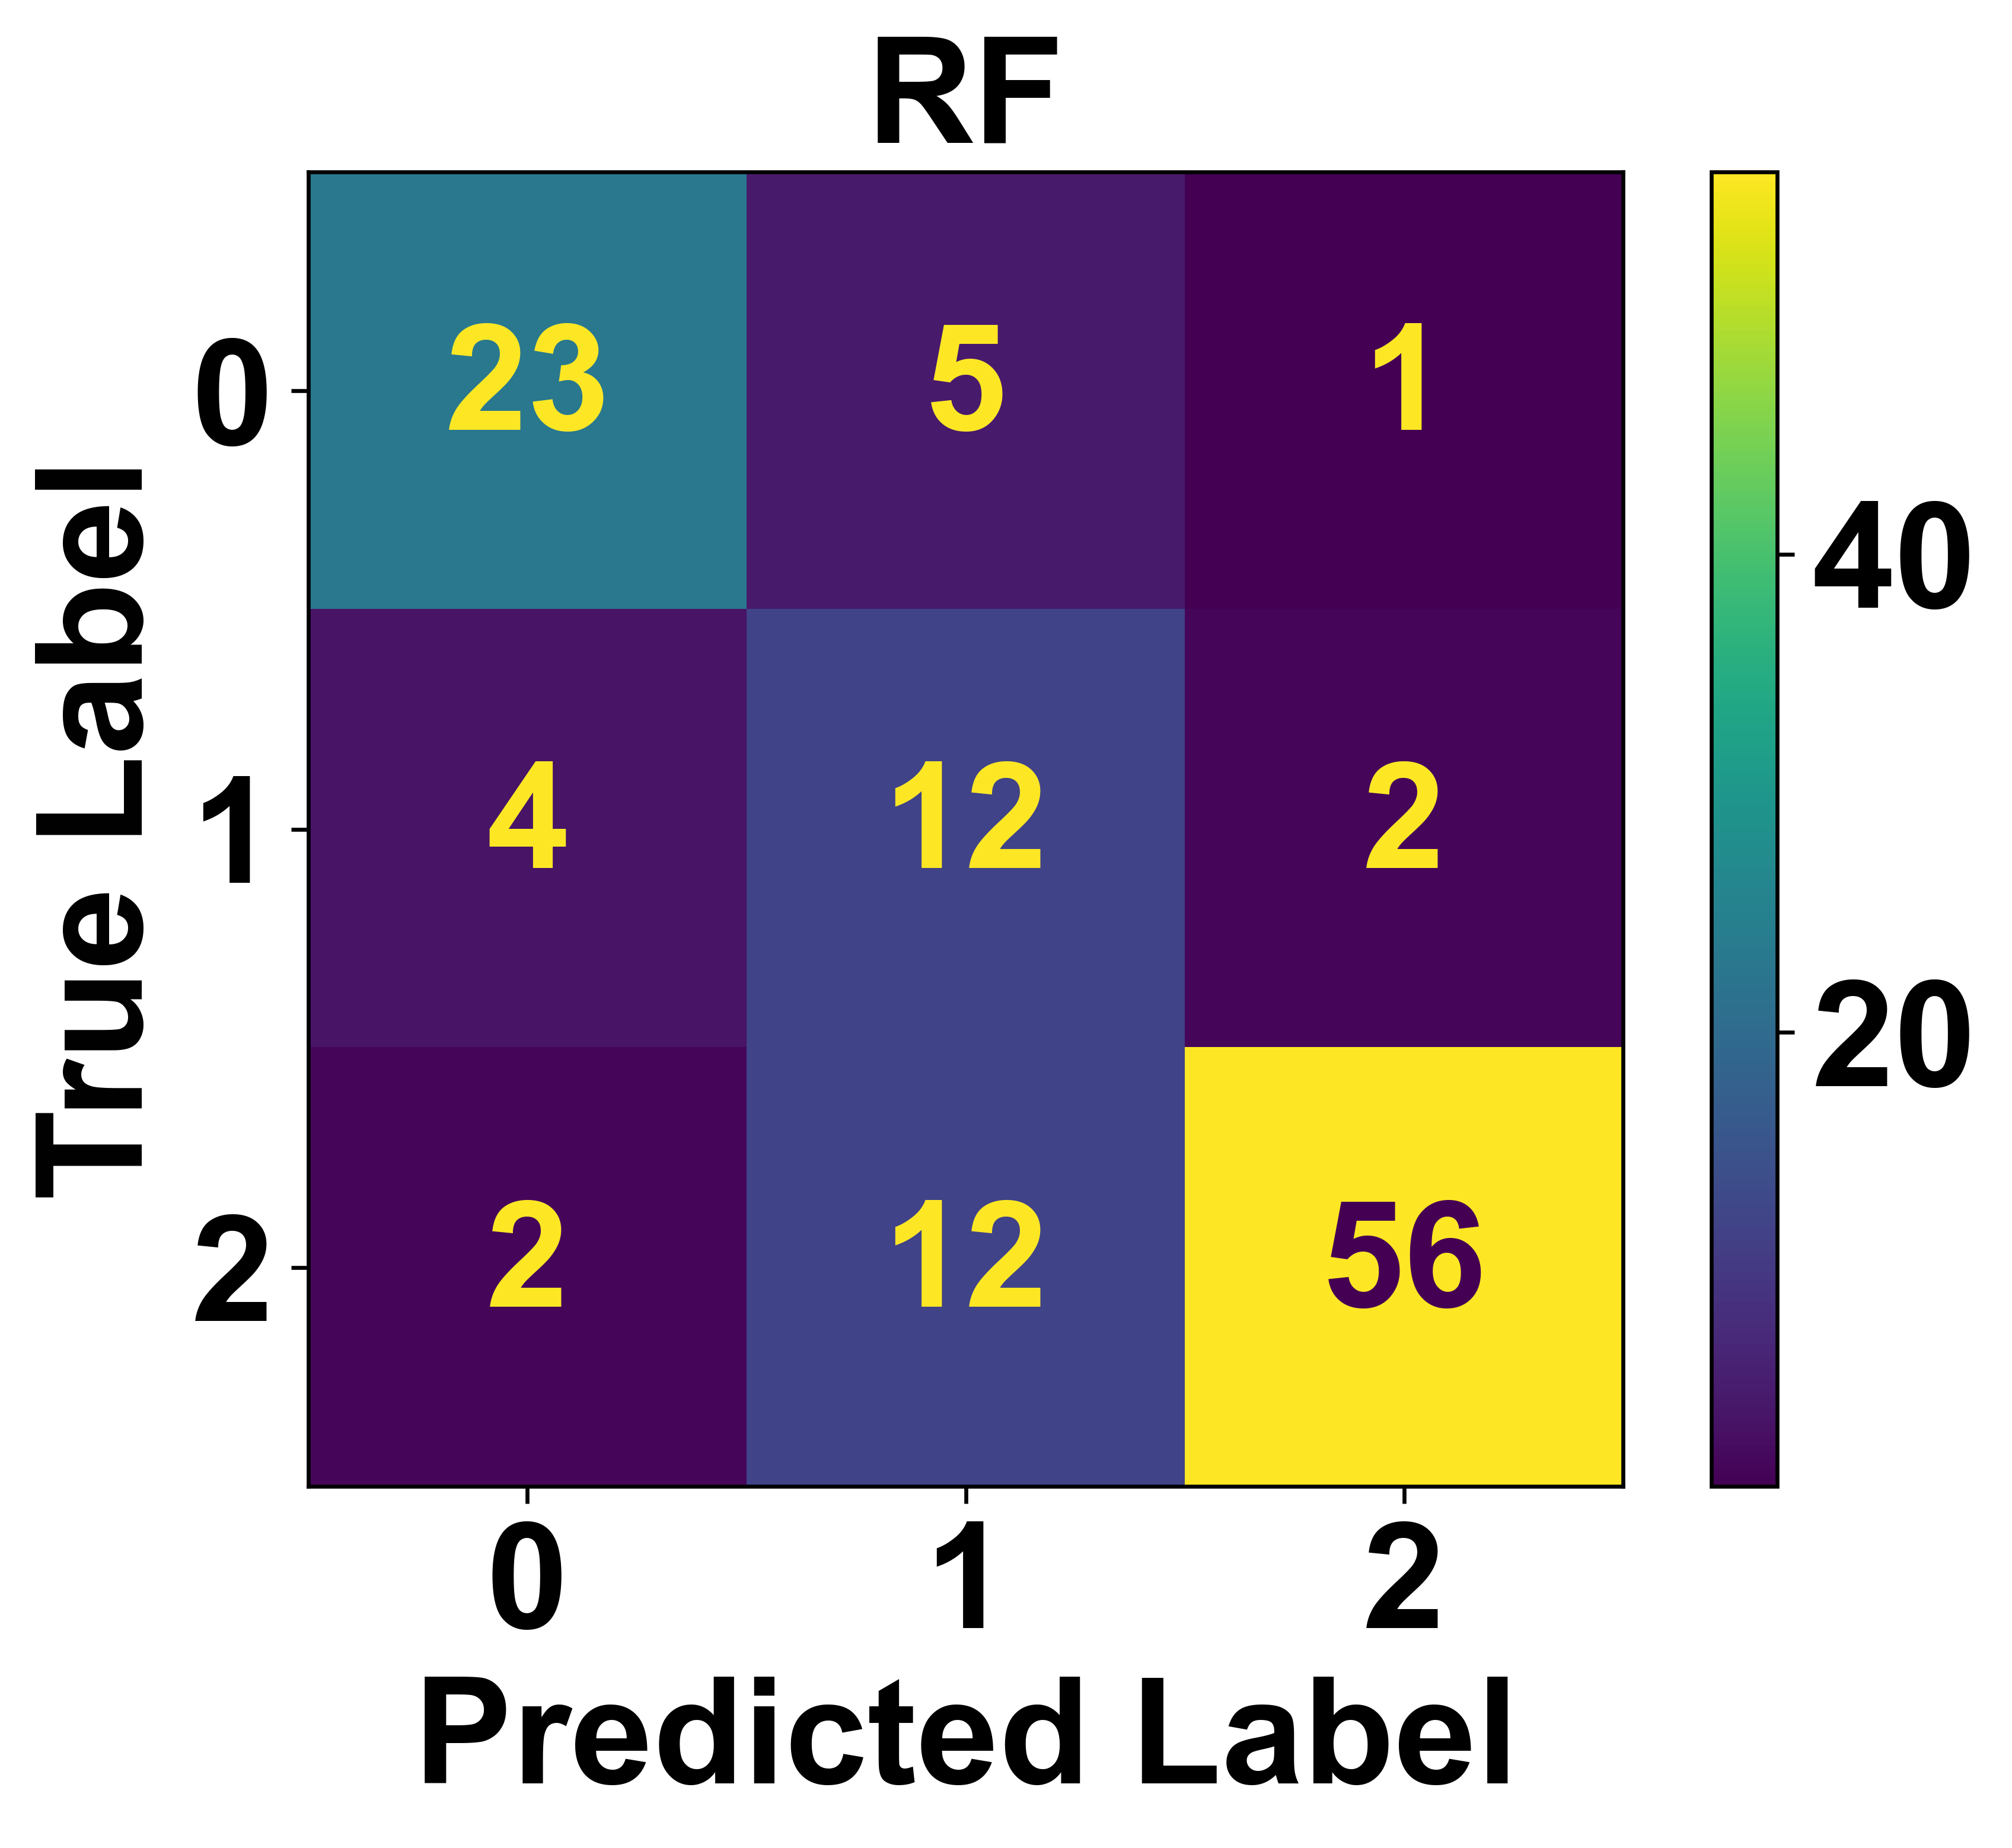

In [280]:
# Assuming `c` is already defined
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c, display_labels = [0, 1, 2])


plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
cm_display.plot(cmap='viridis', ax=ax, values_format='d', colorbar=True)

# Apply Arial font
plt.xlabel('Predicted Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.ylabel('True Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.title('RF', fontname='Arial', fontsize=30, fontweight='bold')

# Modify tick labels
plt.xticks(fontname='Arial', fontsize=30, fontweight='bold')
plt.yticks(fontname='Arial', fontsize=30, fontweight='bold')



# Modify color bar
cbar = ax.images[0].colorbar
cbar.ax.yaxis.set_tick_params(labelsize=30)
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Arial")
    label.set_fontsize(30)
    label.set_fontweight('bold')



# Modify inside text (confusion matrix values)
for text in ax.texts:
    text.set_fontname("Arial")
    text.set_fontsize(30)
    text.set_fontweight('bold')

# Add black grid lines to simulate black cell borders
num_classes = c.shape[0]
for i in range(1, num_classes):
    ax.axhline(i - 0.5, color='black', linewidth=0.0)
    ax.axvline(i - 0.5, color='black', linewidth=0.0)

plt.grid(False)
plt.savefig('rfcm_model2.png', dpi=600, format='png')
plt.show()

<Figure size 4800x4800 with 0 Axes>

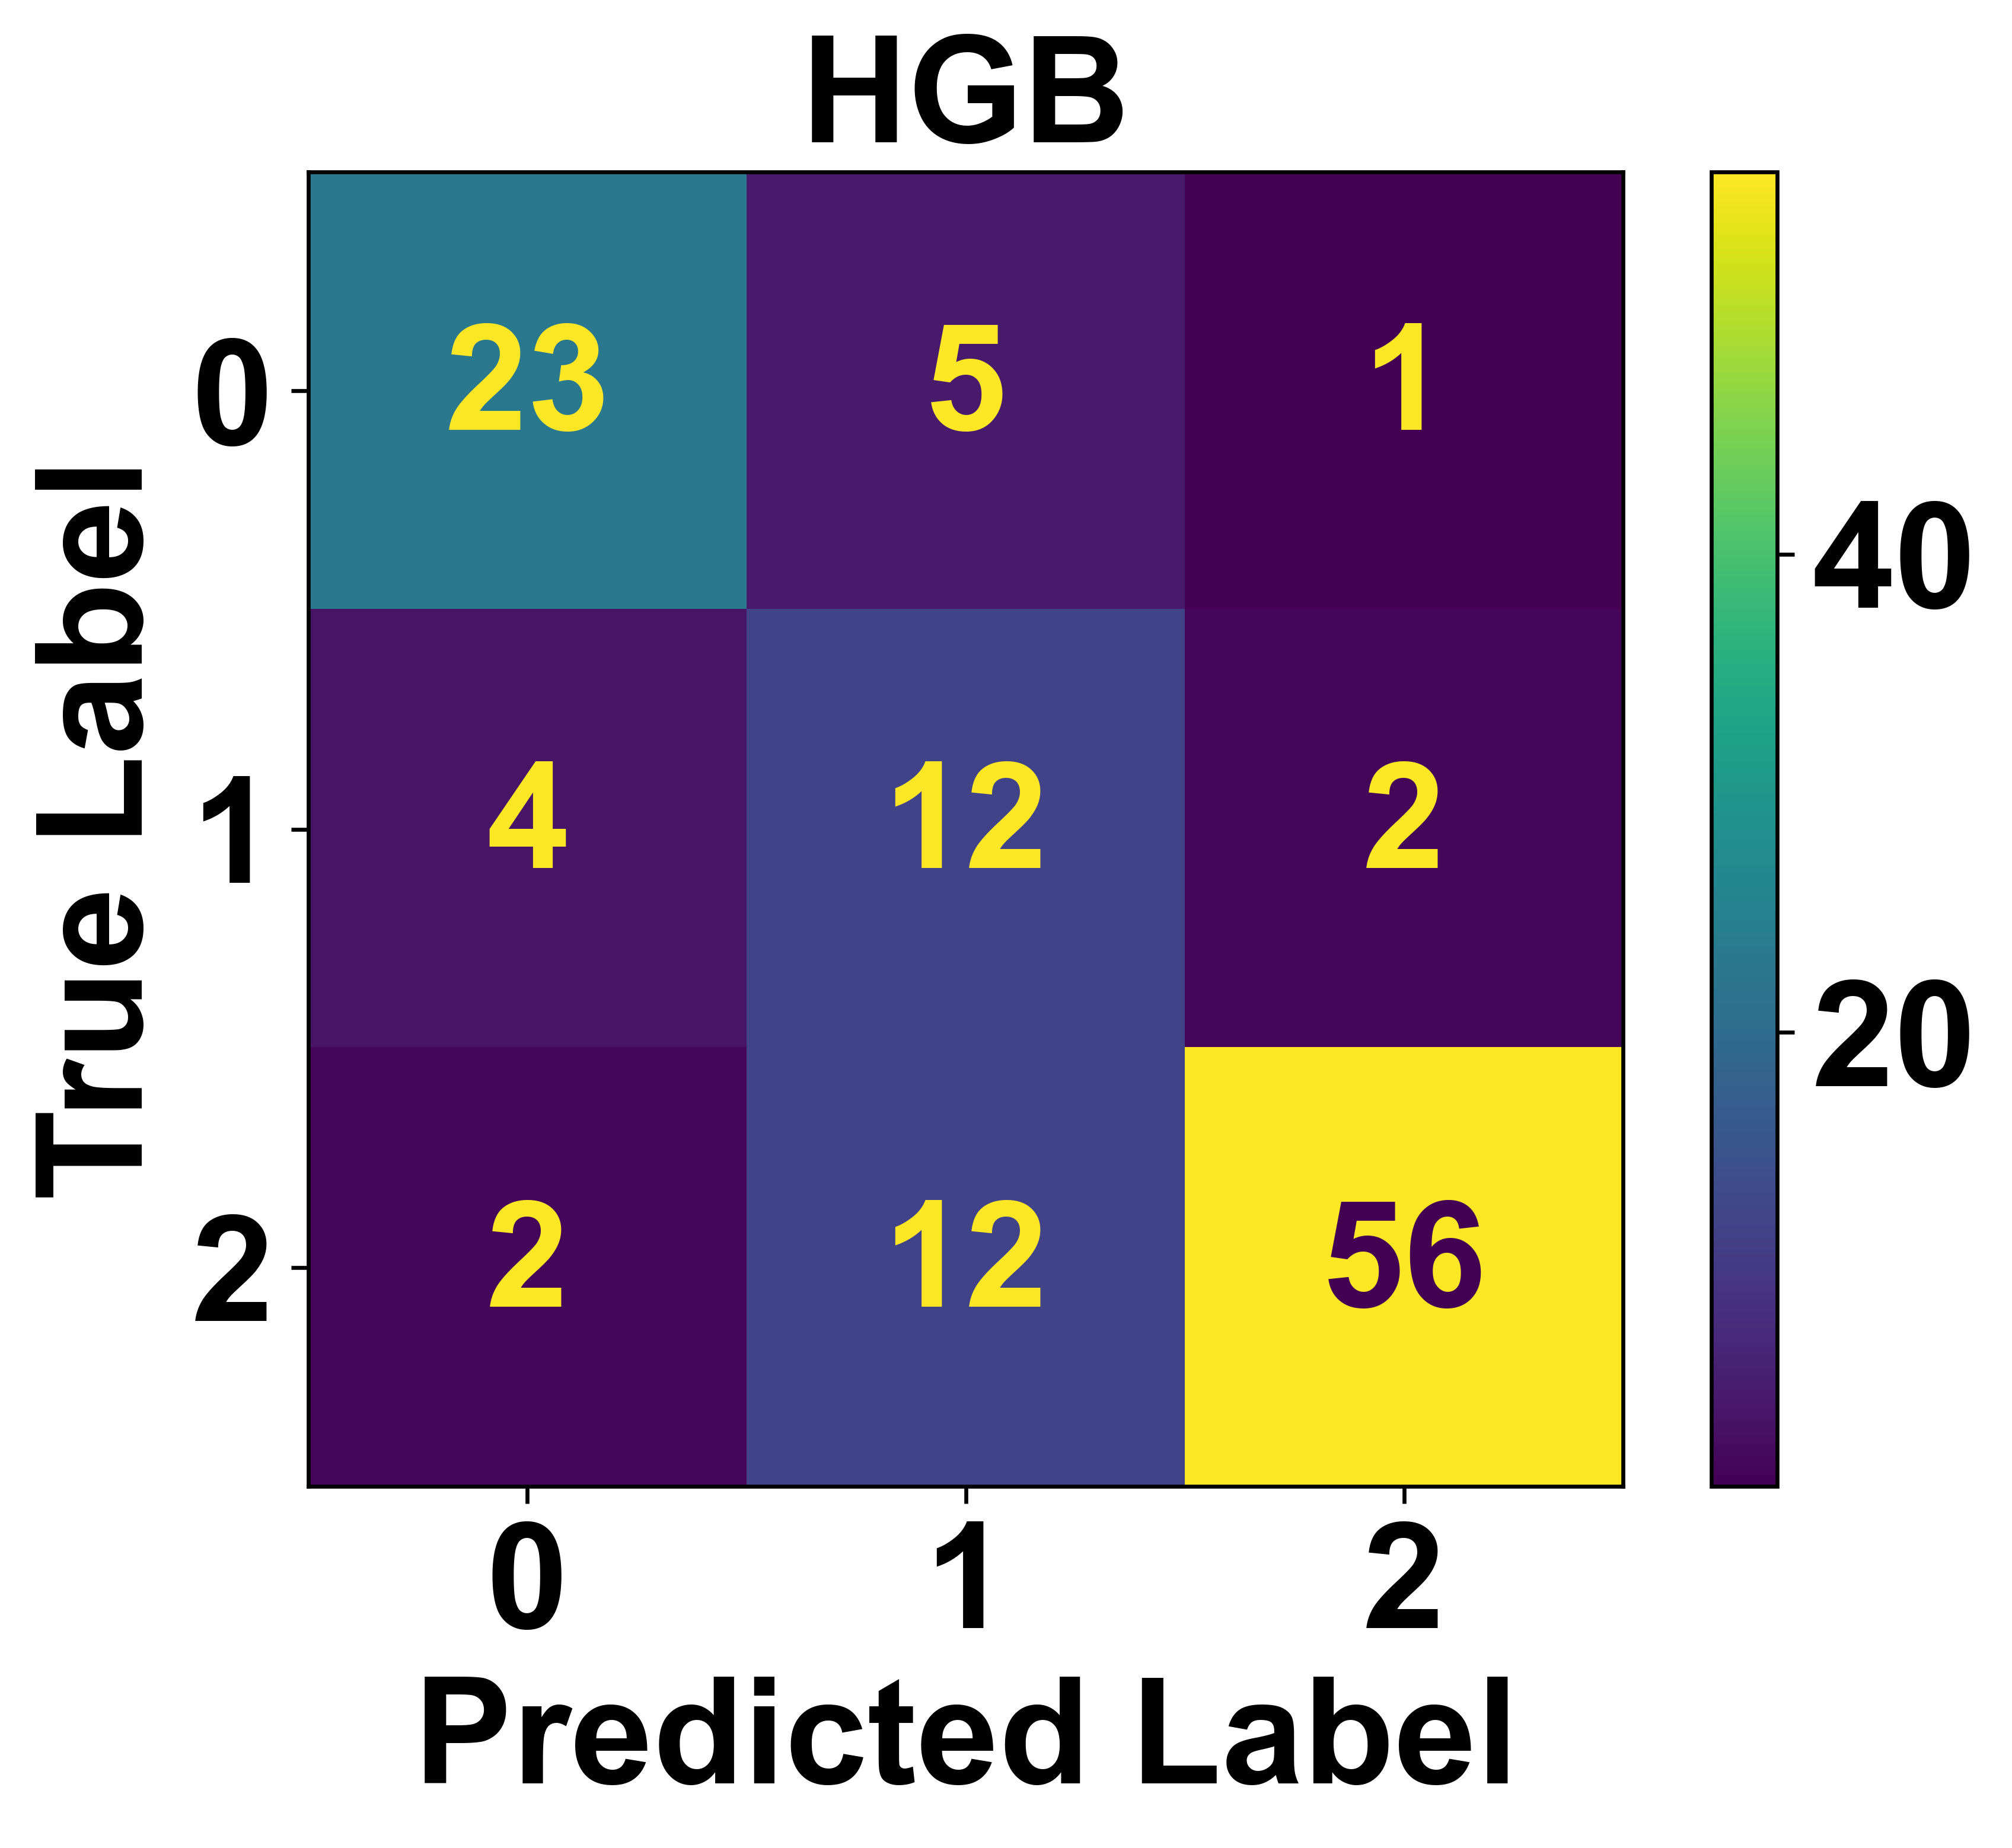

In [281]:
# Assuming `c1` is already defined
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_2, display_labels = [0, 1, 2])

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
cm_display.plot(cmap='viridis', ax=ax, values_format='d', colorbar=True)

# Apply Arial font
plt.xlabel('Predicted Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.ylabel('True Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.title('HGB', fontname='Arial', fontsize=30, fontweight='bold')

# Modify tick labels
plt.xticks(fontname='Arial', fontsize=30, fontweight='bold')
plt.yticks(fontname='Arial', fontsize=30, fontweight='bold')

# Modify color bar
cbar = ax.images[0].colorbar
cbar.ax.yaxis.set_tick_params(labelsize=30)
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Arial")
    label.set_fontsize(30)
    label.set_fontweight('bold')

# Modify inside text (confusion matrix values)
for text in ax.texts:
    text.set_fontname("Arial")
    text.set_fontsize(30)
    text.set_fontweight('bold')
# Add black grid lines to simulate black cell borders
num_classes = c.shape[0]
for i in range(1, num_classes):
    ax.axhline(i - 0.5, color='black', linewidth=0.0)
    ax.axvline(i - 0.5, color='black', linewidth=0.0)


plt.grid(False)
plt.savefig('hgbcm_model2.png', dpi=600, format='png')
plt.show()

<Figure size 4800x4800 with 0 Axes>

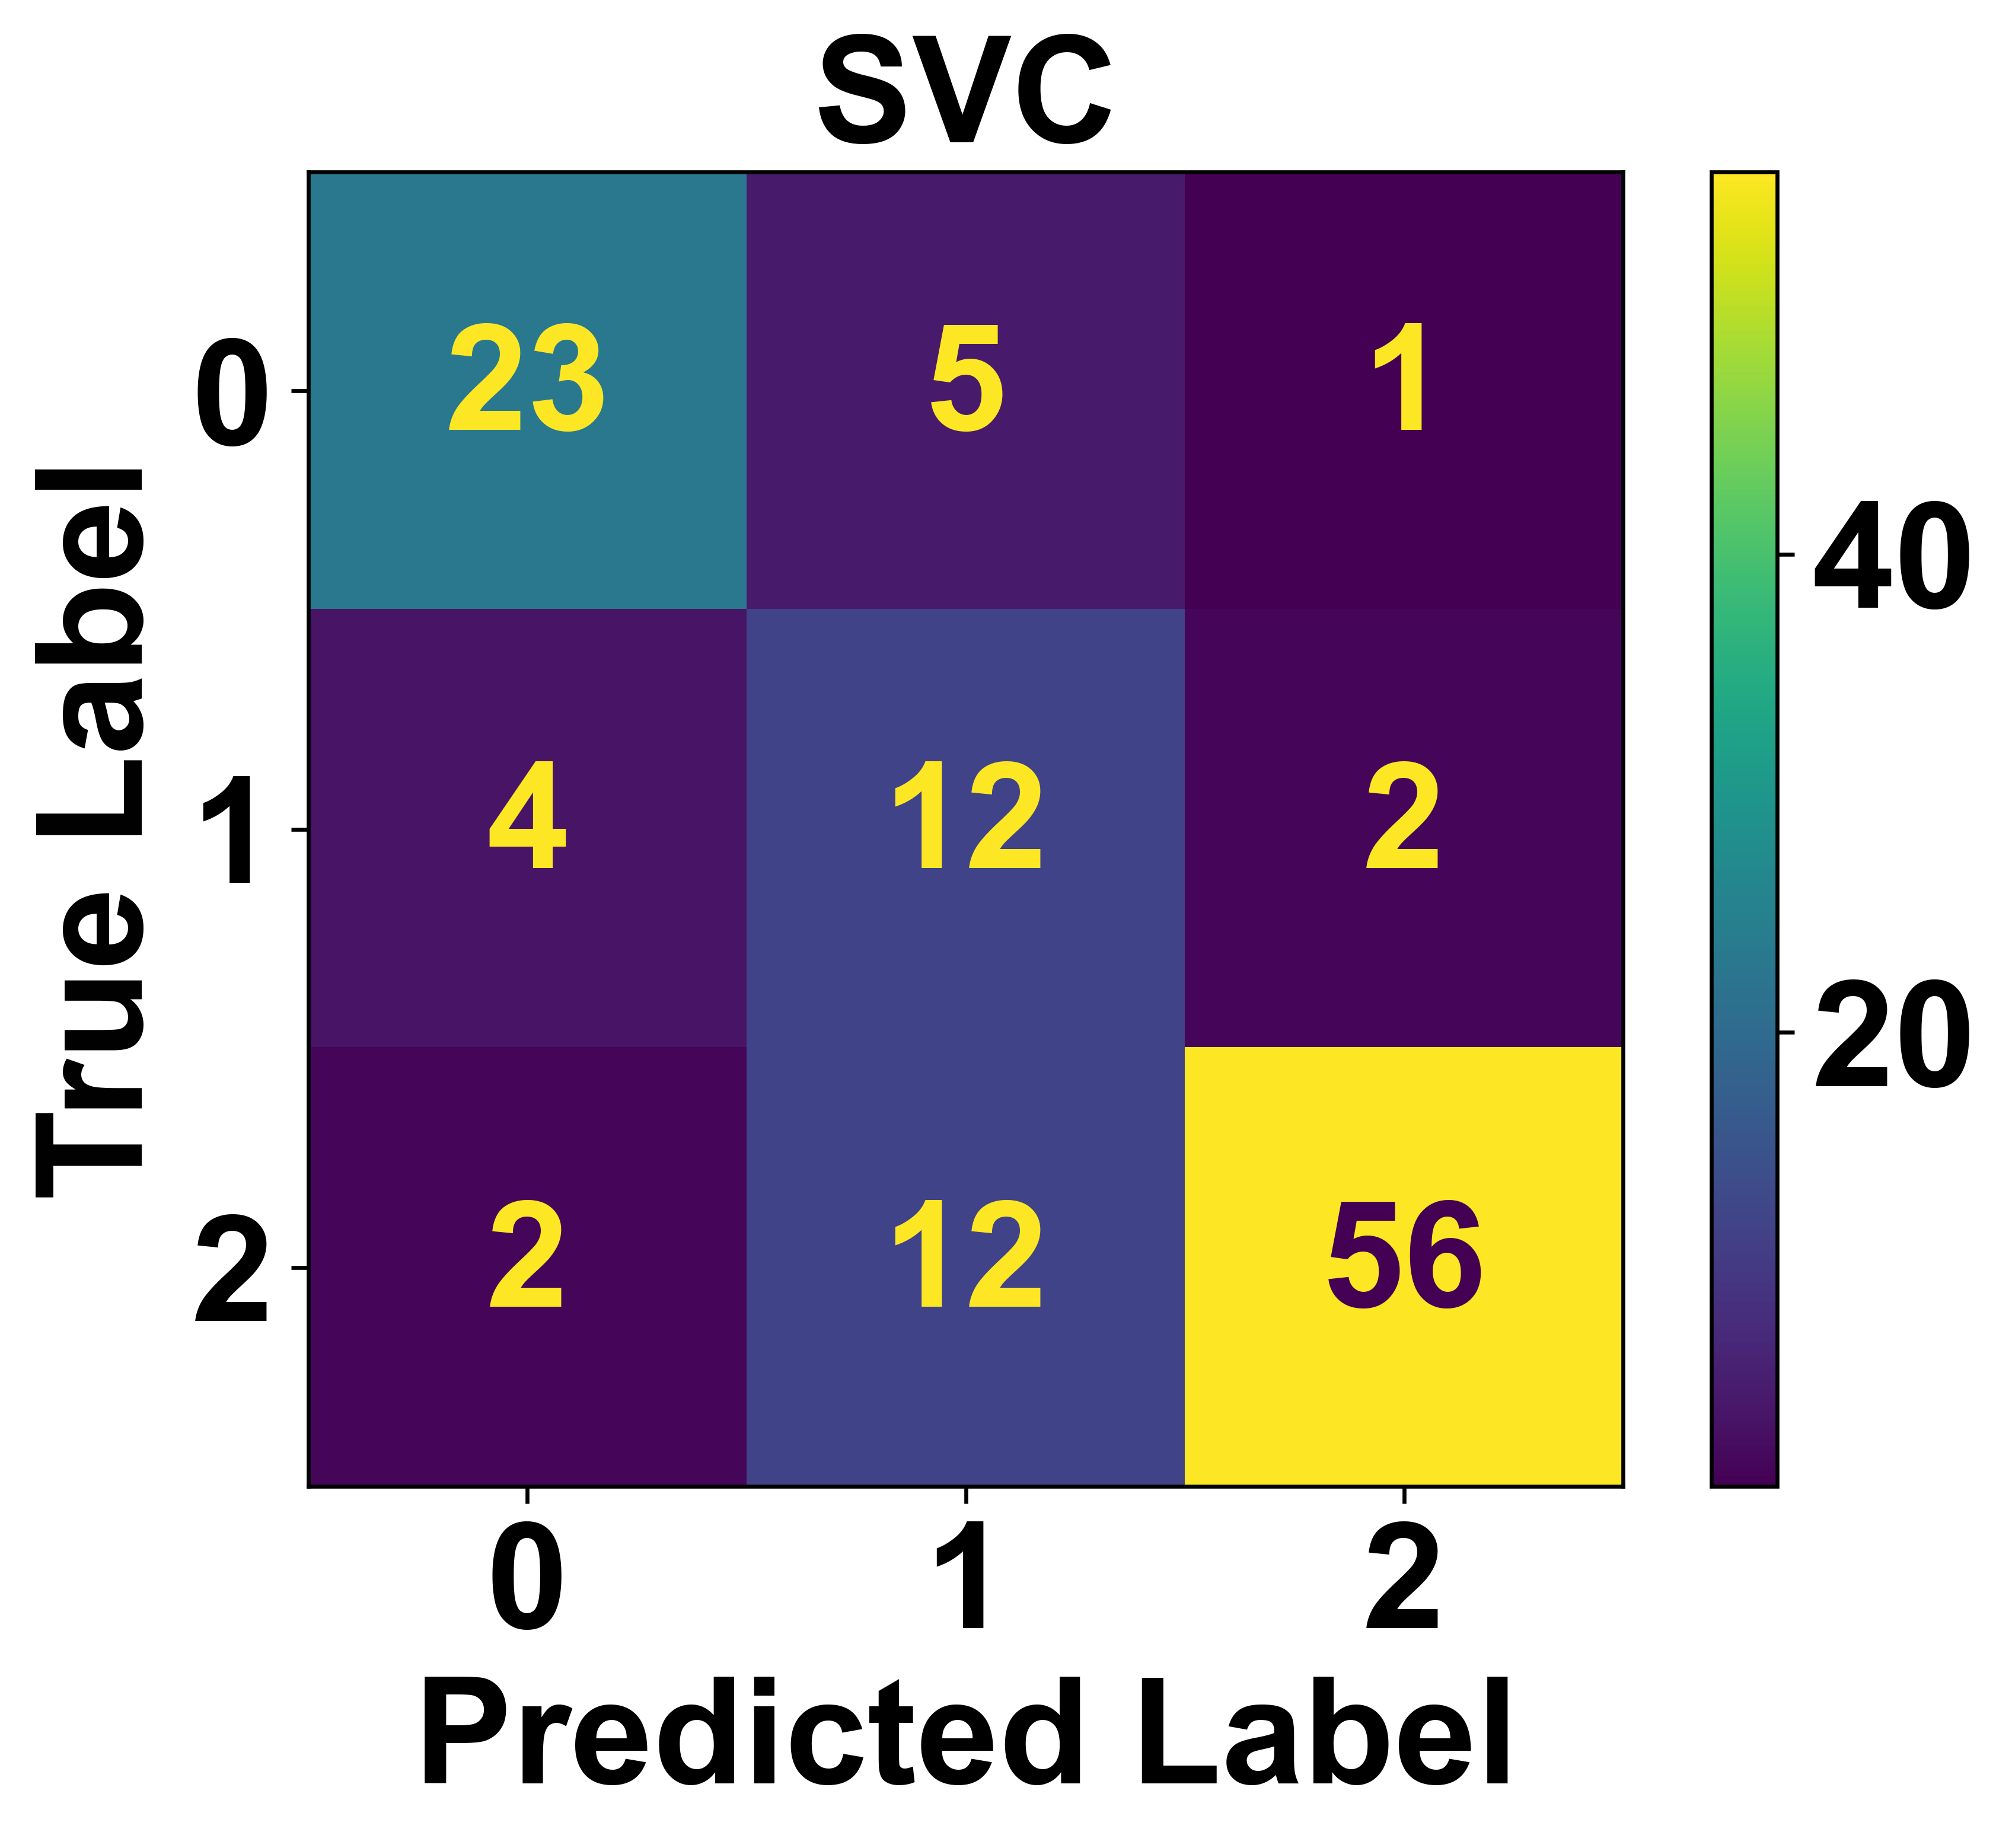

In [282]:
# Assuming `c3` is already defined
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_3, display_labels = [0, 1, 2])

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
cm_display.plot(cmap='viridis', ax=ax, values_format='d', colorbar=True)

# Apply Arial font
plt.xlabel('Predicted Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.ylabel('True Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.title('SVC', fontname='Arial', fontsize=30, fontweight='bold')

# Modify tick labels
plt.xticks(fontname='Arial', fontsize=30, fontweight='bold')
plt.yticks(fontname='Arial', fontsize=30, fontweight='bold')


# Modify color bar
cbar = ax.images[0].colorbar
cbar.ax.yaxis.set_tick_params(labelsize=30)
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Arial")
    label.set_fontsize(30)
    label.set_fontweight('bold')




# Modify inside text (confusion matrix values)
for text in ax.texts:
    text.set_fontname("Arial")
    text.set_fontsize(30)
    text.set_fontweight('bold')

# Add black grid lines to simulate black cell borders
num_classes = c.shape[0]
for i in range(1, num_classes):
    ax.axhline(i - 0.5, color='black', linewidth=0.0)
    ax.axvline(i - 0.5, color='black', linewidth=0.0)


plt.grid(False)
plt.savefig('svccm_model2.png', dpi=600, format='png')
plt.show()

<Figure size 4800x4800 with 0 Axes>

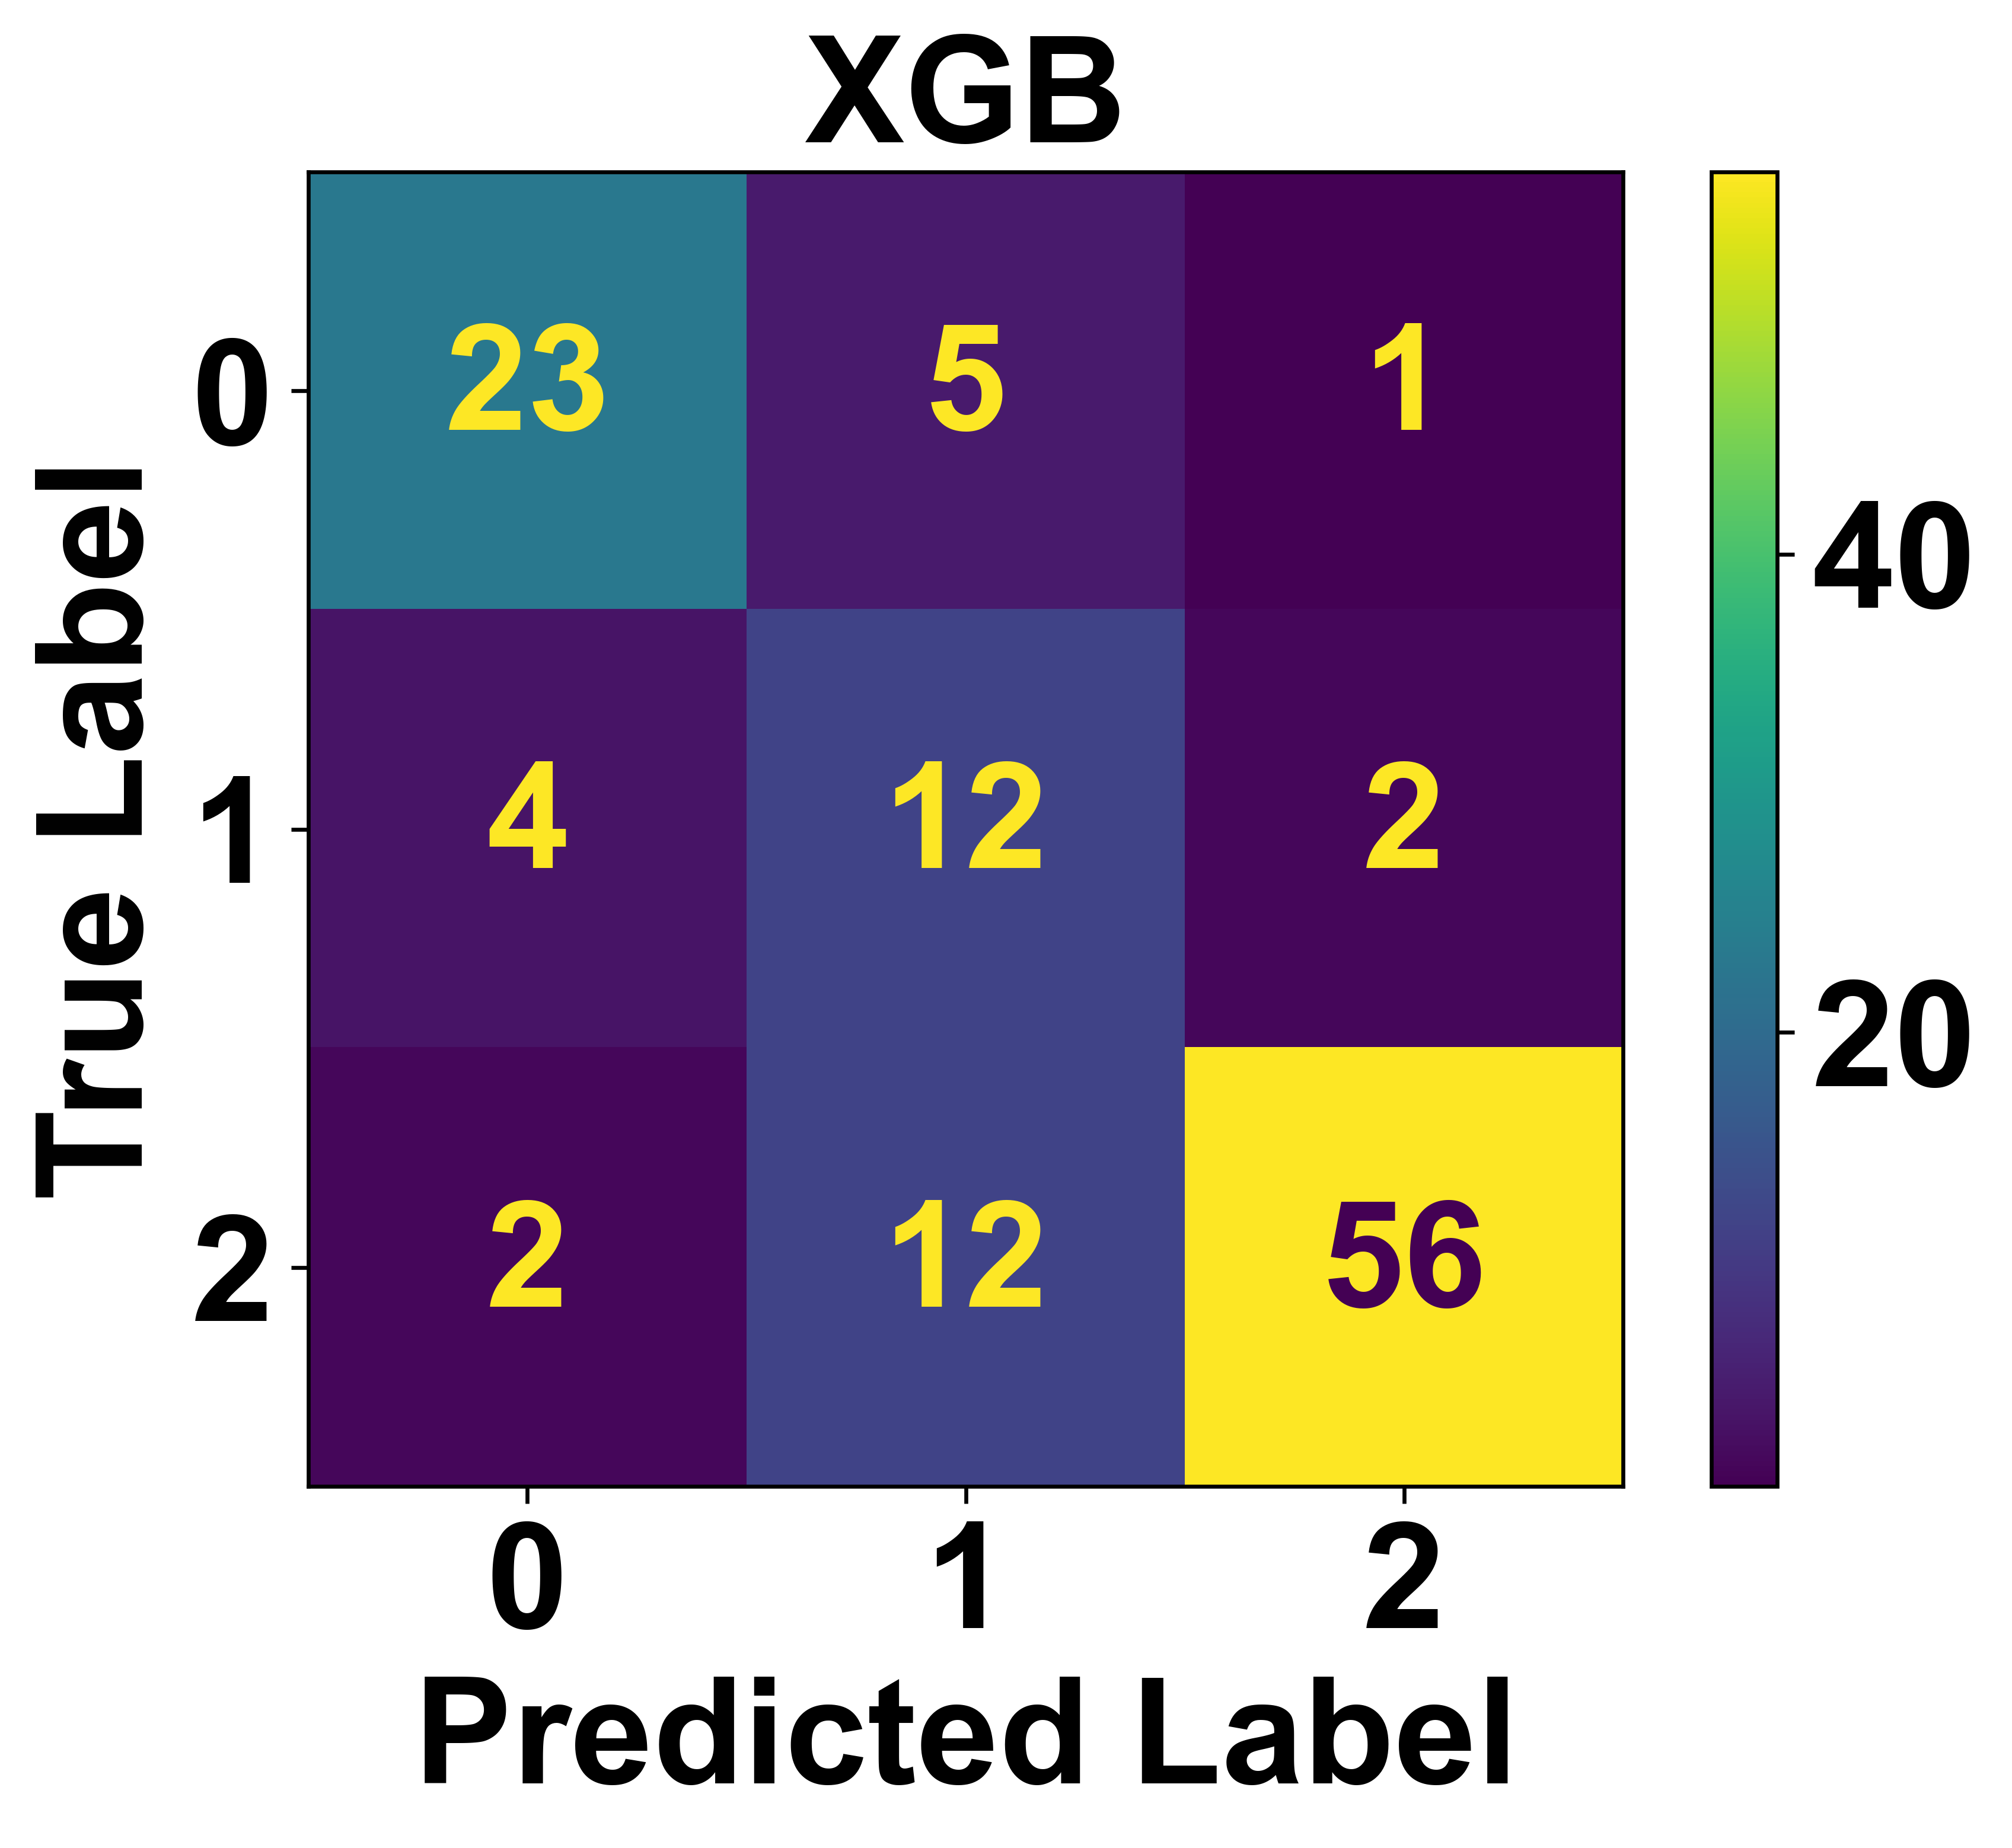

In [283]:
# Assuming `c4` is already defined
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_4, display_labels = [0, 1, 2])

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
cm_display.plot(cmap='viridis', ax=ax, values_format='d', colorbar=True)

# Apply Arial font
plt.xlabel('Predicted Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.ylabel('True Label', fontname='Arial', fontsize=30, fontweight='bold')
plt.title('XGB', fontname='Arial', fontsize=30, fontweight='bold')

# Modify tick labels
plt.xticks(fontname='Arial', fontsize=30, fontweight='bold')
plt.yticks(fontname='Arial', fontsize=30, fontweight='bold')


# Modify color bar
cbar = ax.images[0].colorbar
cbar.ax.yaxis.set_tick_params(labelsize=30)
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Arial")
    label.set_fontsize(30)
    label.set_fontweight('bold')


# Modify inside text (confusion matrix values)
for text in ax.texts:
    text.set_fontname("Arial")
    text.set_fontsize(30)
    text.set_fontweight('bold')

# Add black grid lines to simulate black cell borders
num_classes = c.shape[0]
for i in range(1, num_classes):
    ax.axhline(i - 0.5, color='black', linewidth=0.0)
    ax.axvline(i - 0.5, color='black', linewidth=0.0)


plt.grid(False)
plt.savefig('xgbcm_model2.png', dpi=600, format='png')
plt.show()

In [284]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
y_probs1 = clf1.predict_proba(x_test)[:, 1]
y_probs2 = clf2.predict_proba(x_test)[:, 1]
y_probs4 = clf4.predict_proba(x_test)[:, 1]
y_probs3 = clf3.predict_proba(x_test)[:, 1]

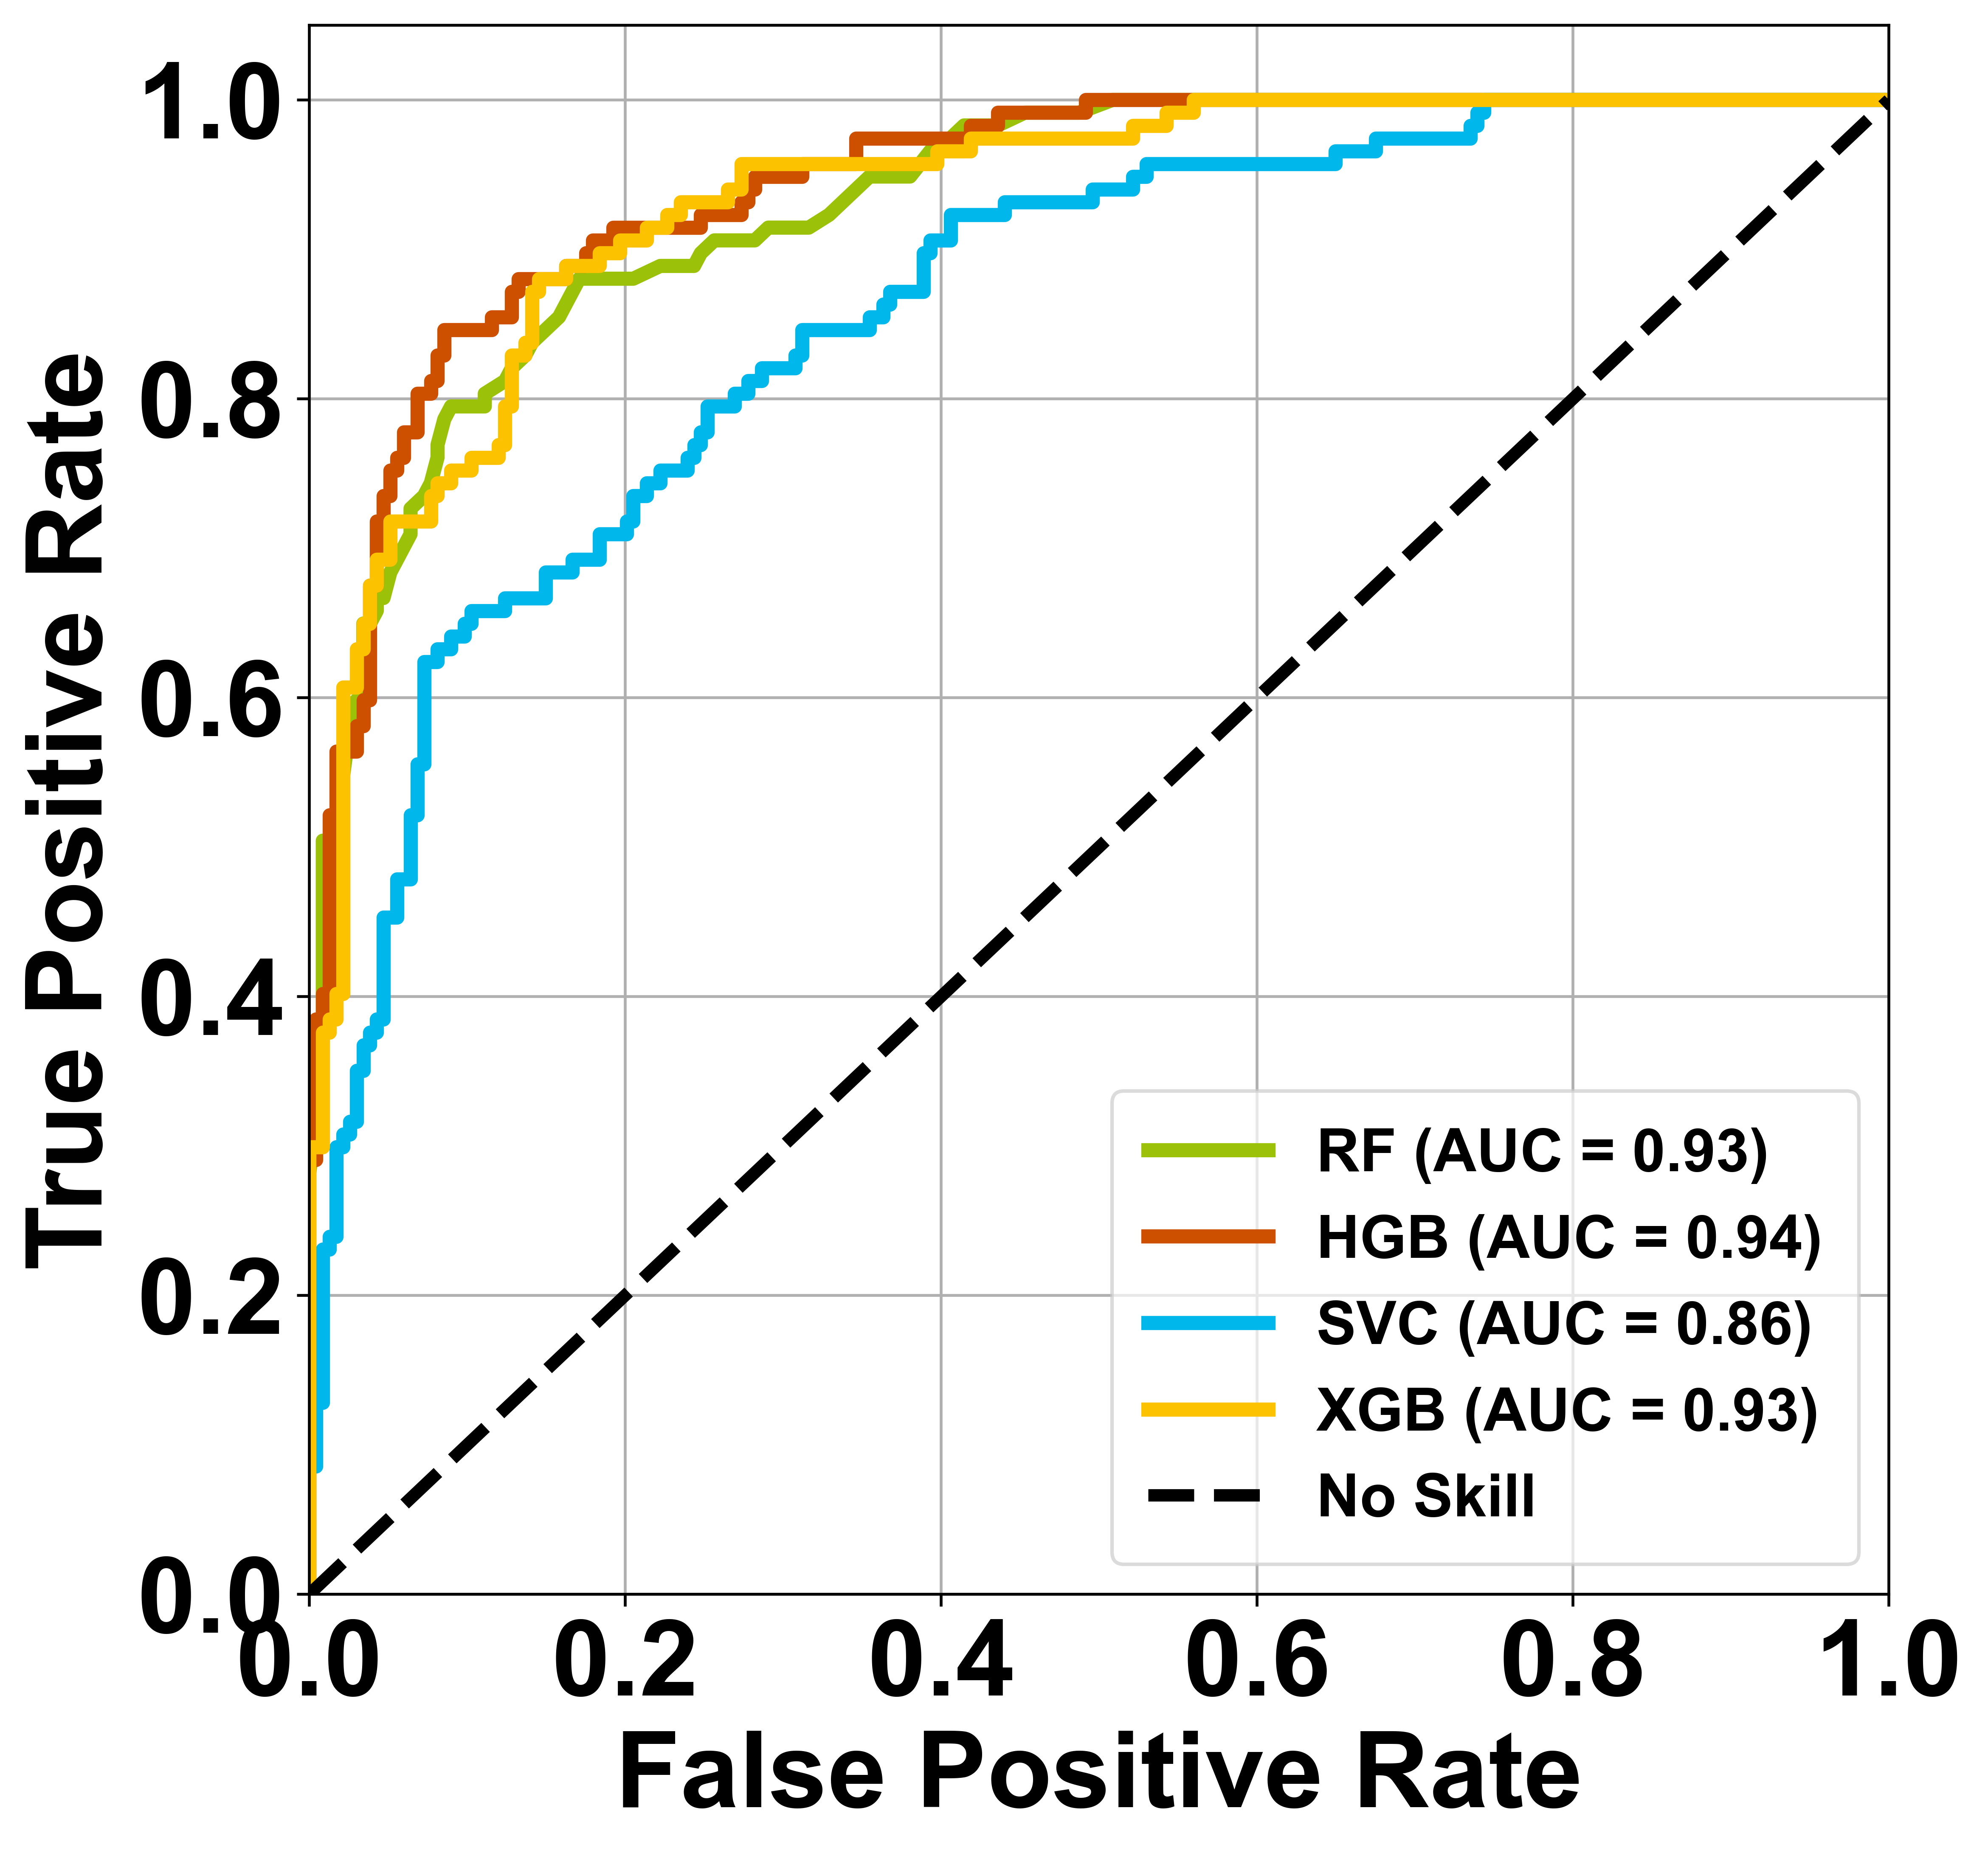

In [285]:
# Compute ROC curves using one-vs-rest strategy
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize

# Plot settings
plt.figure(figsize=(8, 8))
colors = ['#9bc209', '#cc5000', '#00b7eb', '#fcc200']
models = ['RF', 'HGB', 'SVC', 'XGB']
classes = [0, 1, 2]

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=classes)

for i, (model, color) in enumerate(zip(models, colors)):
    # Calculate ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Get probabilities for the current model
    y_proba = None
    if i == 0:
        y_proba = clf1.predict_proba(x_test)
    elif i == 1:
        y_proba = clf2.predict_proba(x_test)
    elif i == 2:
        y_proba = clf3.predict_proba(x_test)
    else:
        y_proba = clf4.predict_proba(x_test)
    
    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    
    # Plot ROC curve
    plt.plot(fpr_micro, tpr_micro, color=color, lw=4,
             label=f'{model} (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='No Skill', linewidth=3.5)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate', fontfamily='Arial', fontsize=30, fontweight='bold')
plt.ylabel('True Positive Rate', fontfamily='Arial', fontsize=30, fontweight='bold')
plt.xticks(fontfamily='Arial', fontsize=30, fontweight='bold')
plt.yticks(fontfamily='Arial', fontsize=30, fontweight='bold')
plt.legend(loc='lower right', frameon=True, fancybox=True, framealpha=0.7, borderpad=0.6, prop={'family': 'Arial', 'weight': 'bold','size':17})
plt.grid(True)
plt.savefig('aucroc_model2.png', dpi=600, format='png')
plt.show()

/home/avantika/soft_install/mamba/envs/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:12:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/avantika/soft_install/mamba/envs/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:15:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/avantika/soft_install/mamba/envs/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:15:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/avantika/soft_install/mamba/envs/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [19:15:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.up

  Model  Accuracy  Precision    Recall  F1 Score  CV (mean ± std)
0    RF  0.794872   0.797032  0.794872  0.779872  0.7178 ± 0.0883
1   HGB  0.811966   0.806670  0.811966  0.807393  0.7501 ± 0.0506
2   SVC  0.777778   0.772551  0.777778  0.772432  0.7262 ± 0.0565
3   XGB  0.777778   0.775790  0.777778  0.771458  0.7468 ± 0.0768


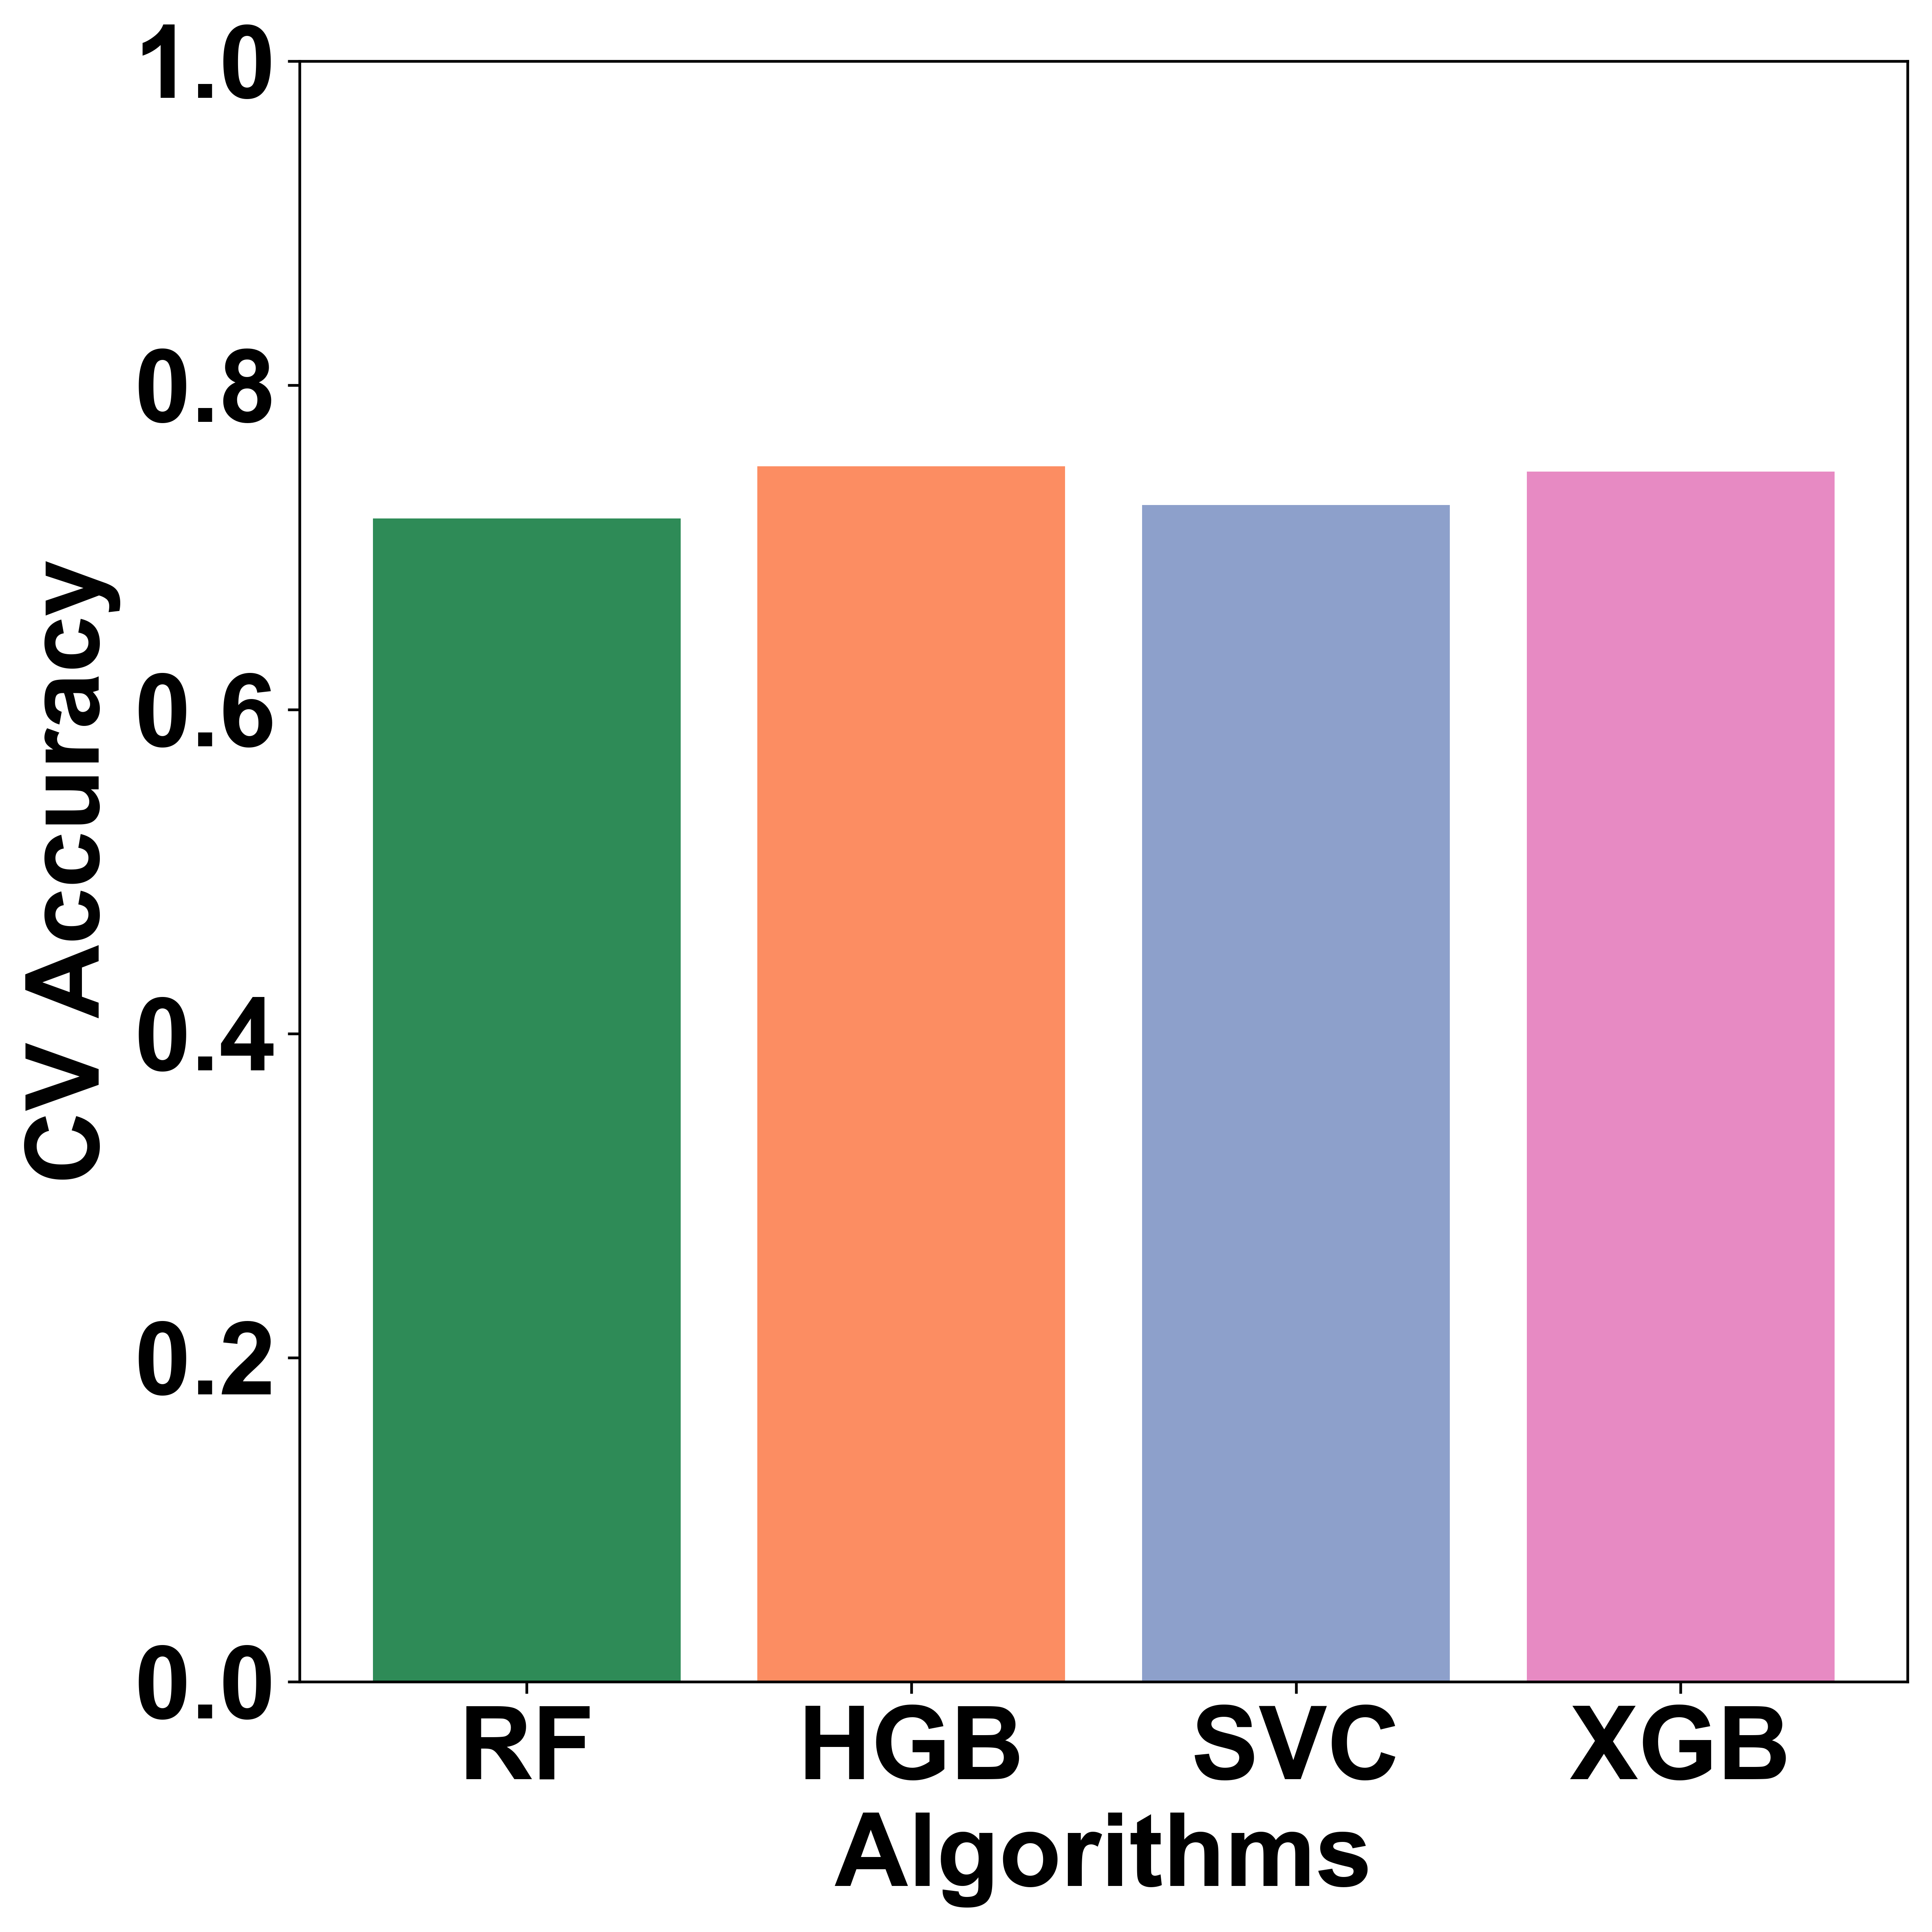

In [286]:
# %% [1] Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# %% [2] Load & prepare data
df = pd.read_csv('Compiled_data.csv').iloc[:, 1:]     # drop index column
df.drop('IC50', axis=1, inplace=True)                 # drop IC50 if unused
X = df.drop('Class', axis=1).values                   # feature matrix
y = df['Class'].values                                # label vector

# %% [3] Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# %% [4] Define raw classifiers
raw_models = {
    'RF' : RandomForestClassifier(
                n_jobs=-1, n_estimators=150, max_features=50,
                random_state=42
            ),
    'HGB': HistGradientBoostingClassifier(
                max_iter=262, learning_rate=0.12, min_samples_leaf=40,
                l2_regularization=8, max_bins=255, random_state=42
            ),
    'SVC': SVC(
                C=400, kernel='rbf', gamma='scale',
                probability=True, random_state=42
            ),
    'XGB': XGBClassifier(
                use_label_encoder=False, eval_metric='mlogloss',
                random_state=42
            )
}

# %% [5] Wrap each in a Pipeline with scaling
models = {
    name: Pipeline([
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])
    for name, clf in raw_models.items()
}

# %% [6] Fit on train/test split and collect test‐set metrics
results = []
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results.append({
        'Model':     name,
        'Accuracy':  accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall':    recall_score(y_test, y_pred, average='weighted'),
        'F1 Score':  f1_score(y_test, y_pred, average='weighted')
    })

# %% [7] 10‑fold Stratified CV (accuracy only)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_means = []
cv_stds  = []
for name, pipe in models.items():
    scores = cross_val_score(
        pipe, X, y,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())

# %% [8] Merge CV stats & format "mean ± std"
for i, row in enumerate(results):
    mean, std = cv_means[i], cv_stds[i]
    row['CV (mean ± std)'] = f"{mean:.4f} ± {std:.4f}"

# %% [9] Create DataFrame & save to CSV
df_perf = pd.DataFrame(results)
df_perf.to_csv('model_performance_cv.csv', index=False)
print(df_perf)

# %% [10] Plot CV accuracy ± std with custom styling
colours = ['#2E8B57', '#fc8d62', '#8da0cb', '#e78ac3']

plt.figure(figsize=(8,8))
plt.bar(
    df_perf['Model'],
    [float(v.split(' ± ')[0]) for v in df_perf['CV (mean ± std)']],
    yerr=[float(v.split(' ± ')[1]) for v in df_perf['CV (mean ± std)']],
    capsize=0,
    color=colours,
    edgecolor='none',
    error_kw={'ecolor':'none'}
)

plt.xticks(
    rotation=0,
    fontfamily='Arial',
    fontsize=30,
    fontweight='bold'
)
plt.yticks(
    fontfamily='Arial',
    fontsize=30,
    fontweight='bold'
)

plt.ylim(0,1)
plt.xlabel('Algorithms', fontsize=30, fontweight='bold', fontfamily='Arial')
plt.ylabel('CV Accuracy', fontsize=30, fontweight='bold', fontfamily='Arial')

plt.grid(False)
plt.tight_layout()
plt.savefig('cv_accuracy_plot_model2.png', dpi=600)
plt.show()

In [287]:
data_for_validation=pd.read_csv('data_for_validation.csv')

In [288]:
data_for_validation=data_for_validation.iloc[:,1:]
data_for_validation

nAcid    ALogP    ALogp2       AMR       apol  naAromAtom   nB   nN   nO  \
0    0.0 -0.26335  0.636014  48.48790  58.728963        15.0  0.0  2.0  3.0   
1    0.0 -1.13710  1.342586  40.92730  54.937463        16.0  0.0  3.0  3.0   
2    0.0 -0.91285  1.347224  42.35185  58.311653        16.0  0.0  2.0  3.0   

    nS  ...       E1s       E2s       E3s         Ts         As          Vs  \
0  0.0  ...  0.560730  0.421066  0.376236  21.091516  83.825949  176.785212   
1  0.0  ...  0.559366  0.427453  0.372207  21.859684  76.487247  160.883924   
2  0.0  ...  0.553173  0.430073  0.357089  24.706908  89.588578  175.610551   

         Ks        Ds     IC50  Class  
0  0.658344  1.363772    500.0    0.0  
1  0.708299  1.356038   3050.0    1.0  
2  0.713191  1.336164  13550.0    2.0  

[3 rows x 1636 columns]

In [289]:
df_final=data_for_validation.copy()
df_final.drop(['IC50','Class'],axis=1, inplace=True)
final_predicts=clf2.predict(df_final)

In [290]:
final_predicts

array([0, 1, 2])

In [291]:
df=pd.read_csv('Compiled_data.csv')
if df.columns[0].startswith('Unnamed'):
   df=df.iloc[:,1:]

In [292]:
# Extract feature importances
feature_importances = clf1.feature_importances_

# Create a DataFrame to arrange features by importance
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
feature_importance_df

Feature  Importance
565       SHdsCH    0.006398
1562         E2m    0.005617
1255       TDB3i    0.005322
465        ndsCH    0.004965
701     minssCH2    0.004964
...          ...         ...
793      maxHdNH    0.000000
794      maxHsSH    0.000000
795     maxHsNH2    0.000000
797     maxHaaNH    0.000000
761   minsssssAs    0.000000

[1634 rows x 2 columns]

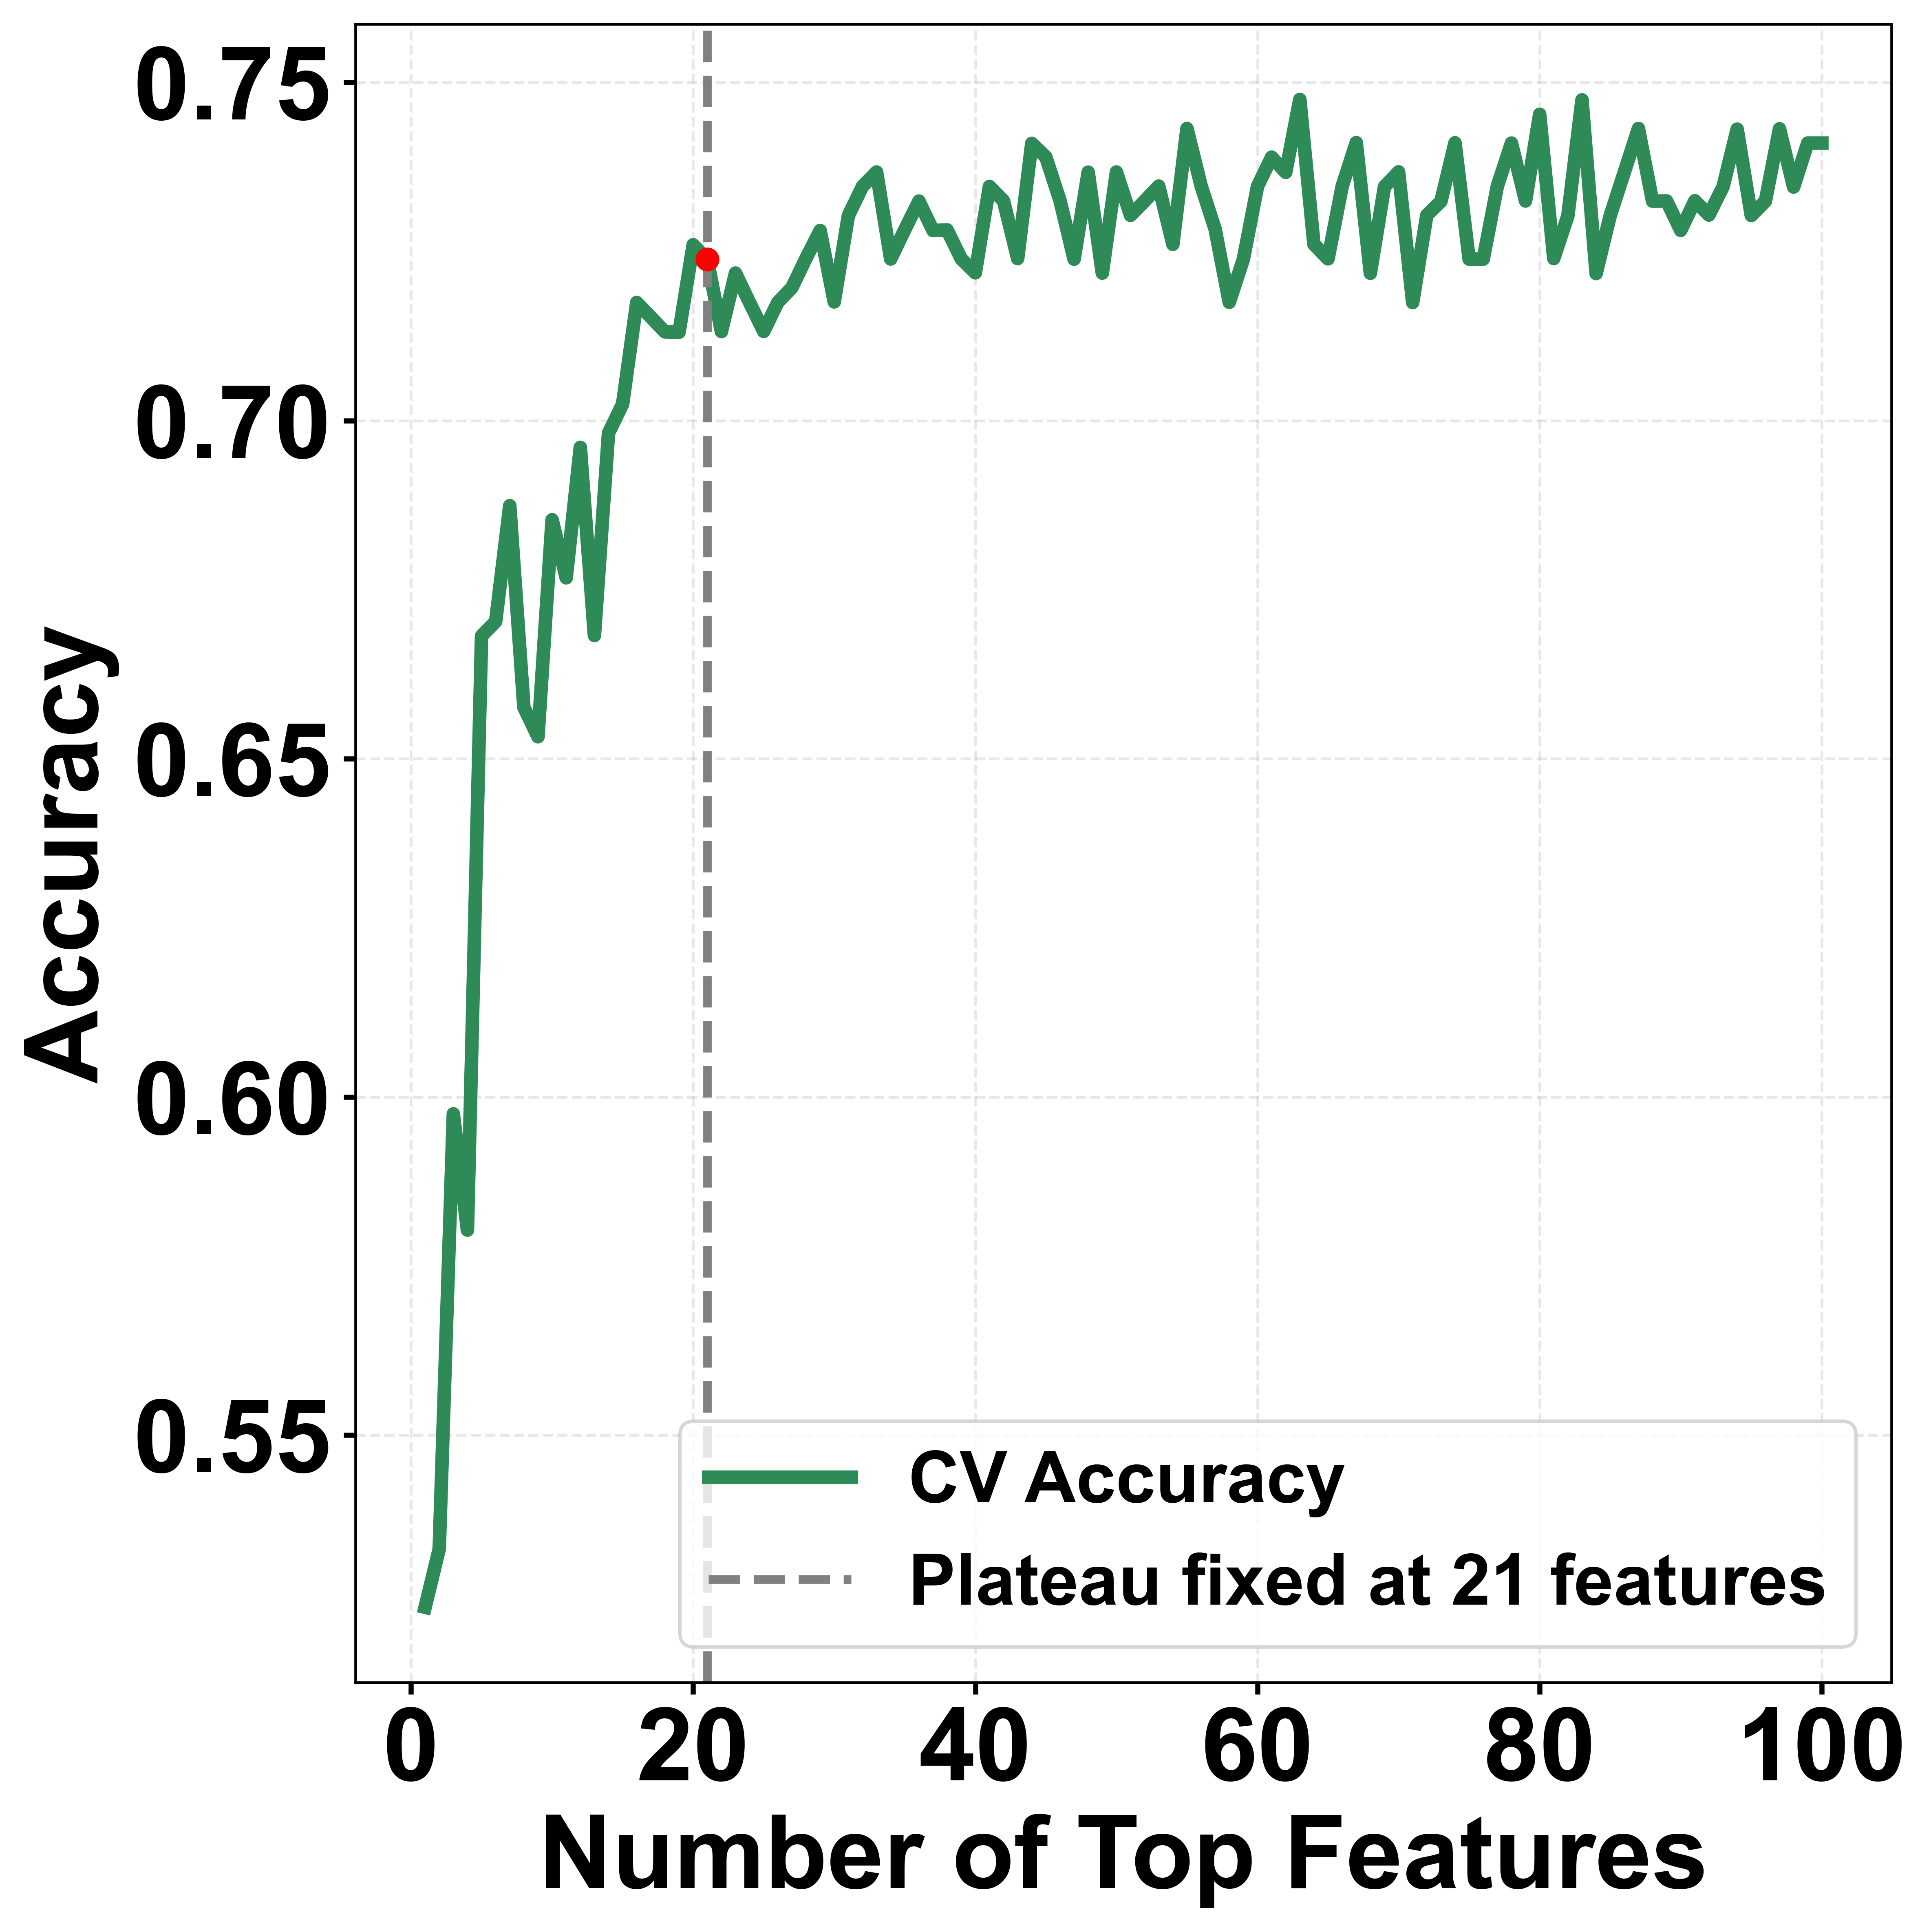

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# --- Set random seeds ---
import random
random.seed(42)
np.random.seed(42)

# --- Input Assumptions ---
top_n = 100
top_features = feature_importance_df['Feature'].values[:top_n]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Accuracy computation ---
accuracies = []
feature_counts = list(range(1, top_n + 1))

for n in feature_counts:
    cols = top_features[:n]
    X_subset = x_train[cols]

    pipeline = make_pipeline(
        StandardScaler(),
        RandomForestClassifier(n_estimators=100, random_state=45)
    )

    scores = cross_val_score(pipeline, X_subset, y_train, cv=kf, scoring='accuracy', n_jobs=1)
    accuracies.append(scores.mean())

# --- Plateau fixed at 21 features ---
plateau_feat = 21
plateau_idx = plateau_feat - 1  # zero-based index

# --- Find max accuracy point ---
max_idx = int(np.argmax(accuracies))
max_feat = feature_counts[max_idx]
max_acc = accuracies[max_idx]

# --- Find first rise (optional but insightful) ---
acc_diff = np.diff(accuracies)
rise_idx = np.argmax(acc_diff > 0.01) + 1 if np.any(acc_diff > 0.01) else None
rise_feat = feature_counts[rise_idx] if rise_idx is not None else None
rise_acc = accuracies[rise_idx] if rise_idx is not None else None

# --- Plot ---
plt.figure(figsize=(8, 8))
plt.plot(feature_counts, accuracies, color='seagreen', label='CV Accuracy', linewidth=4)

# Plateau Marker (fixed)
plt.axvline(x=plateau_feat, linestyle='--', color='gray', linewidth=2.5,
            label=f'Plateau at {plateau_feat} features')
plt.scatter(plateau_feat, accuracies[plateau_idx], color='red', zorder=5)


plt.xlabel("Number of Top Features", fontsize=30, fontweight='bold', family='Arial')
plt.ylabel("Accuracy", fontsize=30, fontweight='bold', family='Arial')
plt.tick_params(axis='both', which='major', labelsize=15, width=1.5)
plt.xticks(fontsize=30, fontweight='bold', color='black', family='Arial')
plt.yticks(fontsize=30, fontweight='bold', color='black', family='Arial')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(prop={'family': 'Arial', 'size': 21, 'weight': 'bold'})
plt.tight_layout()
plt.savefig('topfeatures_RF_CV_model2.png', dpi=600)
plt.show()

In [294]:
import pandas as pd
import os

# --- Extract the top 21 features from original importance DataFrame ---
df_top = feature_importance_df.copy()
df_top = df_top[df_top['Feature'].isin(top_features[:plateau_feat])].copy()

# --- Sort to match the order in top_features[:21] ---
df_top['Order'] = df_top['Feature'].apply(lambda f: list(top_features).index(f))
df_top = df_top.sort_values('Order').drop(columns='Order')

# --- Normalize importances ---
df_top['Normalized_Importance'] = df_top['Importance'] / df_top['Importance'].sum()

# --- Print the table ---
print("\n🔍 Top 21 Features at Plateau:\n")
print(df_top.to_string(index=False))

# --- Save to CSV ---
output_csv = "top21_features_model2.csv"  # <-- Name your file here
try:
    full_path = os.path.join(os.getcwd(), output_csv)
    df_top.to_csv(full_path, index=False, encoding='utf-8')
    print(f"\n✅ CSV successfully saved to: {full_path}")
except Exception as e:
    print(f"\n❌ Error saving CSV: {e}")


🔍 Top 21 Features at Plateau:

  Feature  Importance  Normalized_Importance
   SHdsCH    0.006398               0.078545
      E2m    0.005617               0.068947
    TDB3i    0.005322               0.065335
    ndsCH    0.004965               0.060954
 minssCH2    0.004964               0.060937
   nHdsCH    0.004794               0.058850
   PPSA-3    0.004167               0.051151
    TDB1i    0.004065               0.049898
   VE3_Dt    0.004035               0.049529
    TDB1u    0.003947               0.048453
   ATSC2i    0.003736               0.045865
  AATSC2p    0.003716               0.045614
       Di    0.003312               0.040661
   SHAvin    0.003094               0.037978
    TDB4v    0.003031               0.037213
   GATS5c    0.002810               0.034493
   ATSC2p    0.002744               0.033690
   RDF80u    0.002704               0.033194
       Du    0.002689               0.033015
      E3s    0.002684               0.032946
maxHCsatu    0.002667  

In [295]:
import pandas as pd

# --- NEW BLOCK: per-class mean±std only ---

# Fixed plateau index corresponding to 21 features (zero-based)
plateau_idx = 21 - 1  # 20

# Decide which features to export based on fixed plateau
export_feats = top_features[: plateau_idx + 1]

# Rebuild X_train as DataFrame if needed (ensure feature_names aligns with x_train columns)
feature_names = df.drop('Class', axis=1).columns.tolist()
X_train_df = pd.DataFrame(x_train, columns=feature_names)

# Slice features and attach class labels
stats_df = X_train_df[export_feats].copy()
stats_df['Class'] = y_train   # y_train is 1-D array or Series

# Build rows: Feature, then for each class "Class N mean±std"
rows = []
for feat in export_feats:
    row = {'Feature': feat}
    for cls in sorted(stats_df['Class'].unique()):
        vals = stats_df.loc[stats_df['Class'] == cls, feat]
        mean = vals.mean()
        std  = vals.std()
        row[f'Class {cls} mean±std'] = f"{mean:.4f} ± {std:.4f}"
    rows.append(row)

# Final DataFrame & export
summary_df = pd.DataFrame(rows)
summary_df.to_csv('important_features_mean_std_model2.csv', index=False)
print(f"✅ Saved mean±std for {len(export_feats)} features to 'important_features_mean_std_model2.csv'")

✅ Saved mean±std for 21 features to 'important_features_mean_std_model2.csv'


In [296]:
# plateau_idx was found in your loop; 
# if plateau_idx corresponds to “8 features” then:
n_plateau = feature_counts[plateau_idx]  # this should be 8

# top_features is the array of feature names sorted by importance
plateau_features = top_features[:n_plateau]
print("Features at plateau (top 8):")
for i, f in enumerate(plateau_features, 1):
    print(f"{i}. {f}")


Features at plateau (top 8):
1. SHdsCH
2. E2m
3. TDB3i
4. ndsCH
5. minssCH2
6. nHdsCH
7. PPSA-3
8. TDB1i
9. VE3_Dt
10. TDB1u
11. ATSC2i
12. AATSC2p
13. Di
14. SHAvin
15. TDB4v
16. GATS5c
17. ATSC2p
18. RDF80u
19. Du
20. E3s
21. maxHCsatu


In [297]:
import pandas as pd
from scipy.stats import kruskal

# reload your data
df = pd.read_csv("Compiled_data.csv")
if df.columns[0].startswith("Unnamed"):
    df = df.iloc[:, 1:]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

alpha = 0.05
results = []

for feat in plateau_features:
    v0 = X.loc[y == 0, feat]
    v1 = X.loc[y == 1, feat]
    v2 = X.loc[y == 2, feat]

    # Kruskal–Wallis H-test
    stat, p = kruskal(v0, v1, v2)
    results.append({
        "Feature": feat,
        "H-stat": stat,
        "p-value": p,
        "Significant": "Yes" if p < alpha else "No"
    })

kruskal_df = pd.DataFrame(results)
print(kruskal_df)

      Feature     H-stat       p-value Significant
0      SHdsCH  39.252100  2.995813e-09         Yes
1         E2m  46.754320  7.037663e-11         Yes
2       TDB3i  26.402164  1.848600e-06         Yes
3       ndsCH  39.124427  3.193292e-09         Yes
4    minssCH2  78.383159  9.534838e-18         Yes
5      nHdsCH  39.124427  3.193292e-09         Yes
6      PPSA-3  43.093876  4.388173e-10         Yes
7       TDB1i  33.369949  5.672933e-08         Yes
8      VE3_Dt   1.218613  5.437277e-01          No
9       TDB1u  38.056136  5.447724e-09         Yes
10     ATSC2i  31.499283  1.445498e-07         Yes
11    AATSC2p  71.859246  2.488645e-16         Yes
12         Di  31.146661  1.724204e-07         Yes
13     SHAvin  44.238301  2.476138e-10         Yes
14      TDB4v  31.564219  1.399319e-07         Yes
15     GATS5c  26.343867  1.903277e-06         Yes
16     ATSC2p  64.042846  1.239575e-14         Yes
17     RDF80u   0.084951  9.584141e-01          No
18         Du  32.650162  8.130

Features |    Mean    |    Std
--------------------------------
  6      | 0.6574   | 0.0440
  7      | 0.6639   | 0.0367
  8      | 0.6704   | 0.0349
  9      | 0.6511   | 0.0347
 10      | 0.6896   | 0.0454
 11      | 0.6704   | 0.0471
 12      | 0.6960   | 0.0389


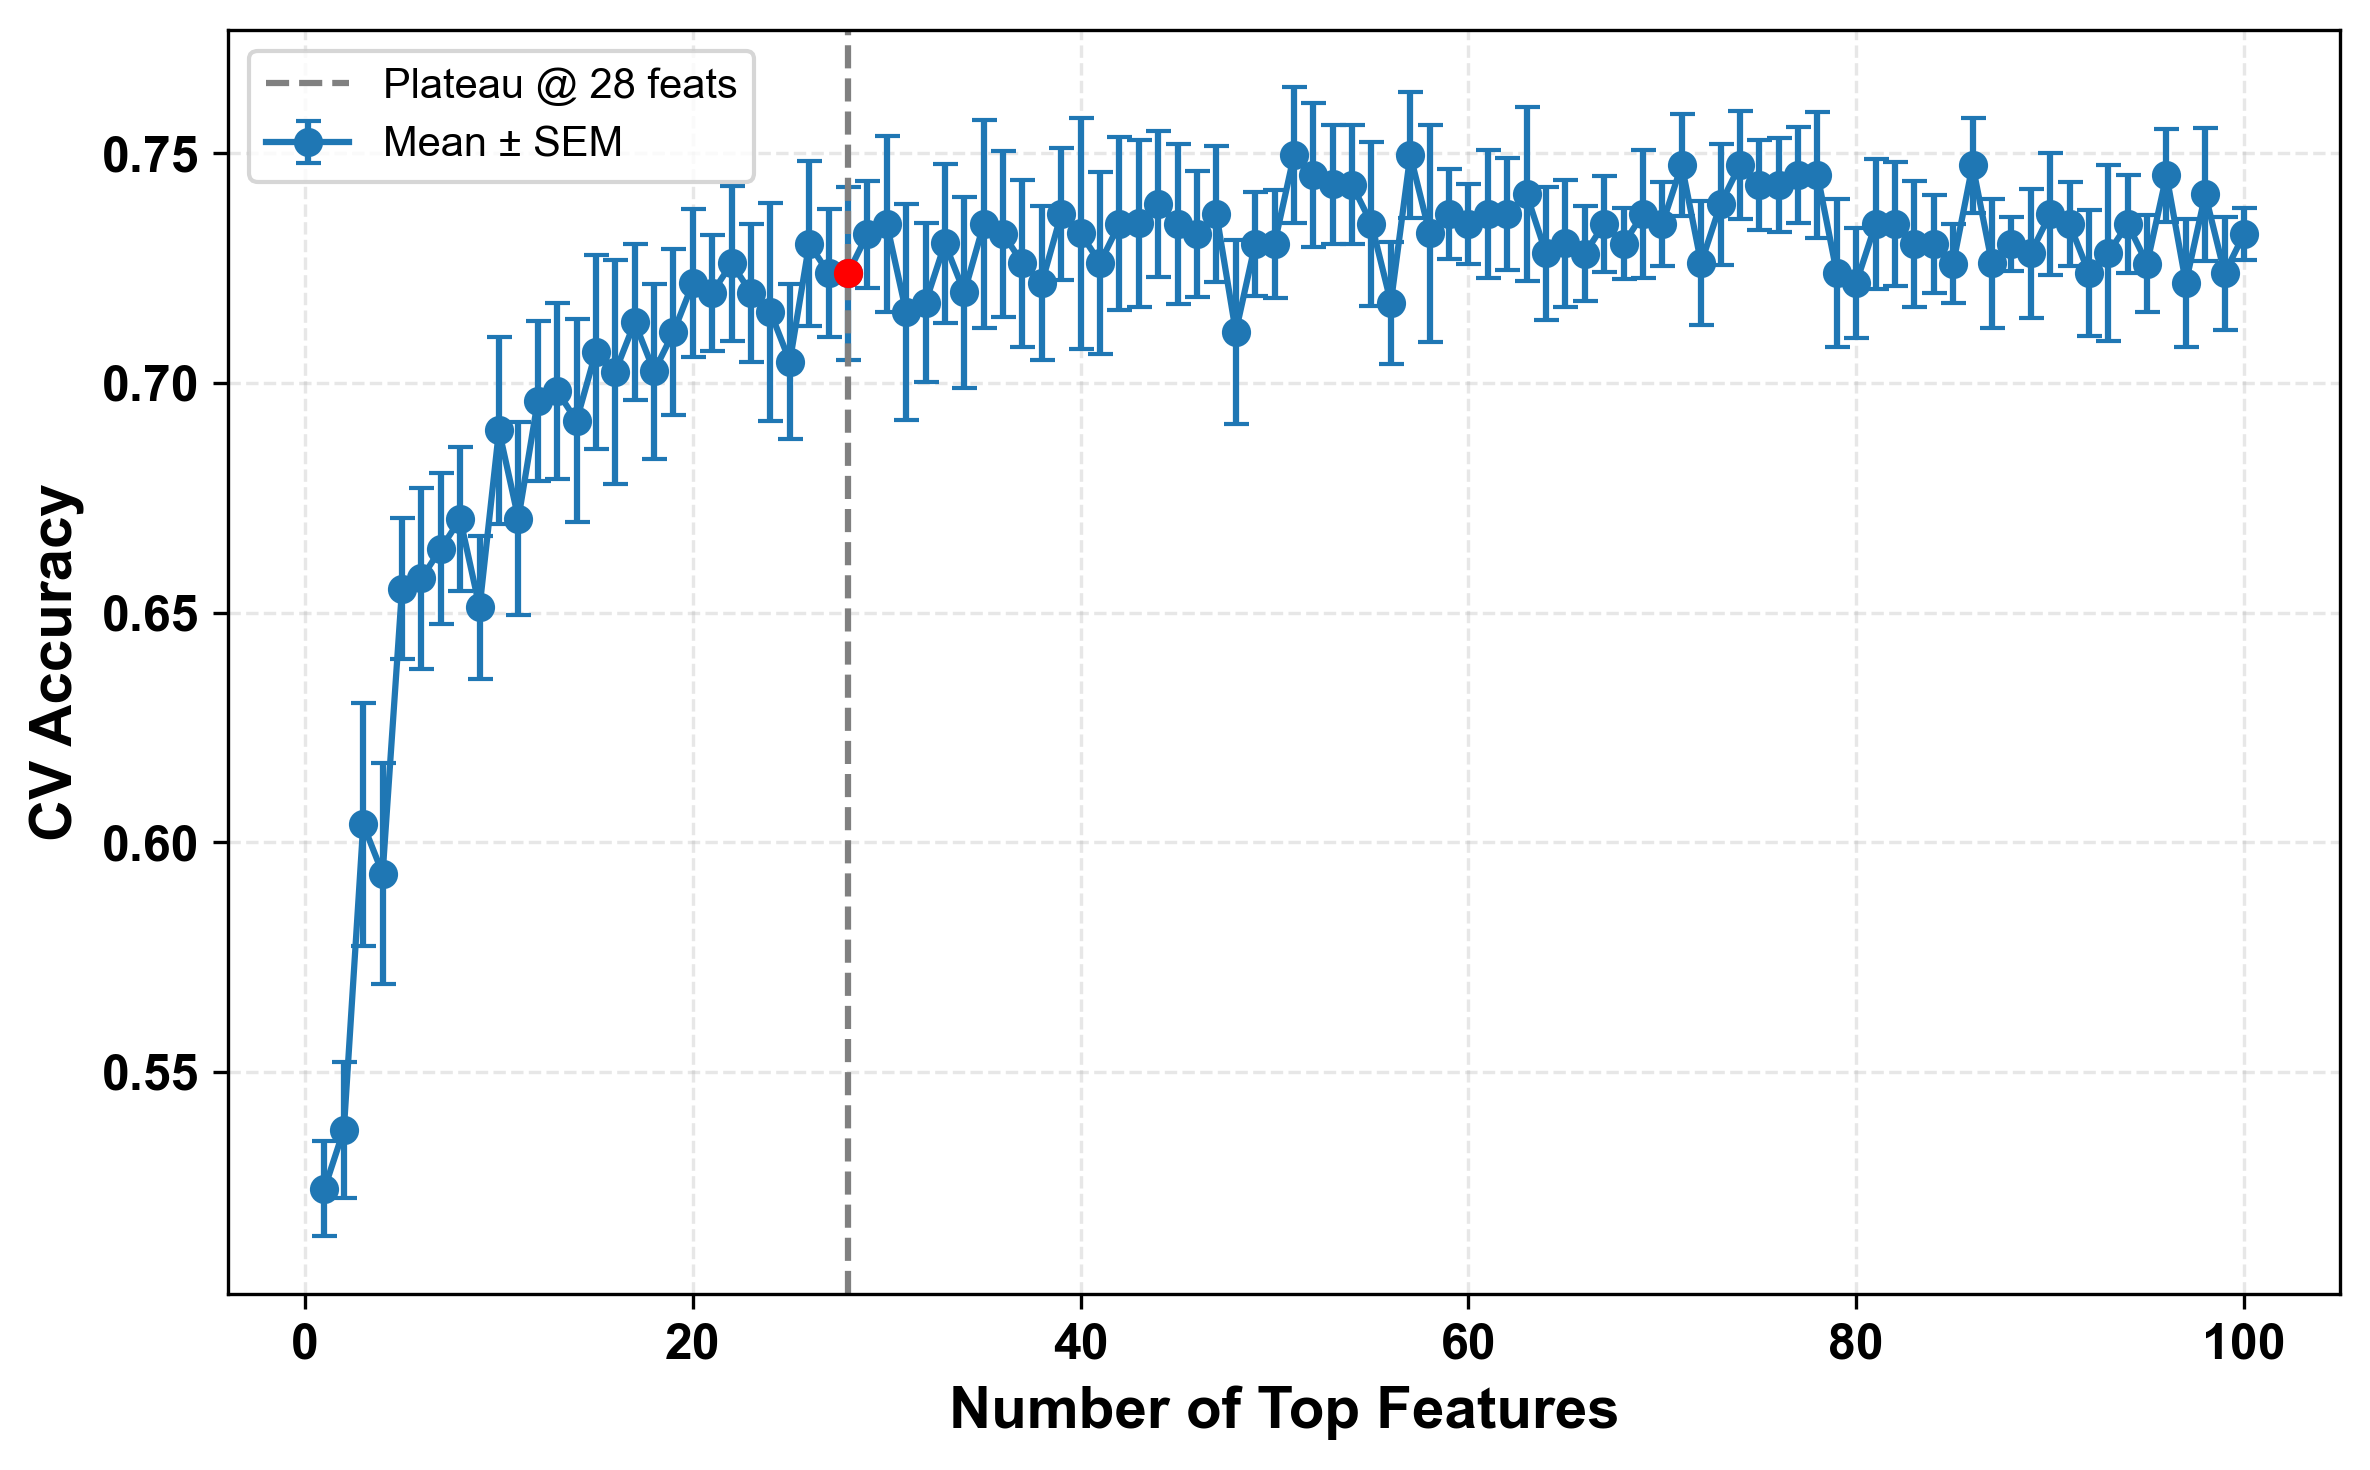

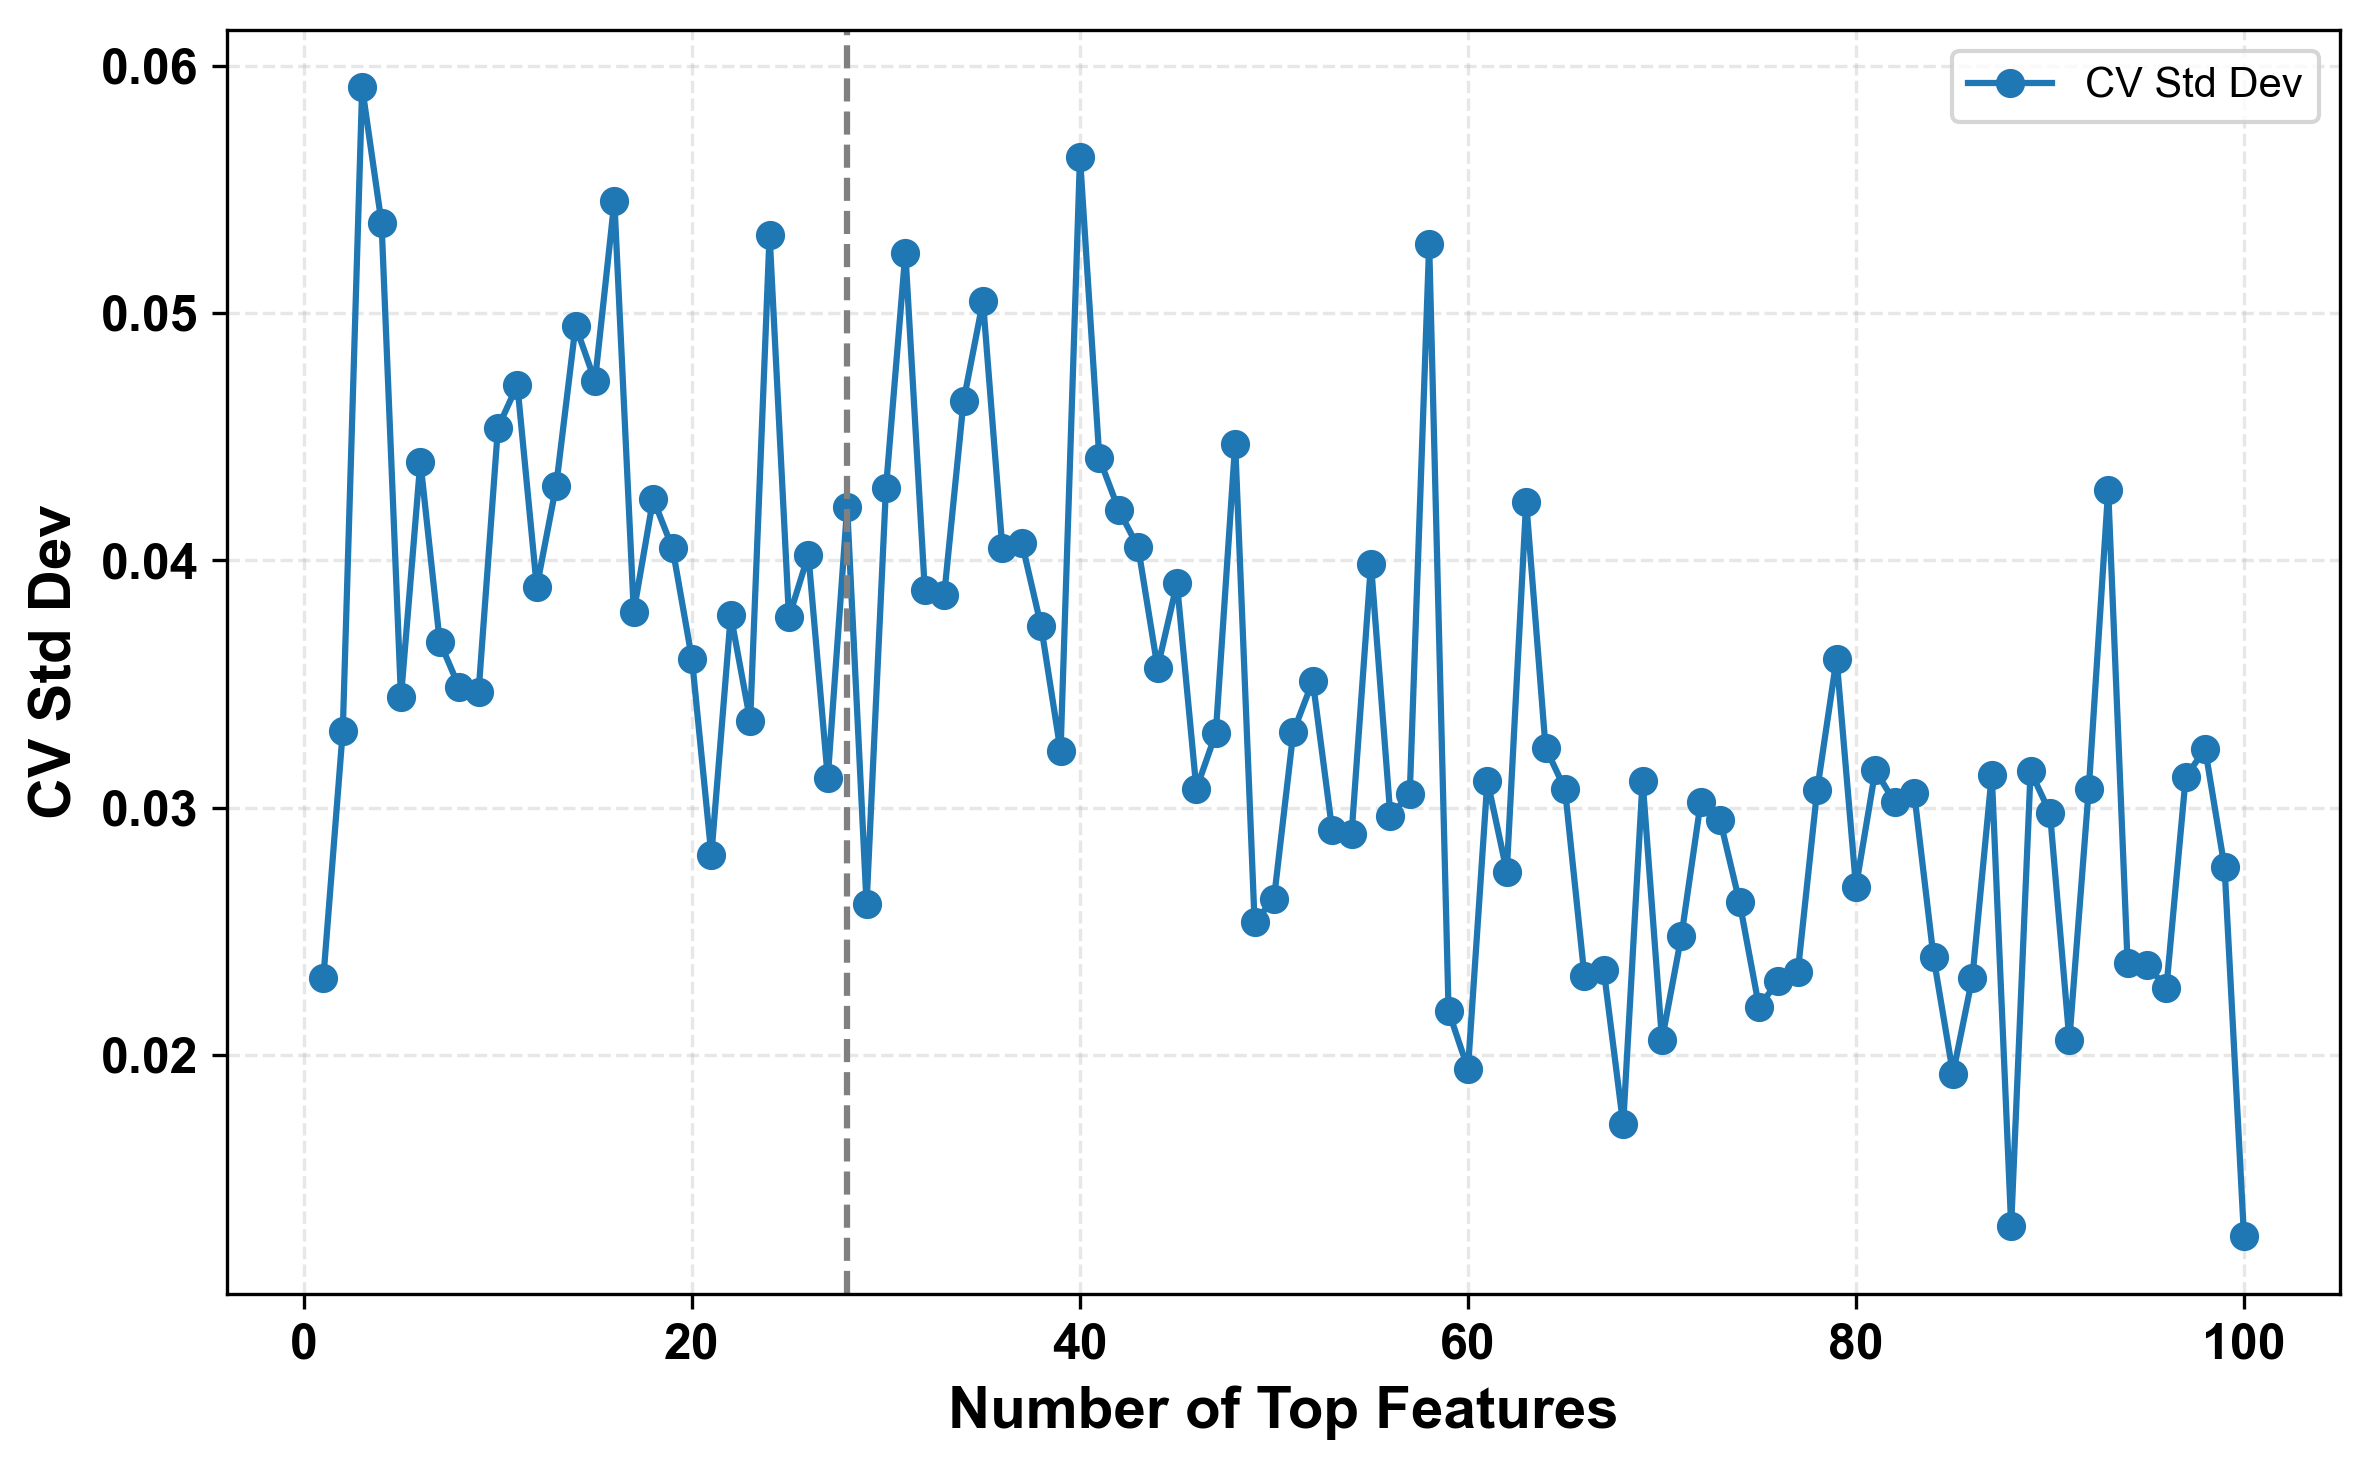


Wilcoxon test: 27 vs 28 features → statistic=7.000, p-value=1.0000


In [298]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import wilcoxon

# ─────────────────────────────────────────────────────────────────────────────
# 0) PARAMETERS & SETUP
top_n = 100
threshold = 0.002
alpha = 0.05

# Select the top 100 features by importance
top_features = feature_importance_df['Feature'].values[:top_n]

# Prepare a 5-fold CV splitter with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ─────────────────────────────────────────────────────────────────────────────
# 1) PRINT mean ± std ACCURACY FOR 6–12 FEATURES
print("Features |    Mean    |    Std")
print("--------------------------------")
for n in range(6, 13):
    scores = cross_val_score(
        make_pipeline(StandardScaler(),
                      RandomForestClassifier(n_estimators=100, random_state=42)),
        x_train[top_features[:n]], y_train,
        cv=kf, scoring='accuracy'
    )
    print(f"{n:3d}      | {scores.mean():.4f}   | {scores.std():.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# 2) COMPUTE MEANS, SEMs, AND RAW STDs FOR 1–100 FEATURES
feature_counts = list(range(1, top_n + 1))
means = []
sems  = []
stds  = []

for n in feature_counts:
    scores = cross_val_score(
        make_pipeline(StandardScaler(),
                      RandomForestClassifier(n_estimators=100, random_state=42)),
        x_train[top_features[:n]], y_train,
        cv=kf, scoring='accuracy'
    )
    means.append(scores.mean())
    stds.append(scores.std())
    sems.append(scores.std() / np.sqrt(len(scores)))

# Detect plateau index: first Δmean < threshold
plateau_idx = next(
    (i for i in range(1, len(means))
     if abs(means[i] - means[i-1]) < threshold),
    None
)

# ─────────────────────────────────────────────────────────────────────────────
# 3) PLOT MEAN ± SEM WITH PLATEAU LINE
plt.rcParams.update({'font.family':'Arial', 'figure.dpi':300})
plt.figure(figsize=(8,5))
plt.errorbar(feature_counts, means, yerr=sems, fmt='-o', capsize=3, label='Mean ± SEM')

if plateau_idx is not None:
    feat = feature_counts[plateau_idx]
    acc  = means[plateau_idx]
    plt.axvline(feat, linestyle='--', color='gray',
                label=f'Plateau @ {feat} feats')
    plt.scatter(feat, acc, color='red', zorder=5)

plt.xlabel("Number of Top Features", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("CV Accuracy",             fontsize=14, fontweight='bold', family='Arial')
plt.xticks(fontsize=12, fontweight='bold', family='Arial')
plt.yticks(fontsize=12, fontweight='bold', family='Arial')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 4) PLOT RAW STD TO SHOW INSTABILITY
plt.figure(figsize=(8,5))
plt.plot(feature_counts, stds, '-o', label='CV Std Dev')
if plateau_idx is not None:
    plt.axvline(feature_counts[plateau_idx], linestyle='--', color='gray')
plt.xlabel("Number of Top Features", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("CV Std Dev",             fontsize=14, fontweight='bold', family='Arial')
plt.xticks(fontsize=12, fontweight='bold', family='Arial')
plt.yticks(fontsize=12, fontweight='bold', family='Arial')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 5) WILCOXON PAIRED TEST BETWEEN 8 vs. 9 FEATURES
if plateau_idx is not None:
    n1, n2 = plateau_idx+0, plateau_idx+1  # 8 and 9 if plateau_idx == 7
    scores1 = cross_val_score(
        make_pipeline(StandardScaler(),
                      RandomForestClassifier(n_estimators=100, random_state=42)),
        x_train[top_features[:n1]], y_train, cv=kf, scoring='accuracy'
    )
    scores2 = cross_val_score(
        make_pipeline(StandardScaler(),
                      RandomForestClassifier(n_estimators=100, random_state=42)),
        x_train[top_features[:n2]], y_train, cv=kf, scoring='accuracy'
    )
    stat, p = wilcoxon(scores1, scores2)
    print(f"\nWilcoxon test: {n1} vs {n2} features → statistic={stat:.3f}, p-value={p:.4f}")


In [299]:
top_features = feature_importance_df.nlargest(5, 'Importance')

  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_10597/150074321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=ele, palette='rocket')  # ✅ fixed


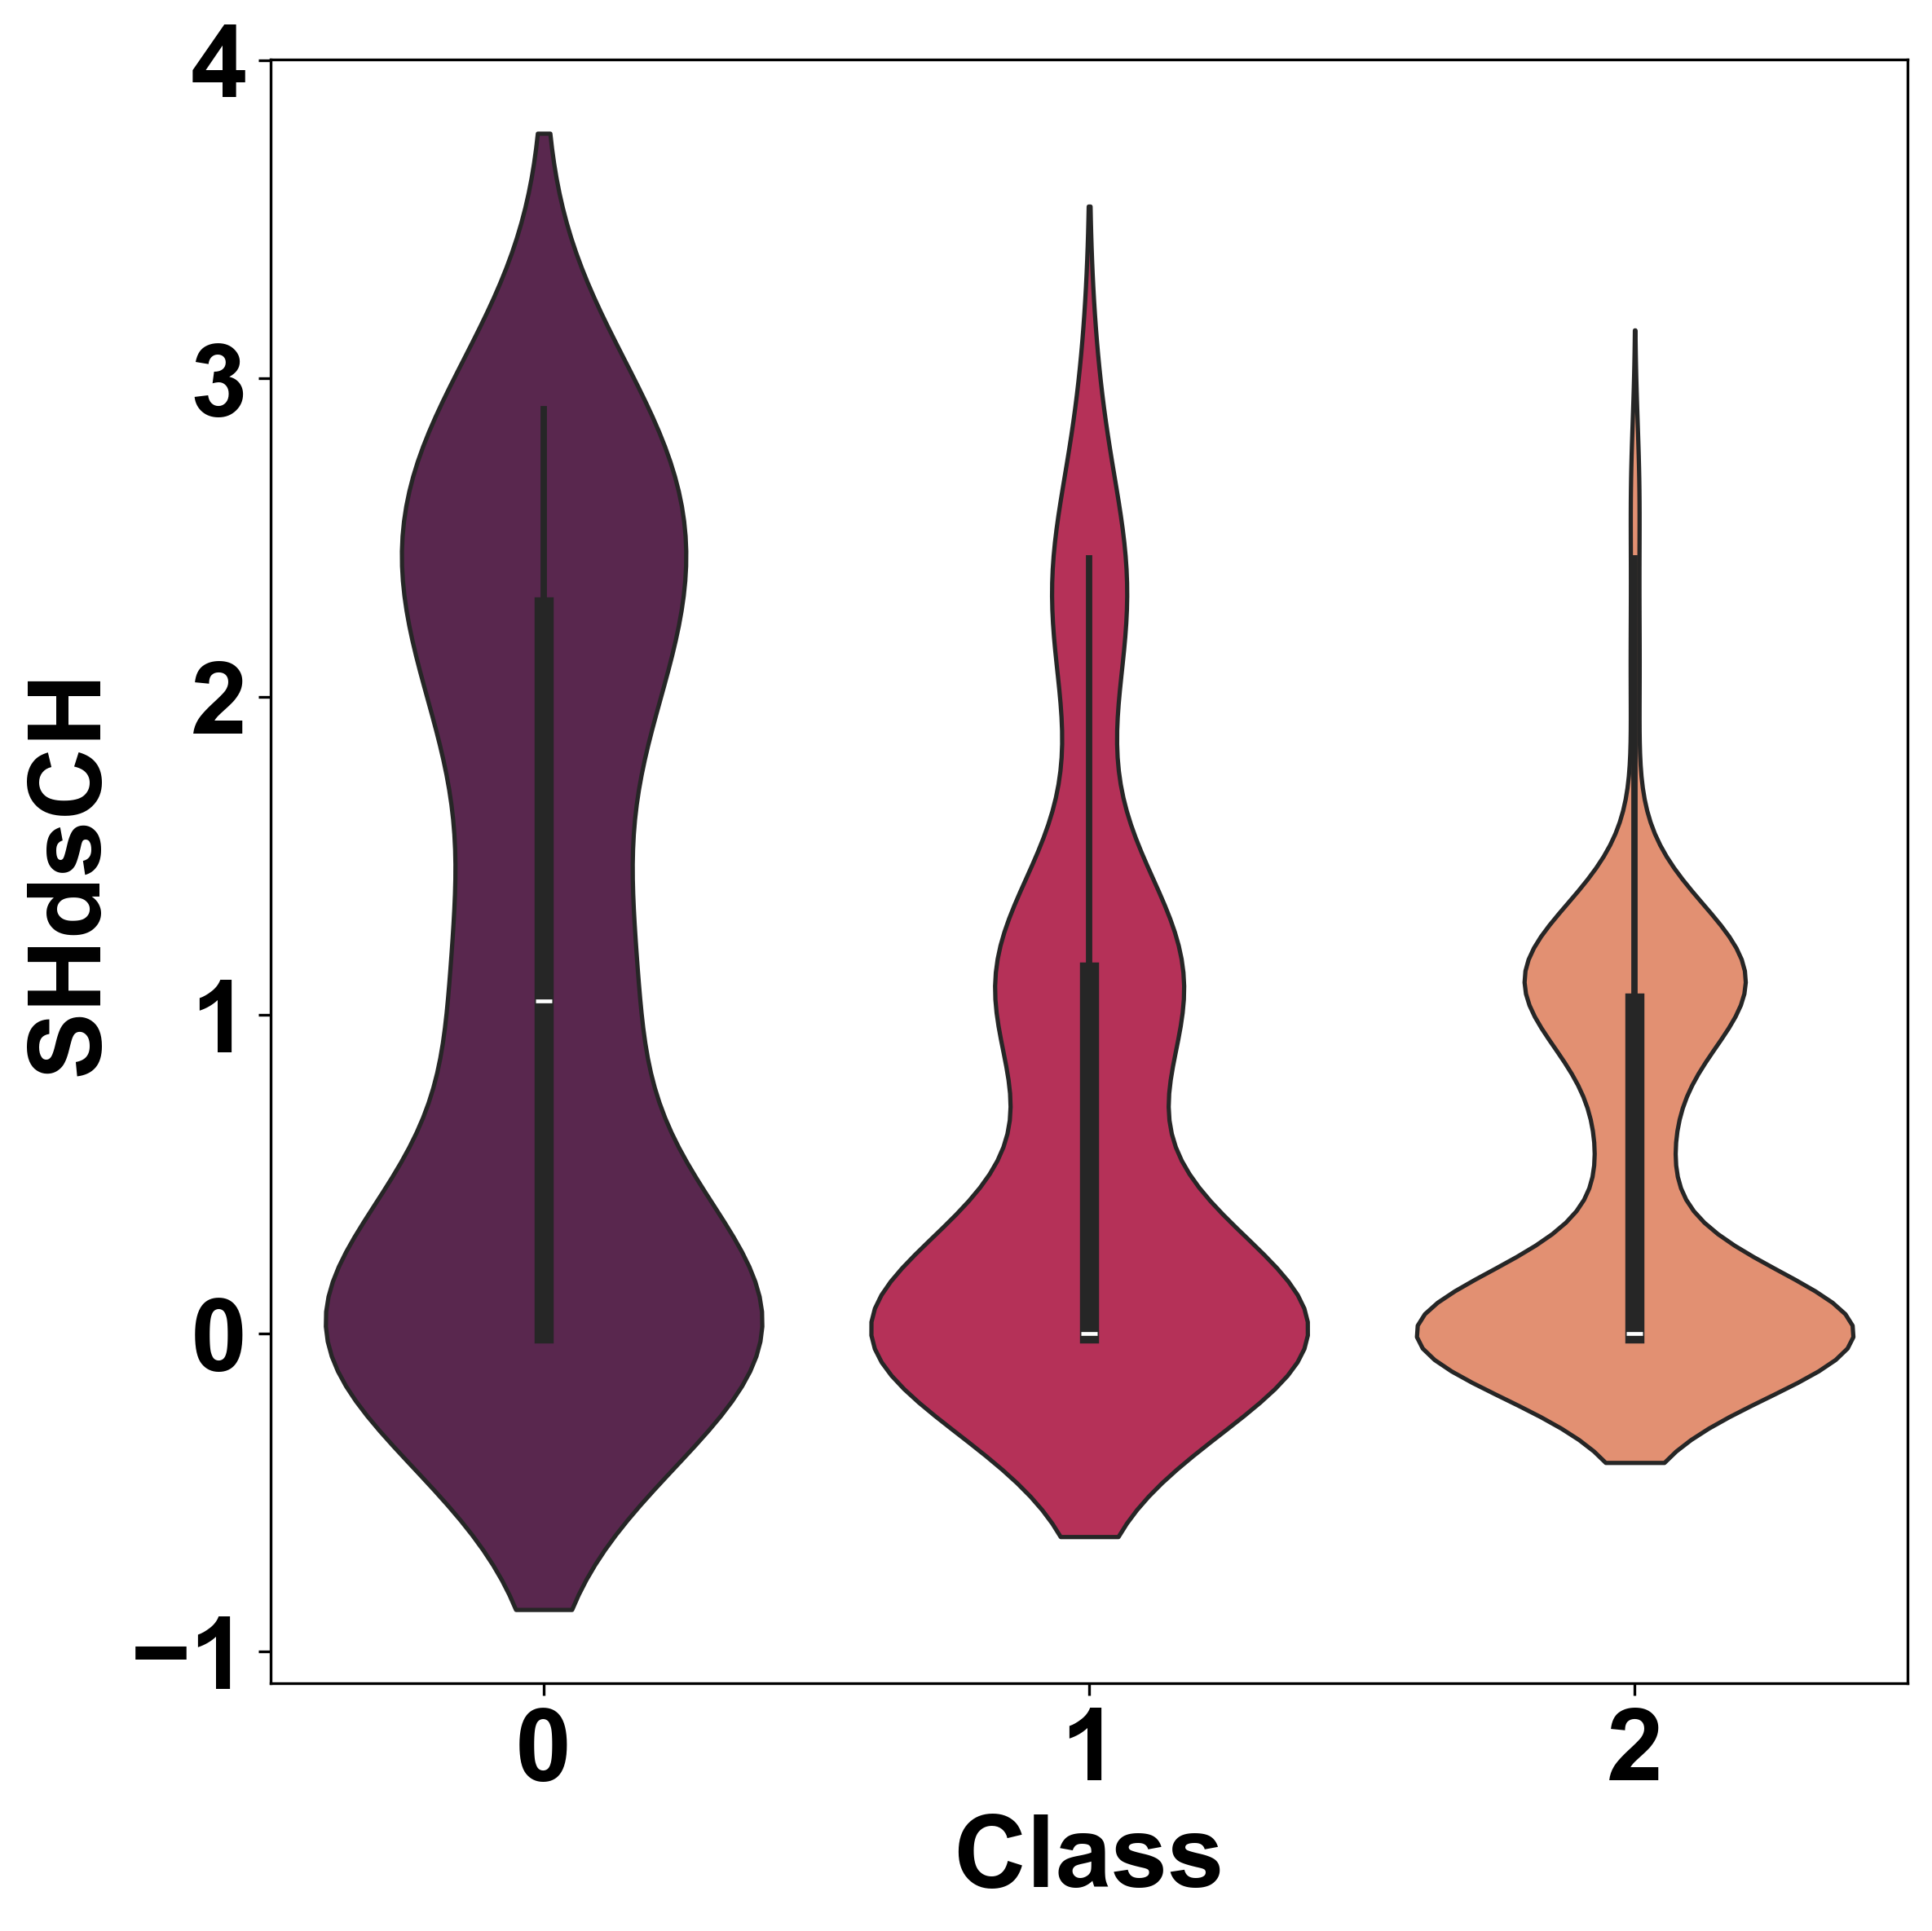

 25%|██▌       | 1/4 [00:01<00:04,  1.60s/it]/tmp/ipykernel_10597/150074321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=ele, palette='rocket')  # ✅ fixed


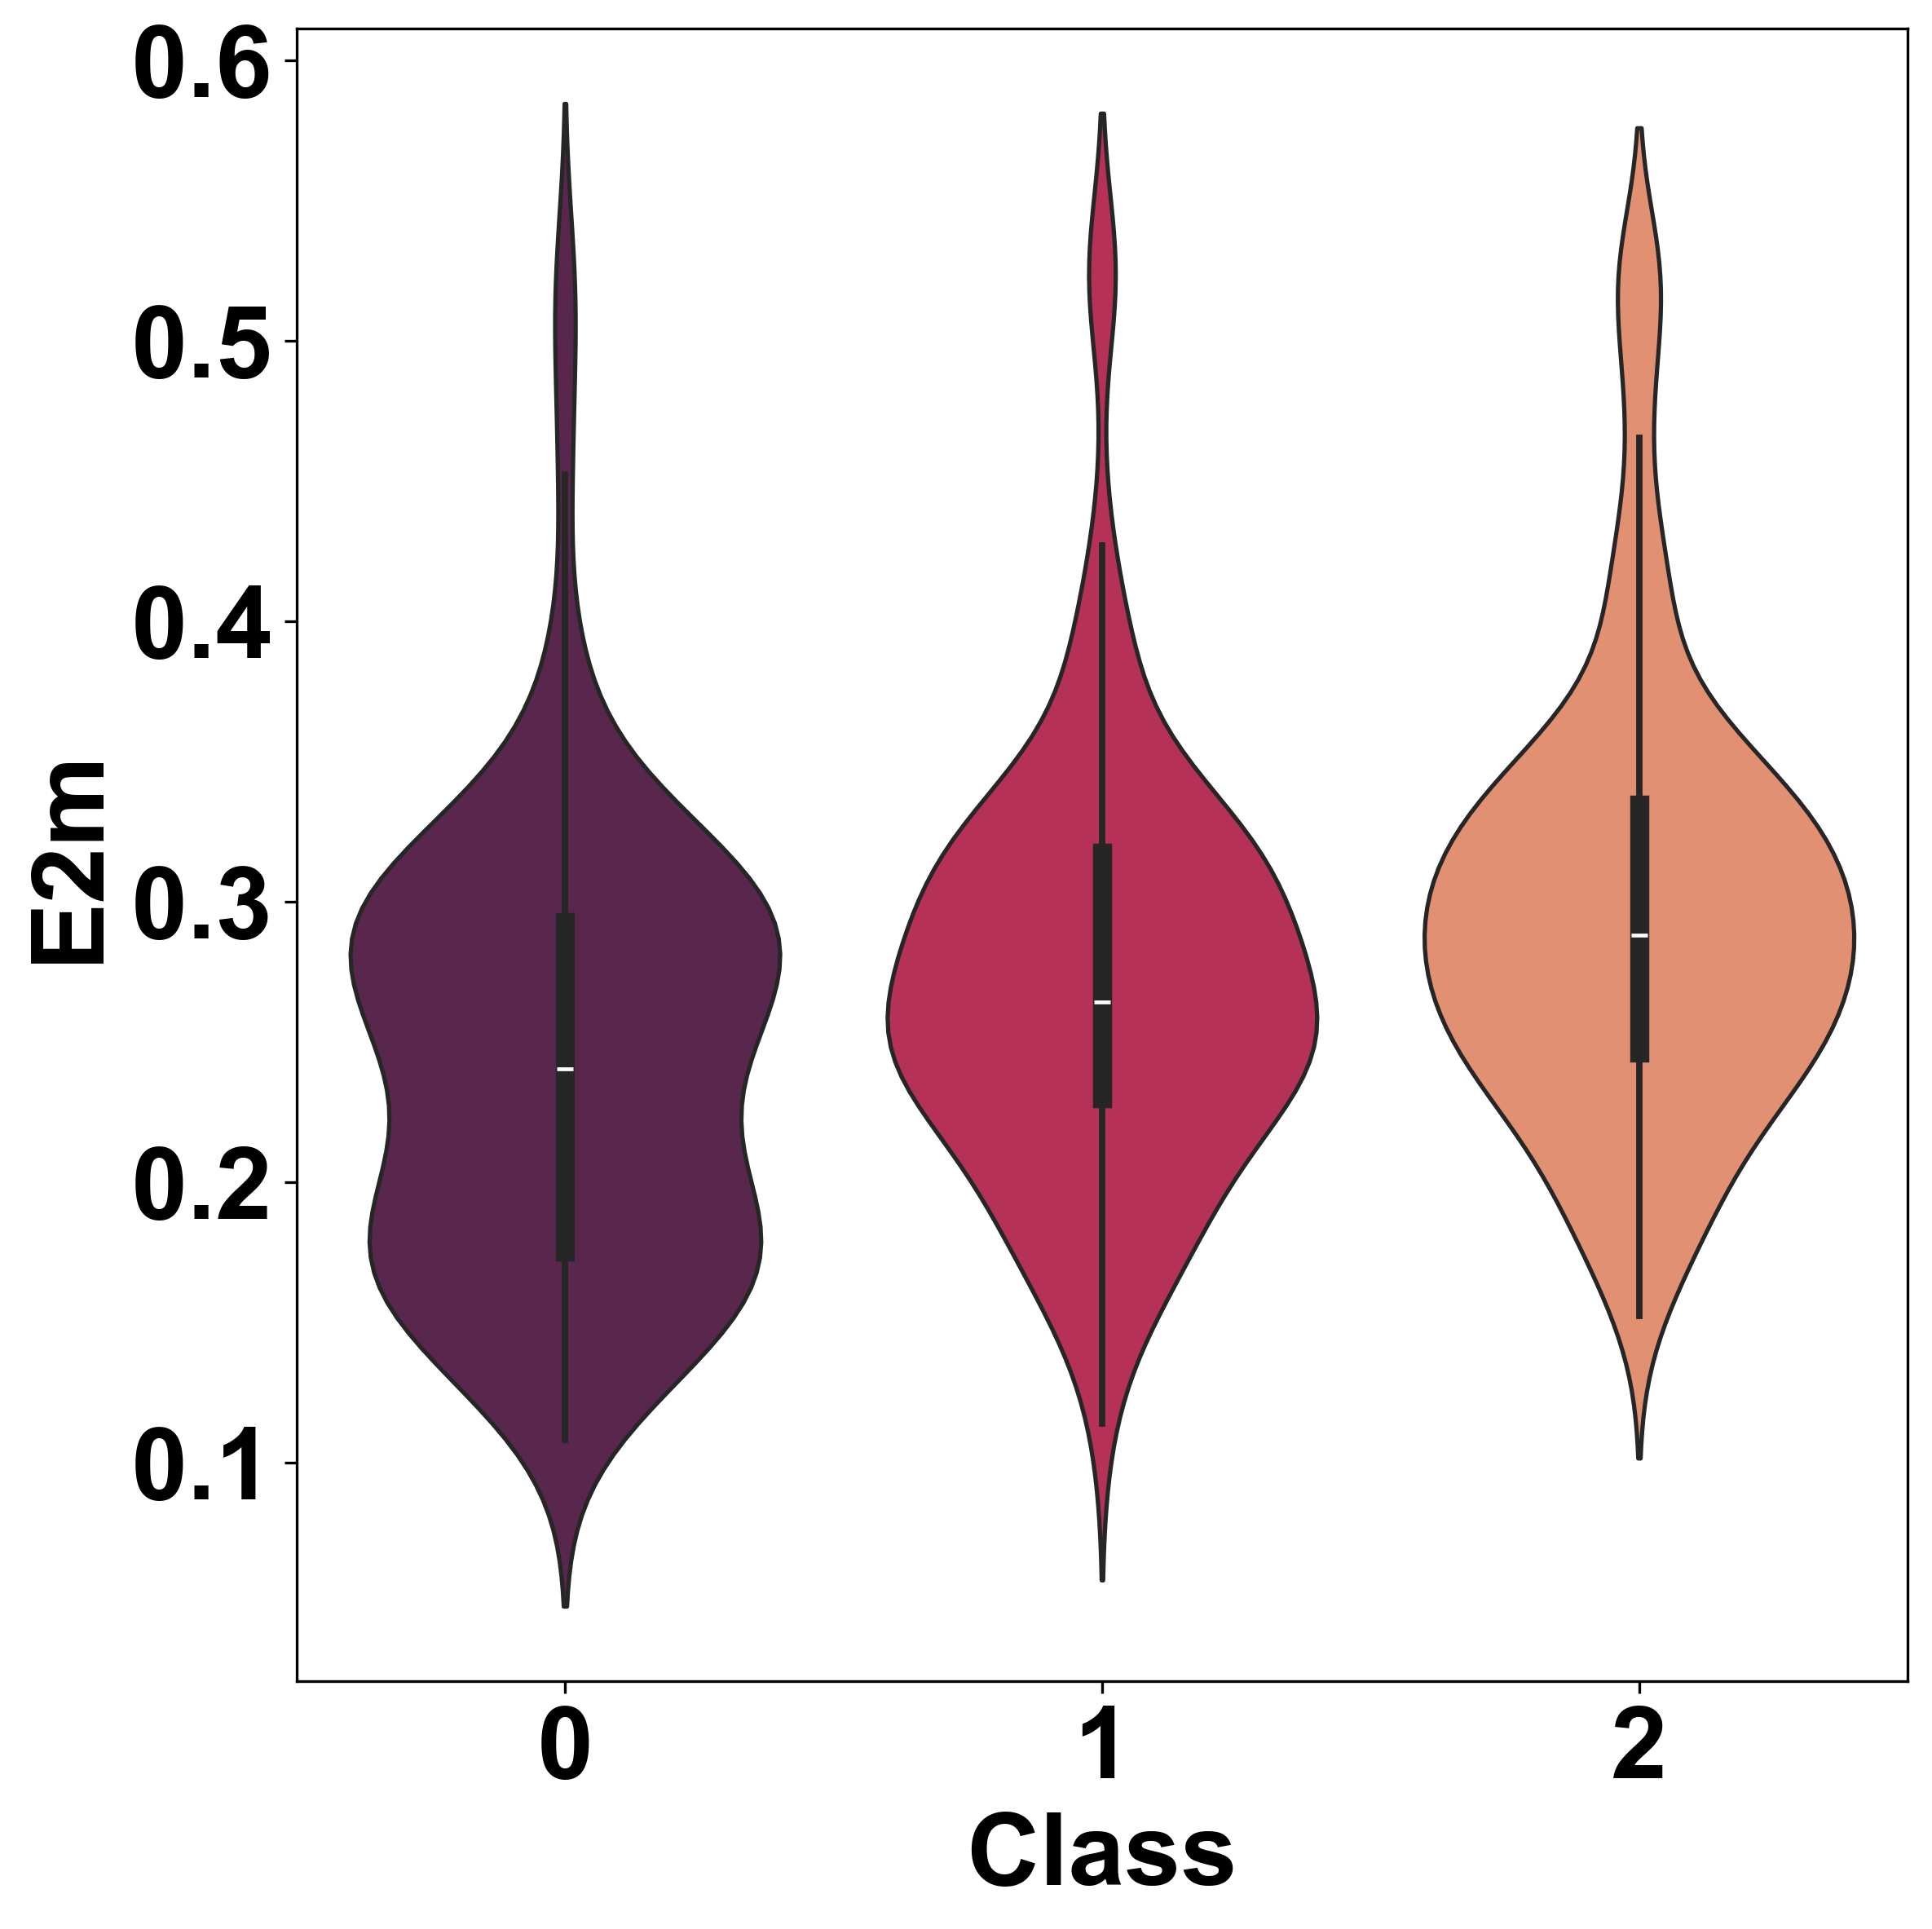

 50%|█████     | 2/4 [00:03<00:03,  1.58s/it]/tmp/ipykernel_10597/150074321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=ele, palette='rocket')  # ✅ fixed


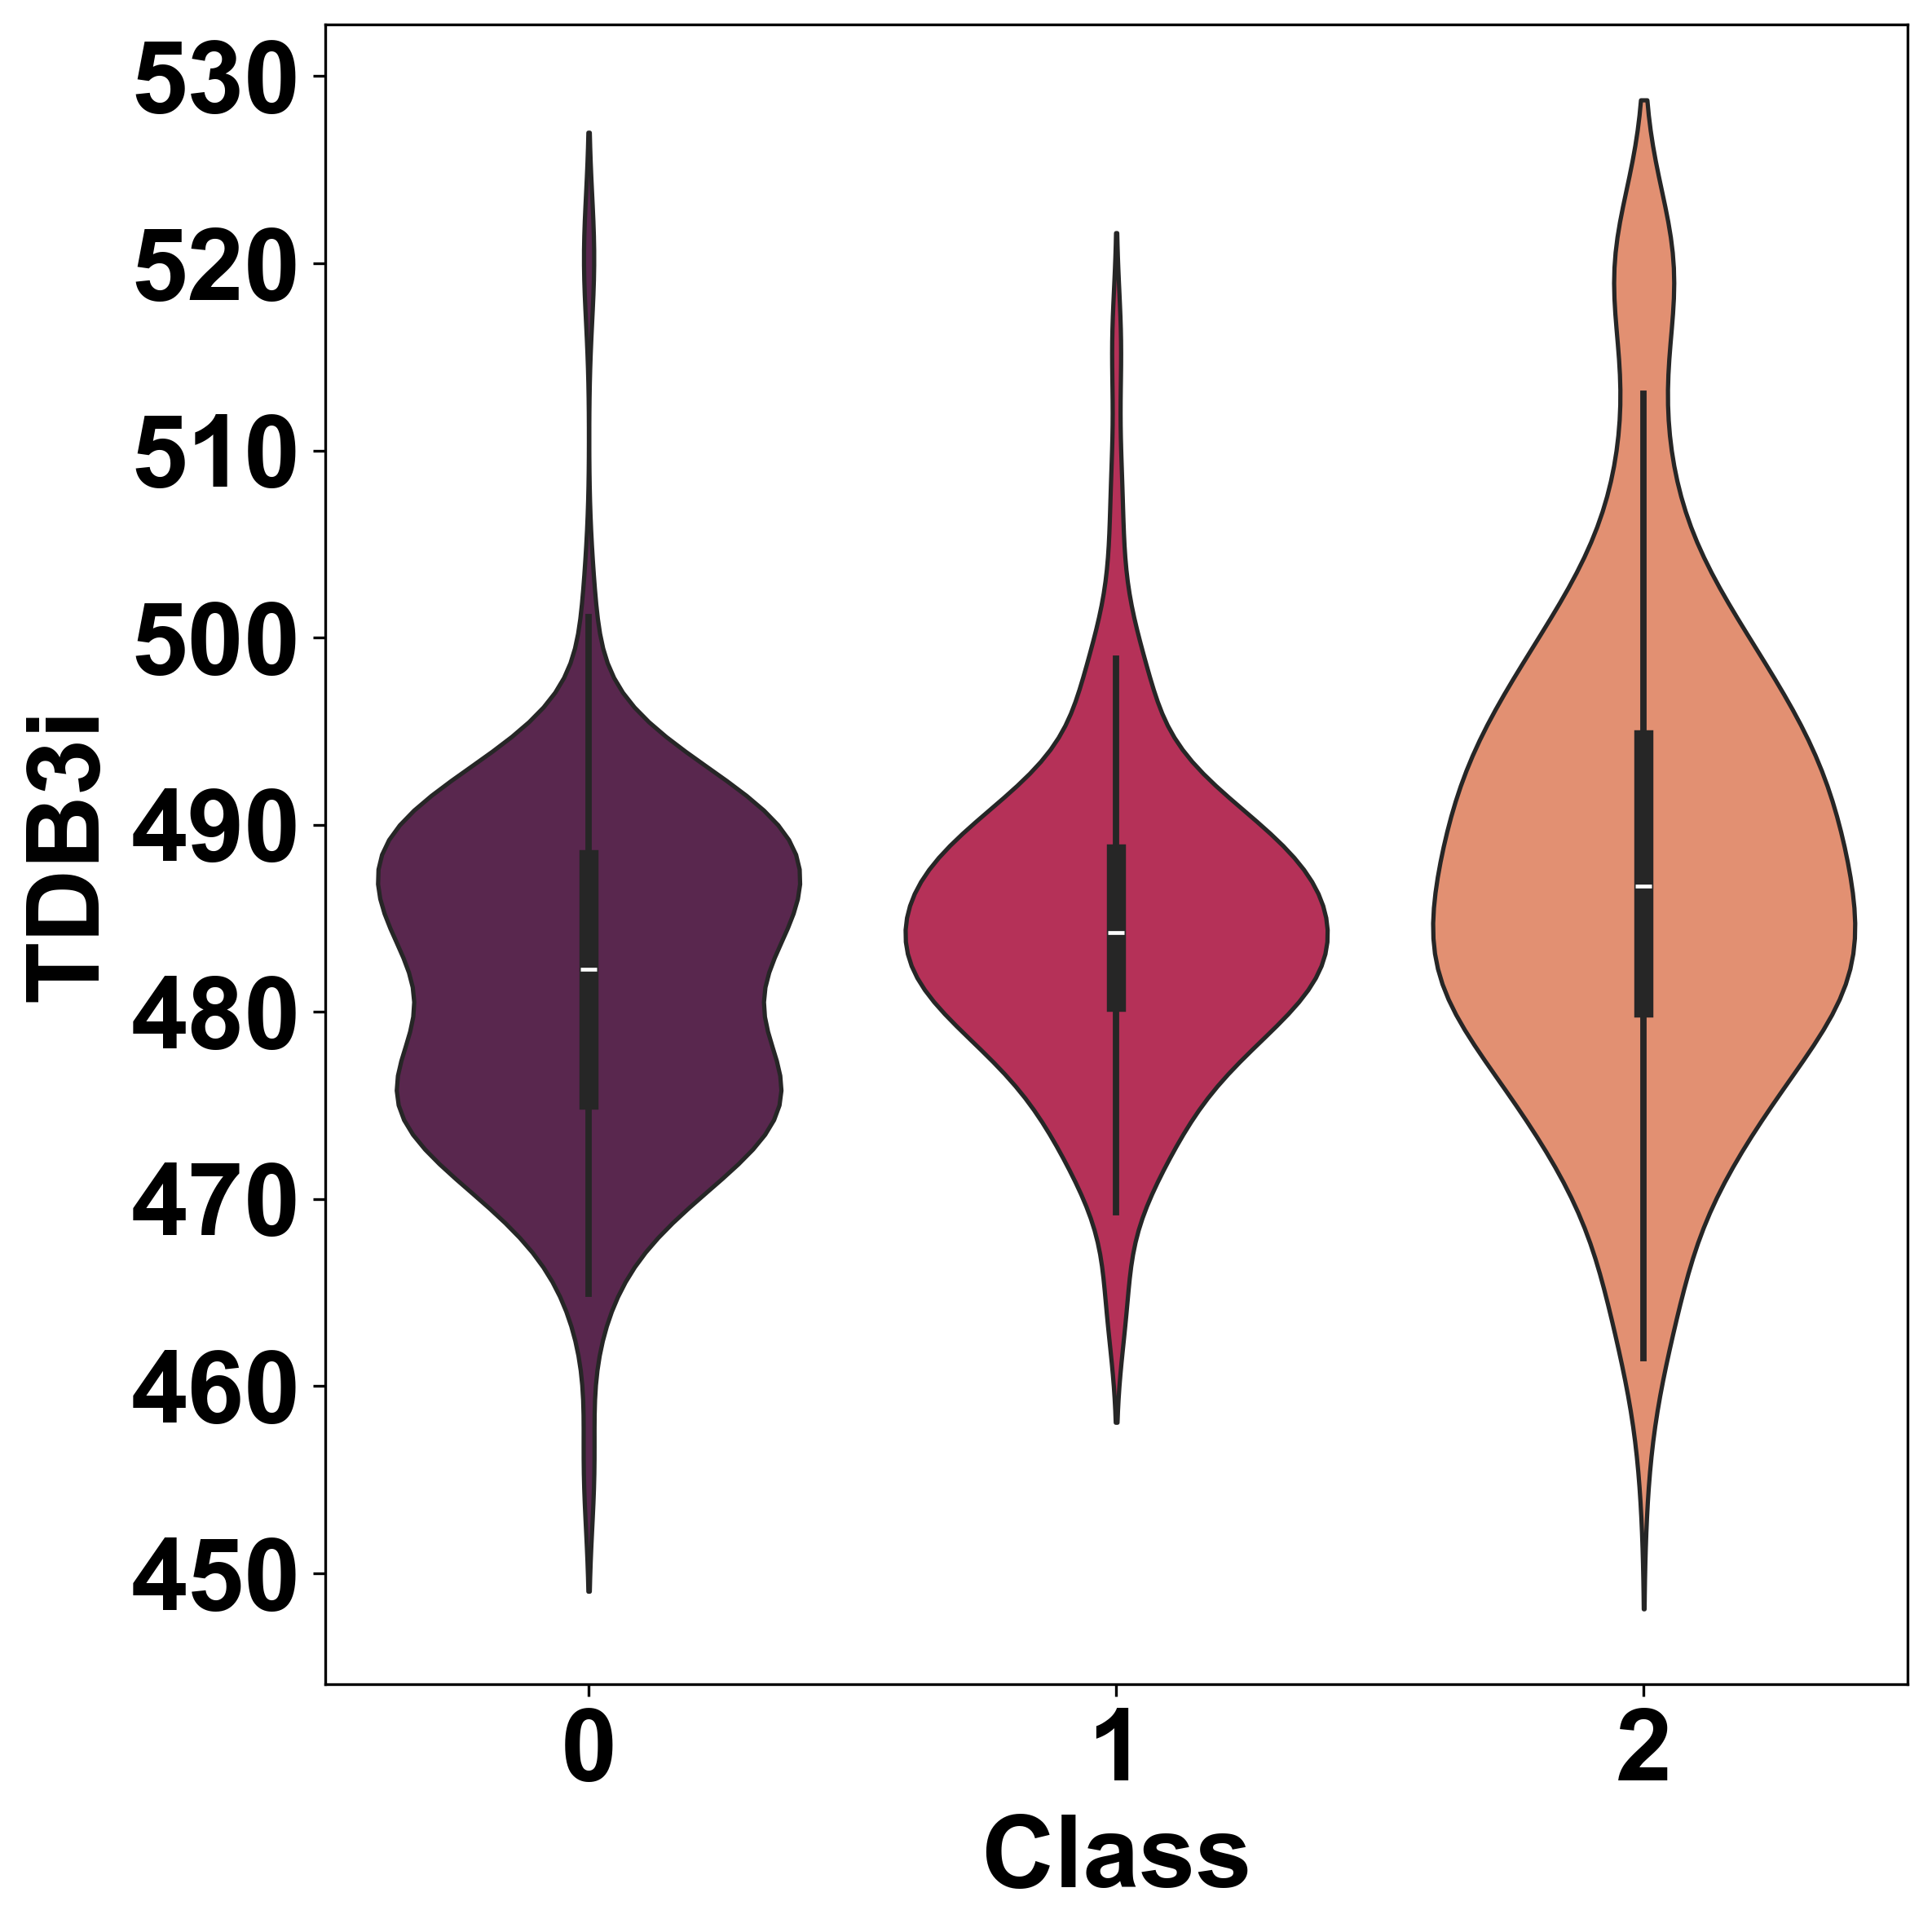

 75%|███████▌  | 3/4 [00:04<00:01,  1.60s/it]/tmp/ipykernel_10597/150074321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=ele, palette='rocket')  # ✅ fixed


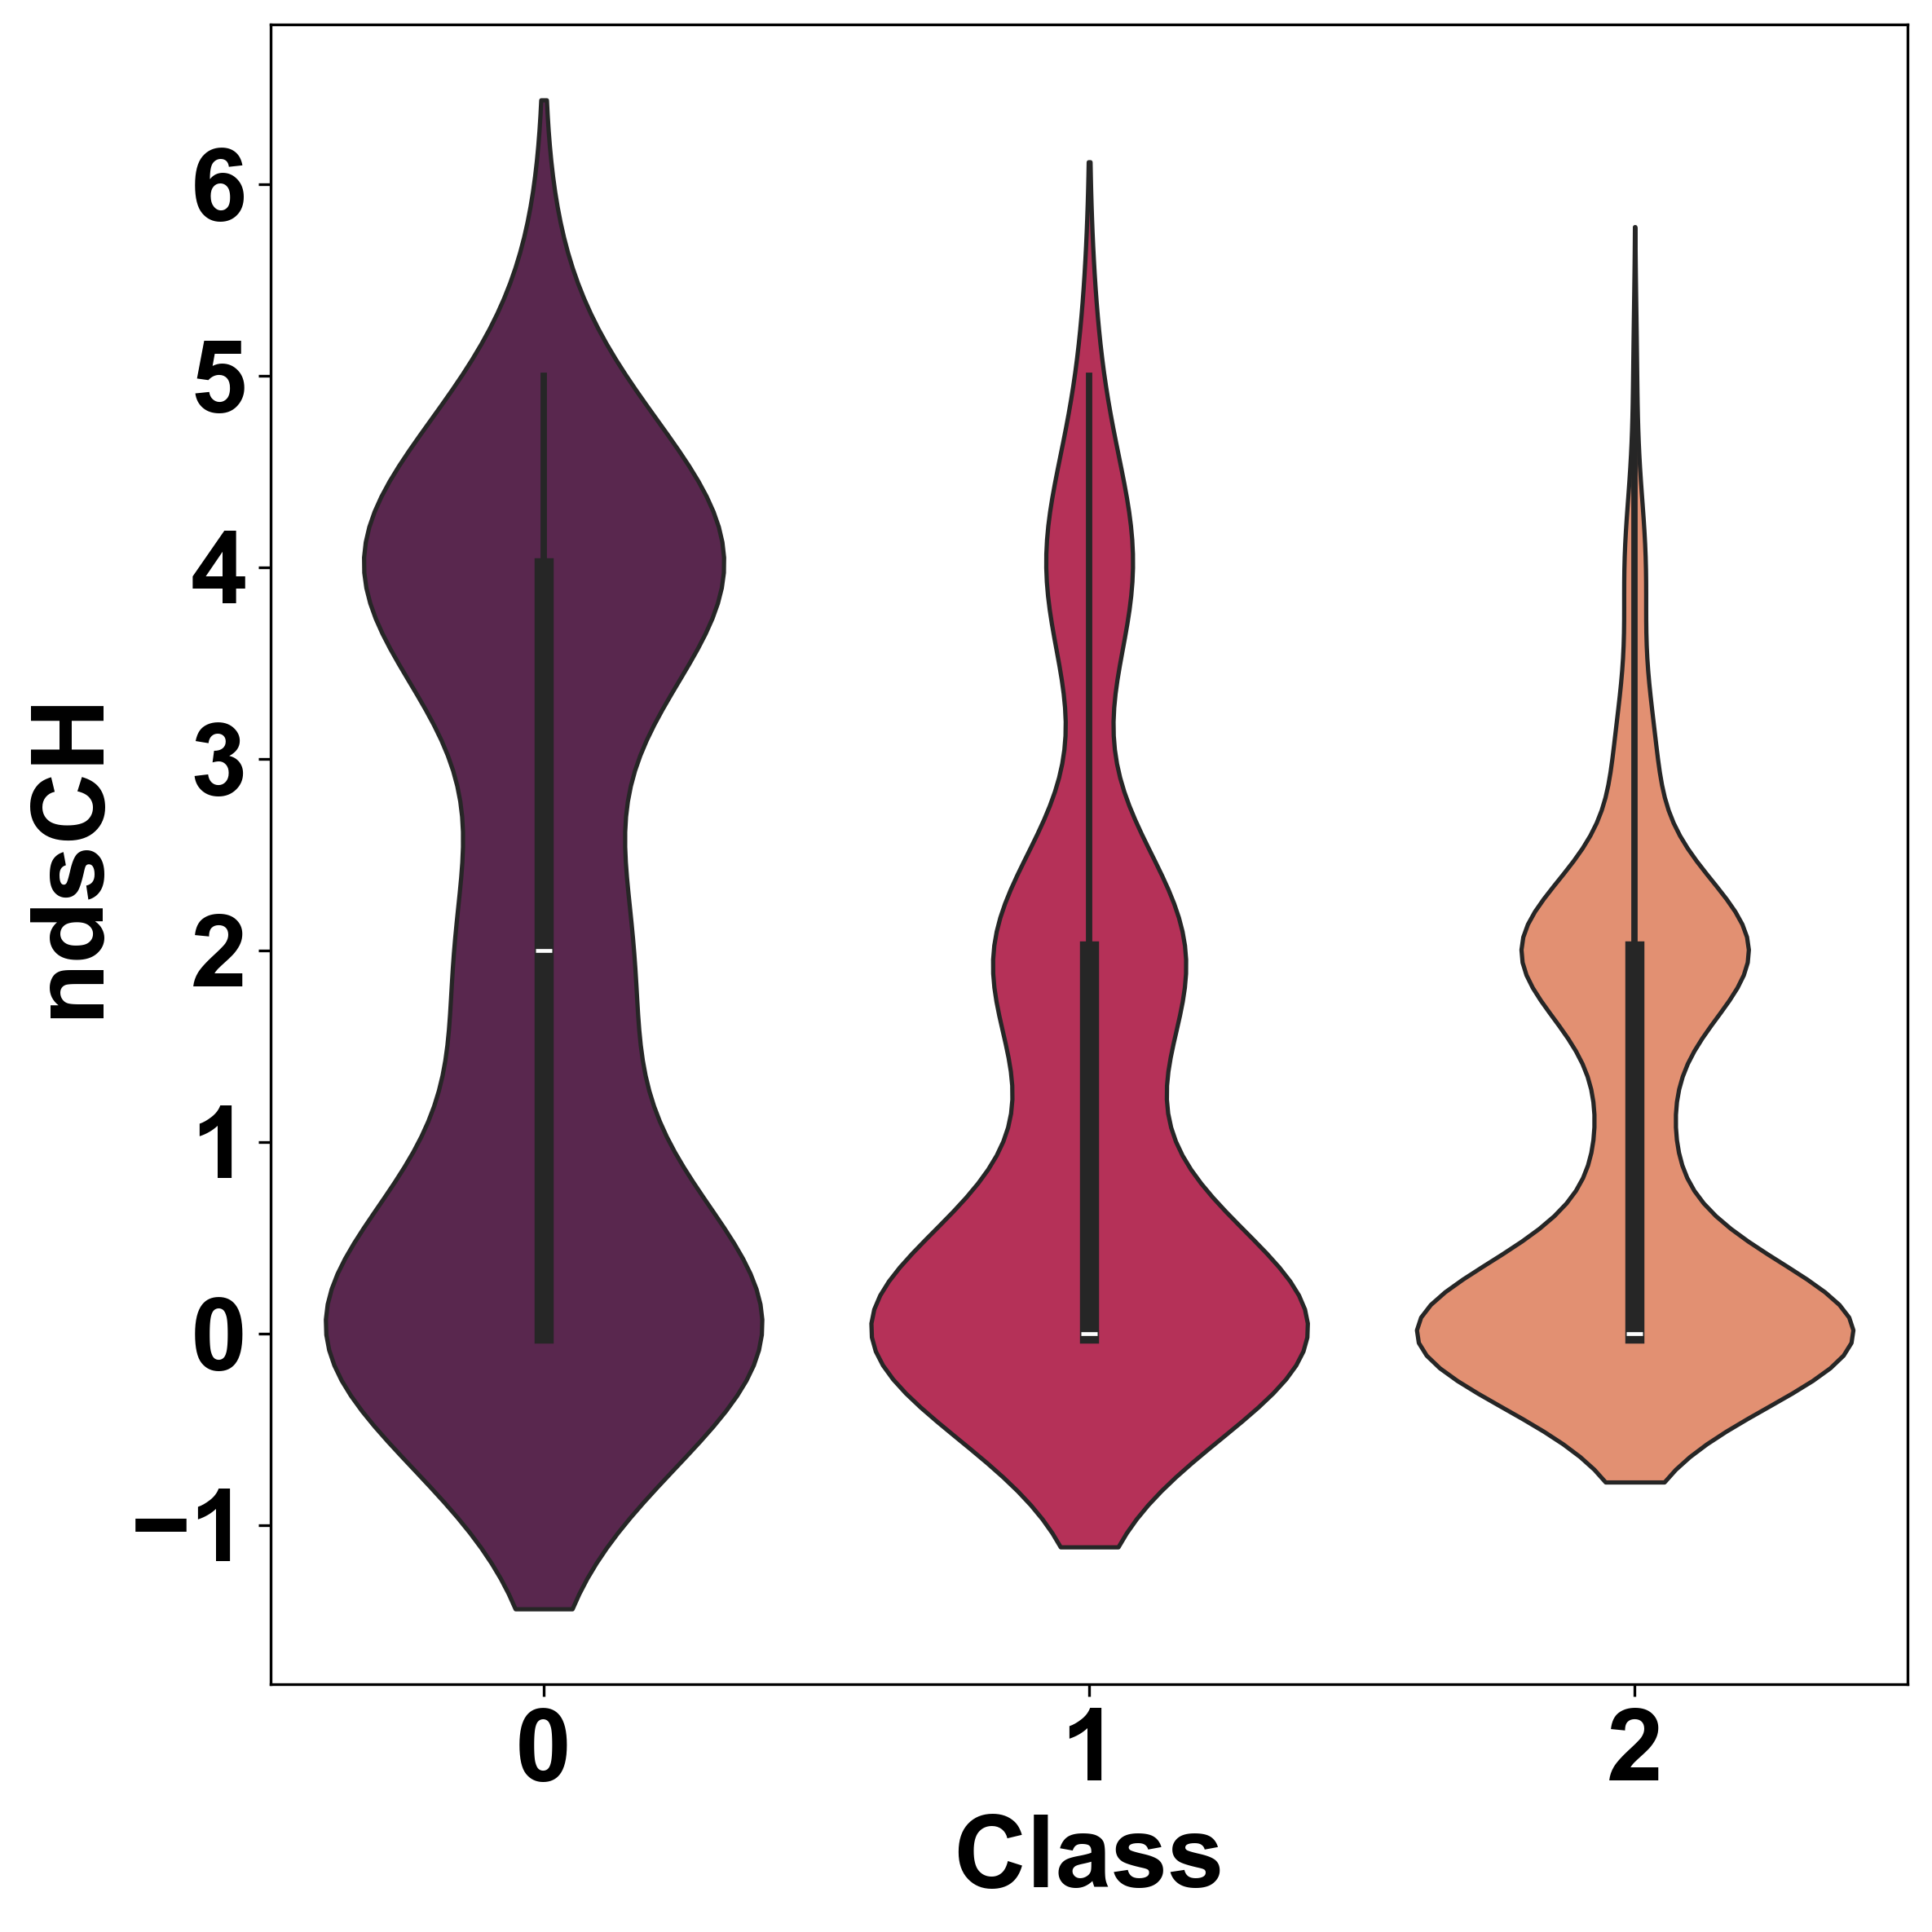

100%|██████████| 4/4 [00:06<00:00,  1.61s/it]


In [300]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and class labels into one DataFrame
plot_df = x_train.copy()
plot_df['Class'] = y_train

for ele in tqdm(feature_importance_df['Feature'].iloc[:4]):
    plt.figure(figsize=(8, 8))
    sns.violinplot(data=plot_df, x='Class', y=ele, palette='rocket')  # ✅ fixed
    plt.xlabel('Class', fontsize=30, fontweight='bold', color='black', family='Arial')
    plt.ylabel(ele, fontsize=30, fontweight='bold', color='black', family='Arial')
    plt.xticks(fontsize=30, fontweight='bold', family='Arial')
    plt.yticks(fontsize=30, fontweight='bold', family='Arial')
    #plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.savefig(f"violin_plot_model2.png{'Feature'}.png", dpi=600, format='png')
    plt.show()


In [301]:
print(df.columns)

Index(['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nB', 'nN',
       'nO', 'nS',
       ...
       'E1s', 'E2s', 'E3s', 'Ts', 'As', 'Vs', 'Ks', 'Ds', 'IC50', 'Class'],
      dtype='object', length=1636)


In [302]:
print(type(top_features))


<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_10597/1918297526.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=feature,


<Figure size 2400x2400 with 0 Axes>

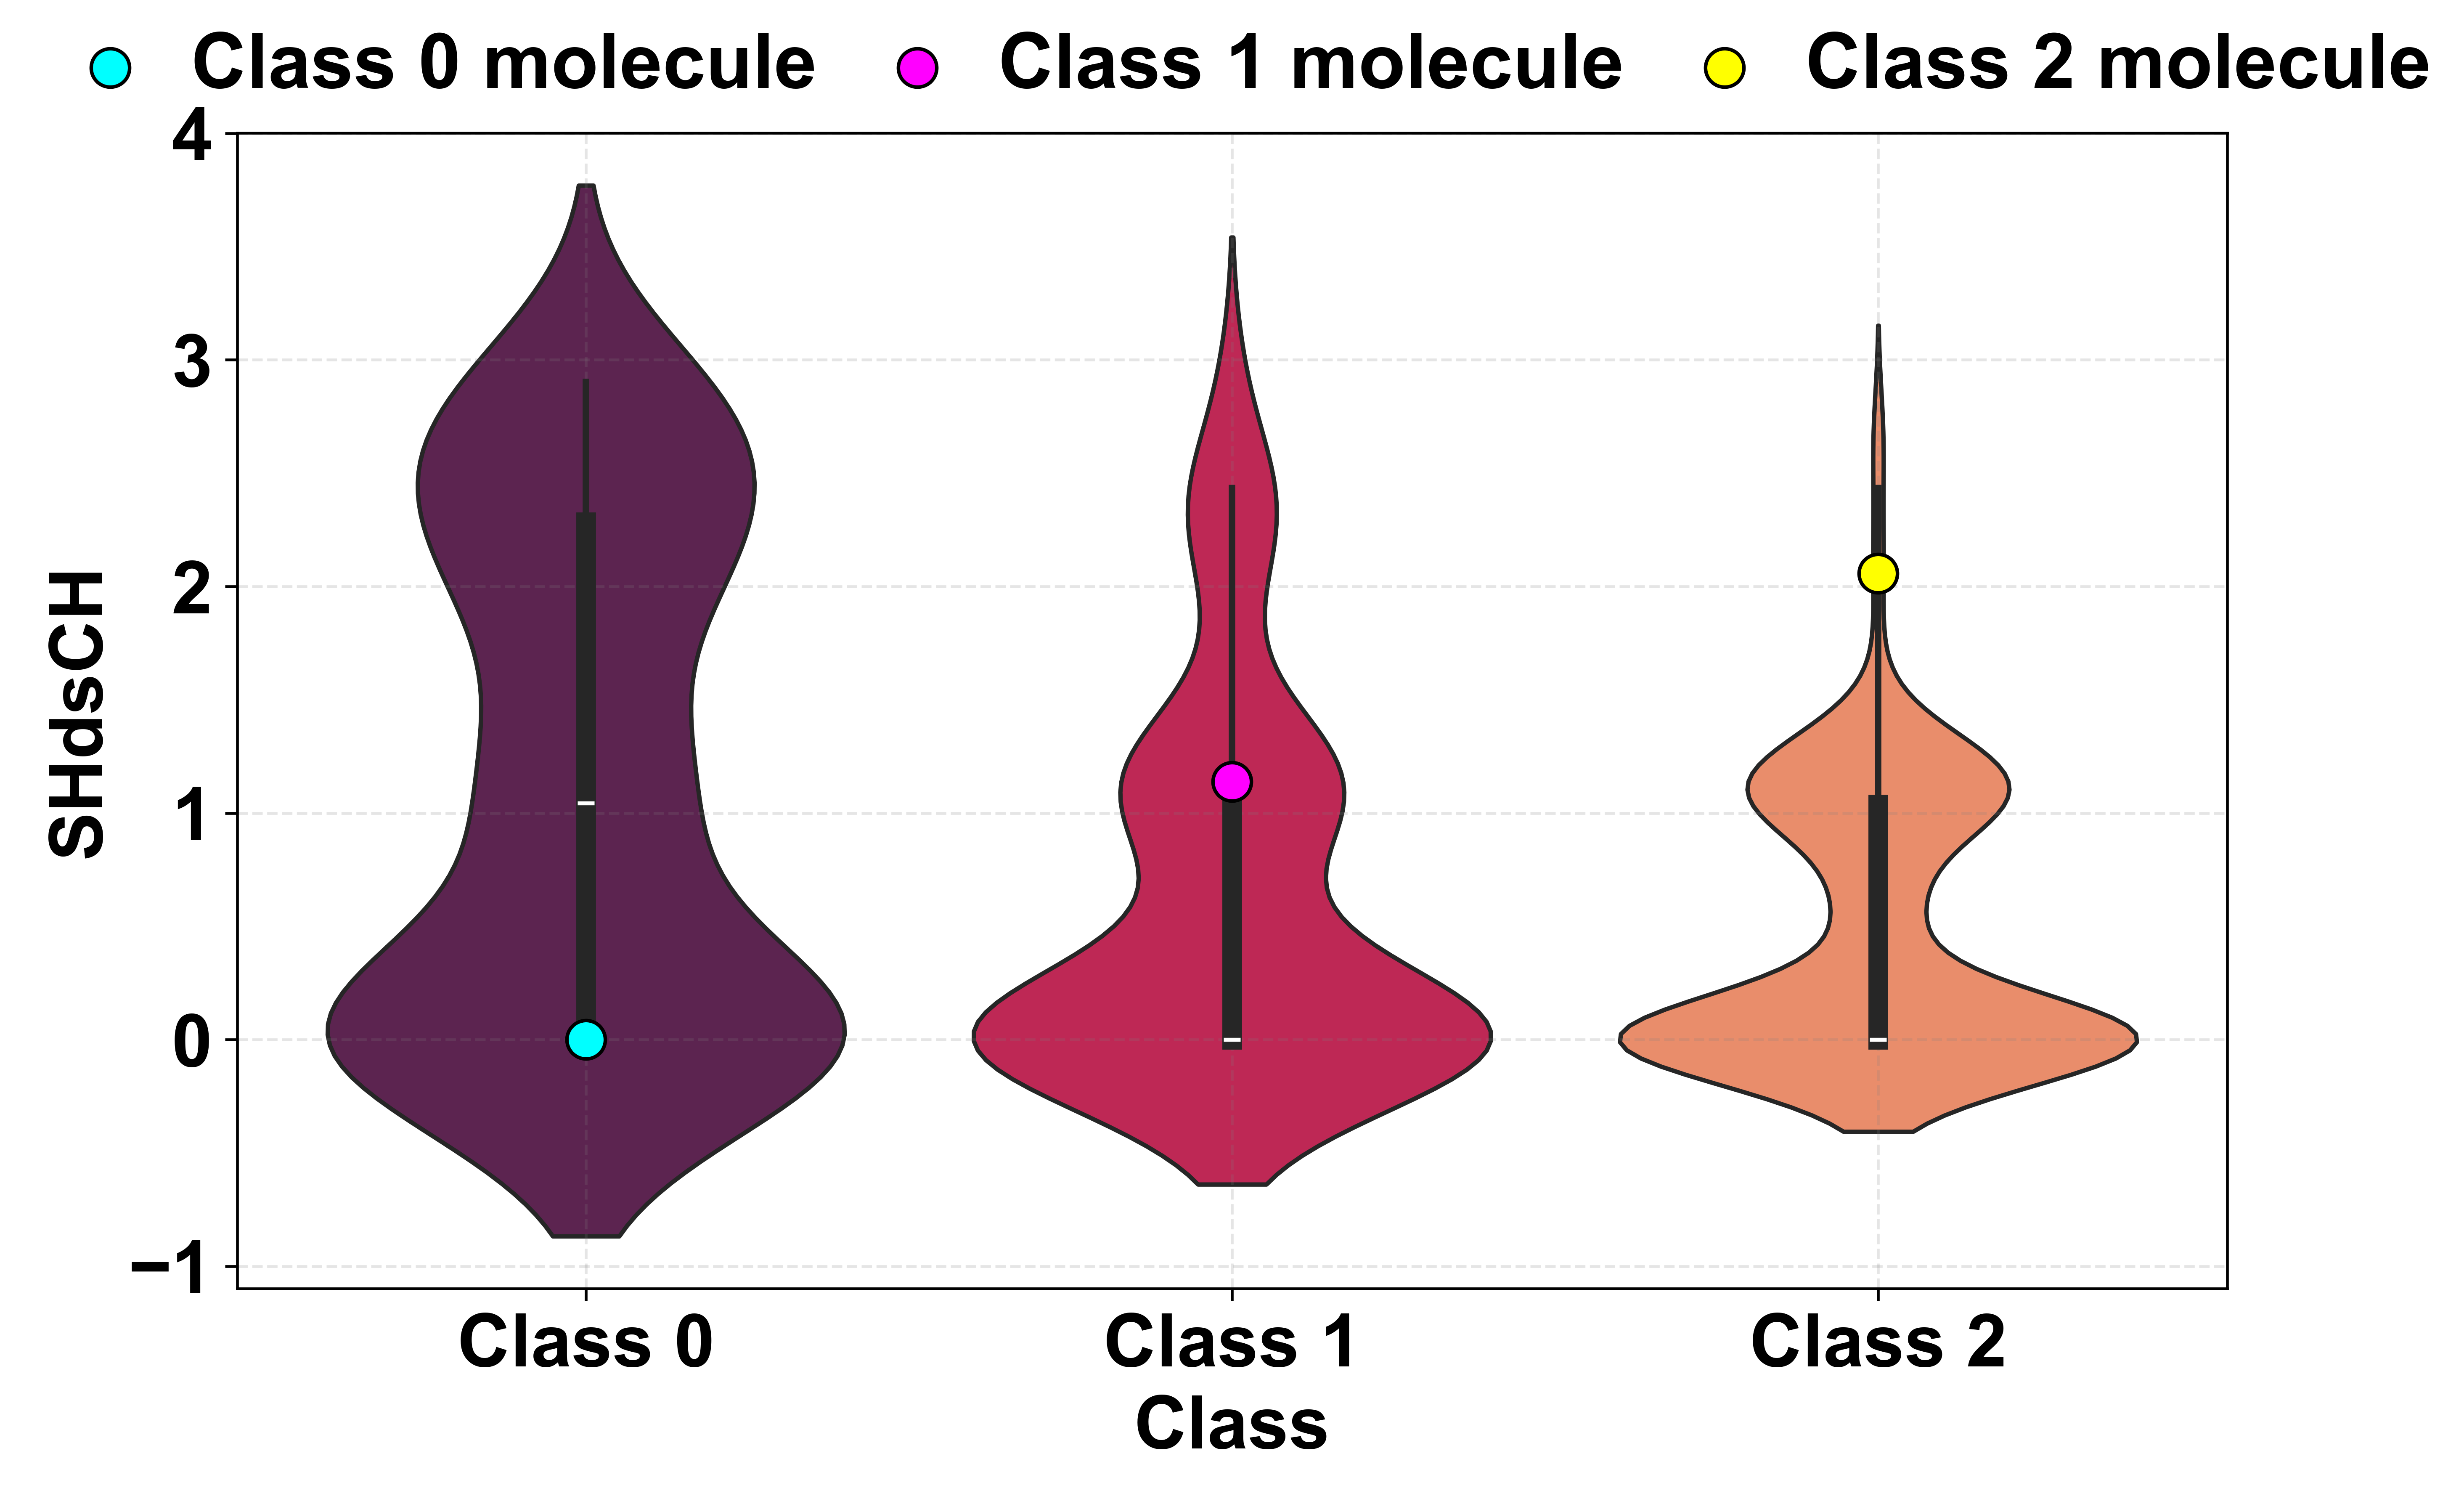

 25%|██▌       | 1/4 [00:02<00:07,  2.36s/it]/tmp/ipykernel_10597/1918297526.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=feature,


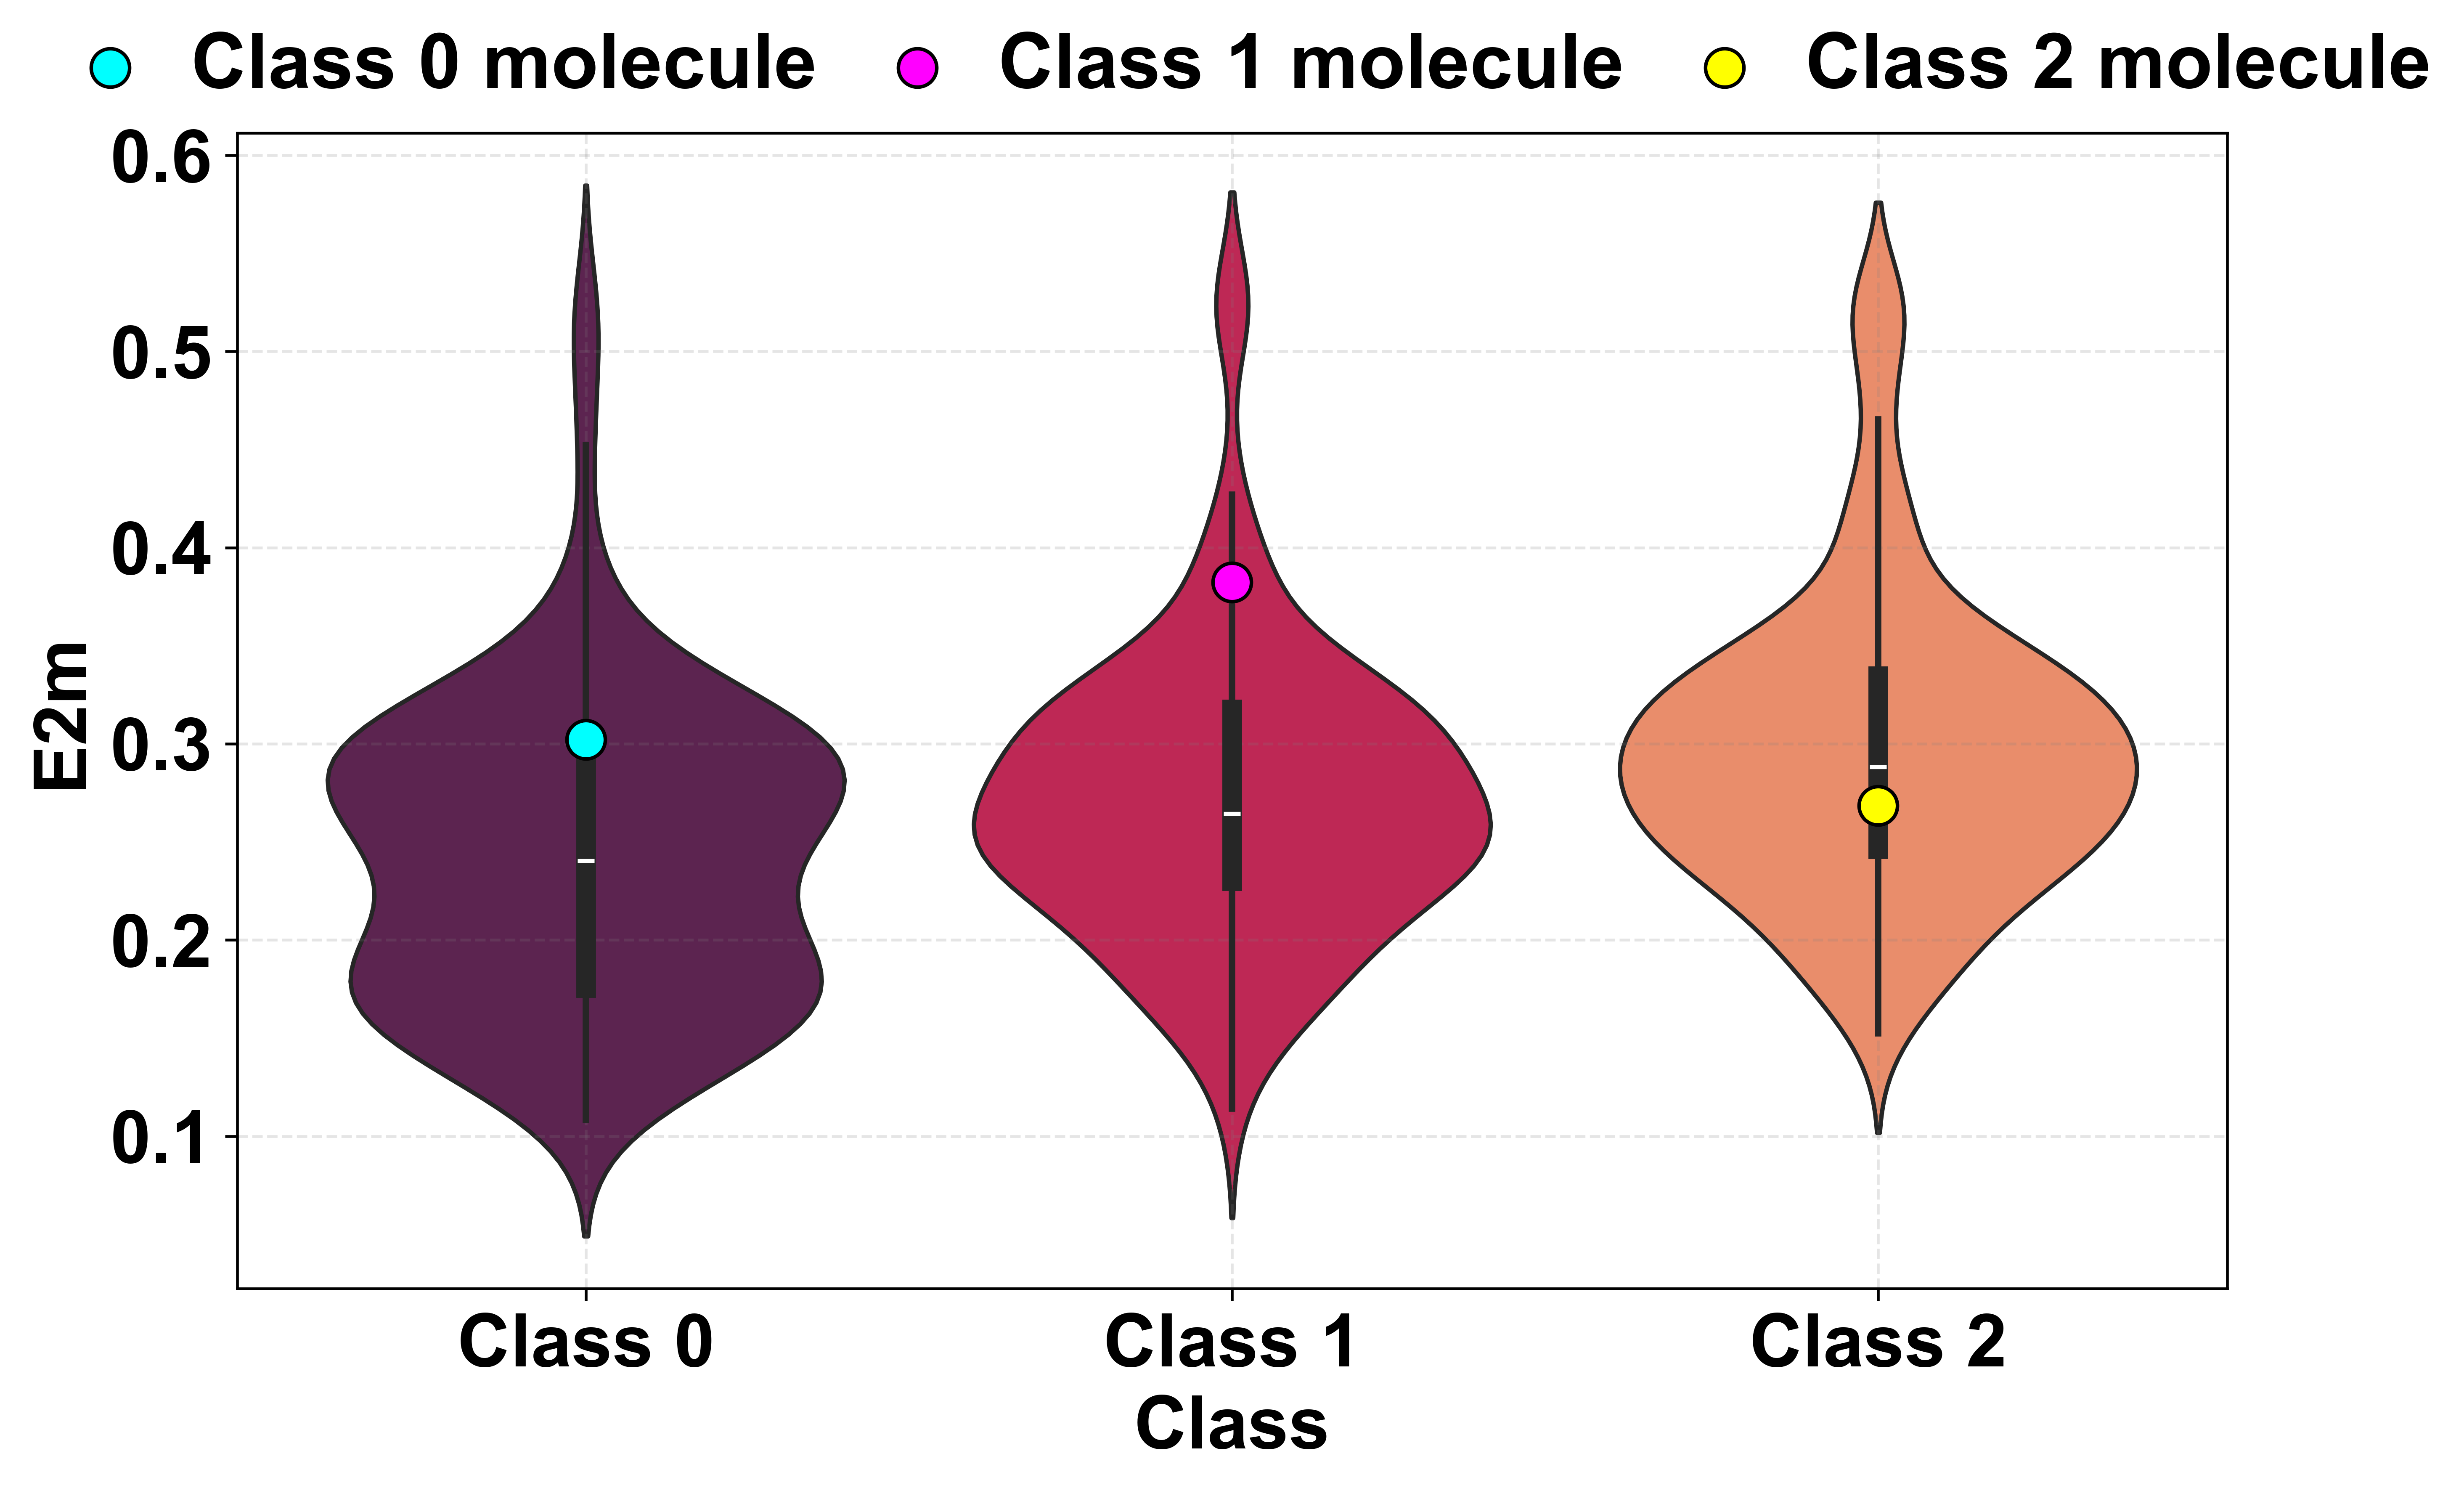

 50%|█████     | 2/4 [00:04<00:04,  2.39s/it]/tmp/ipykernel_10597/1918297526.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=feature,


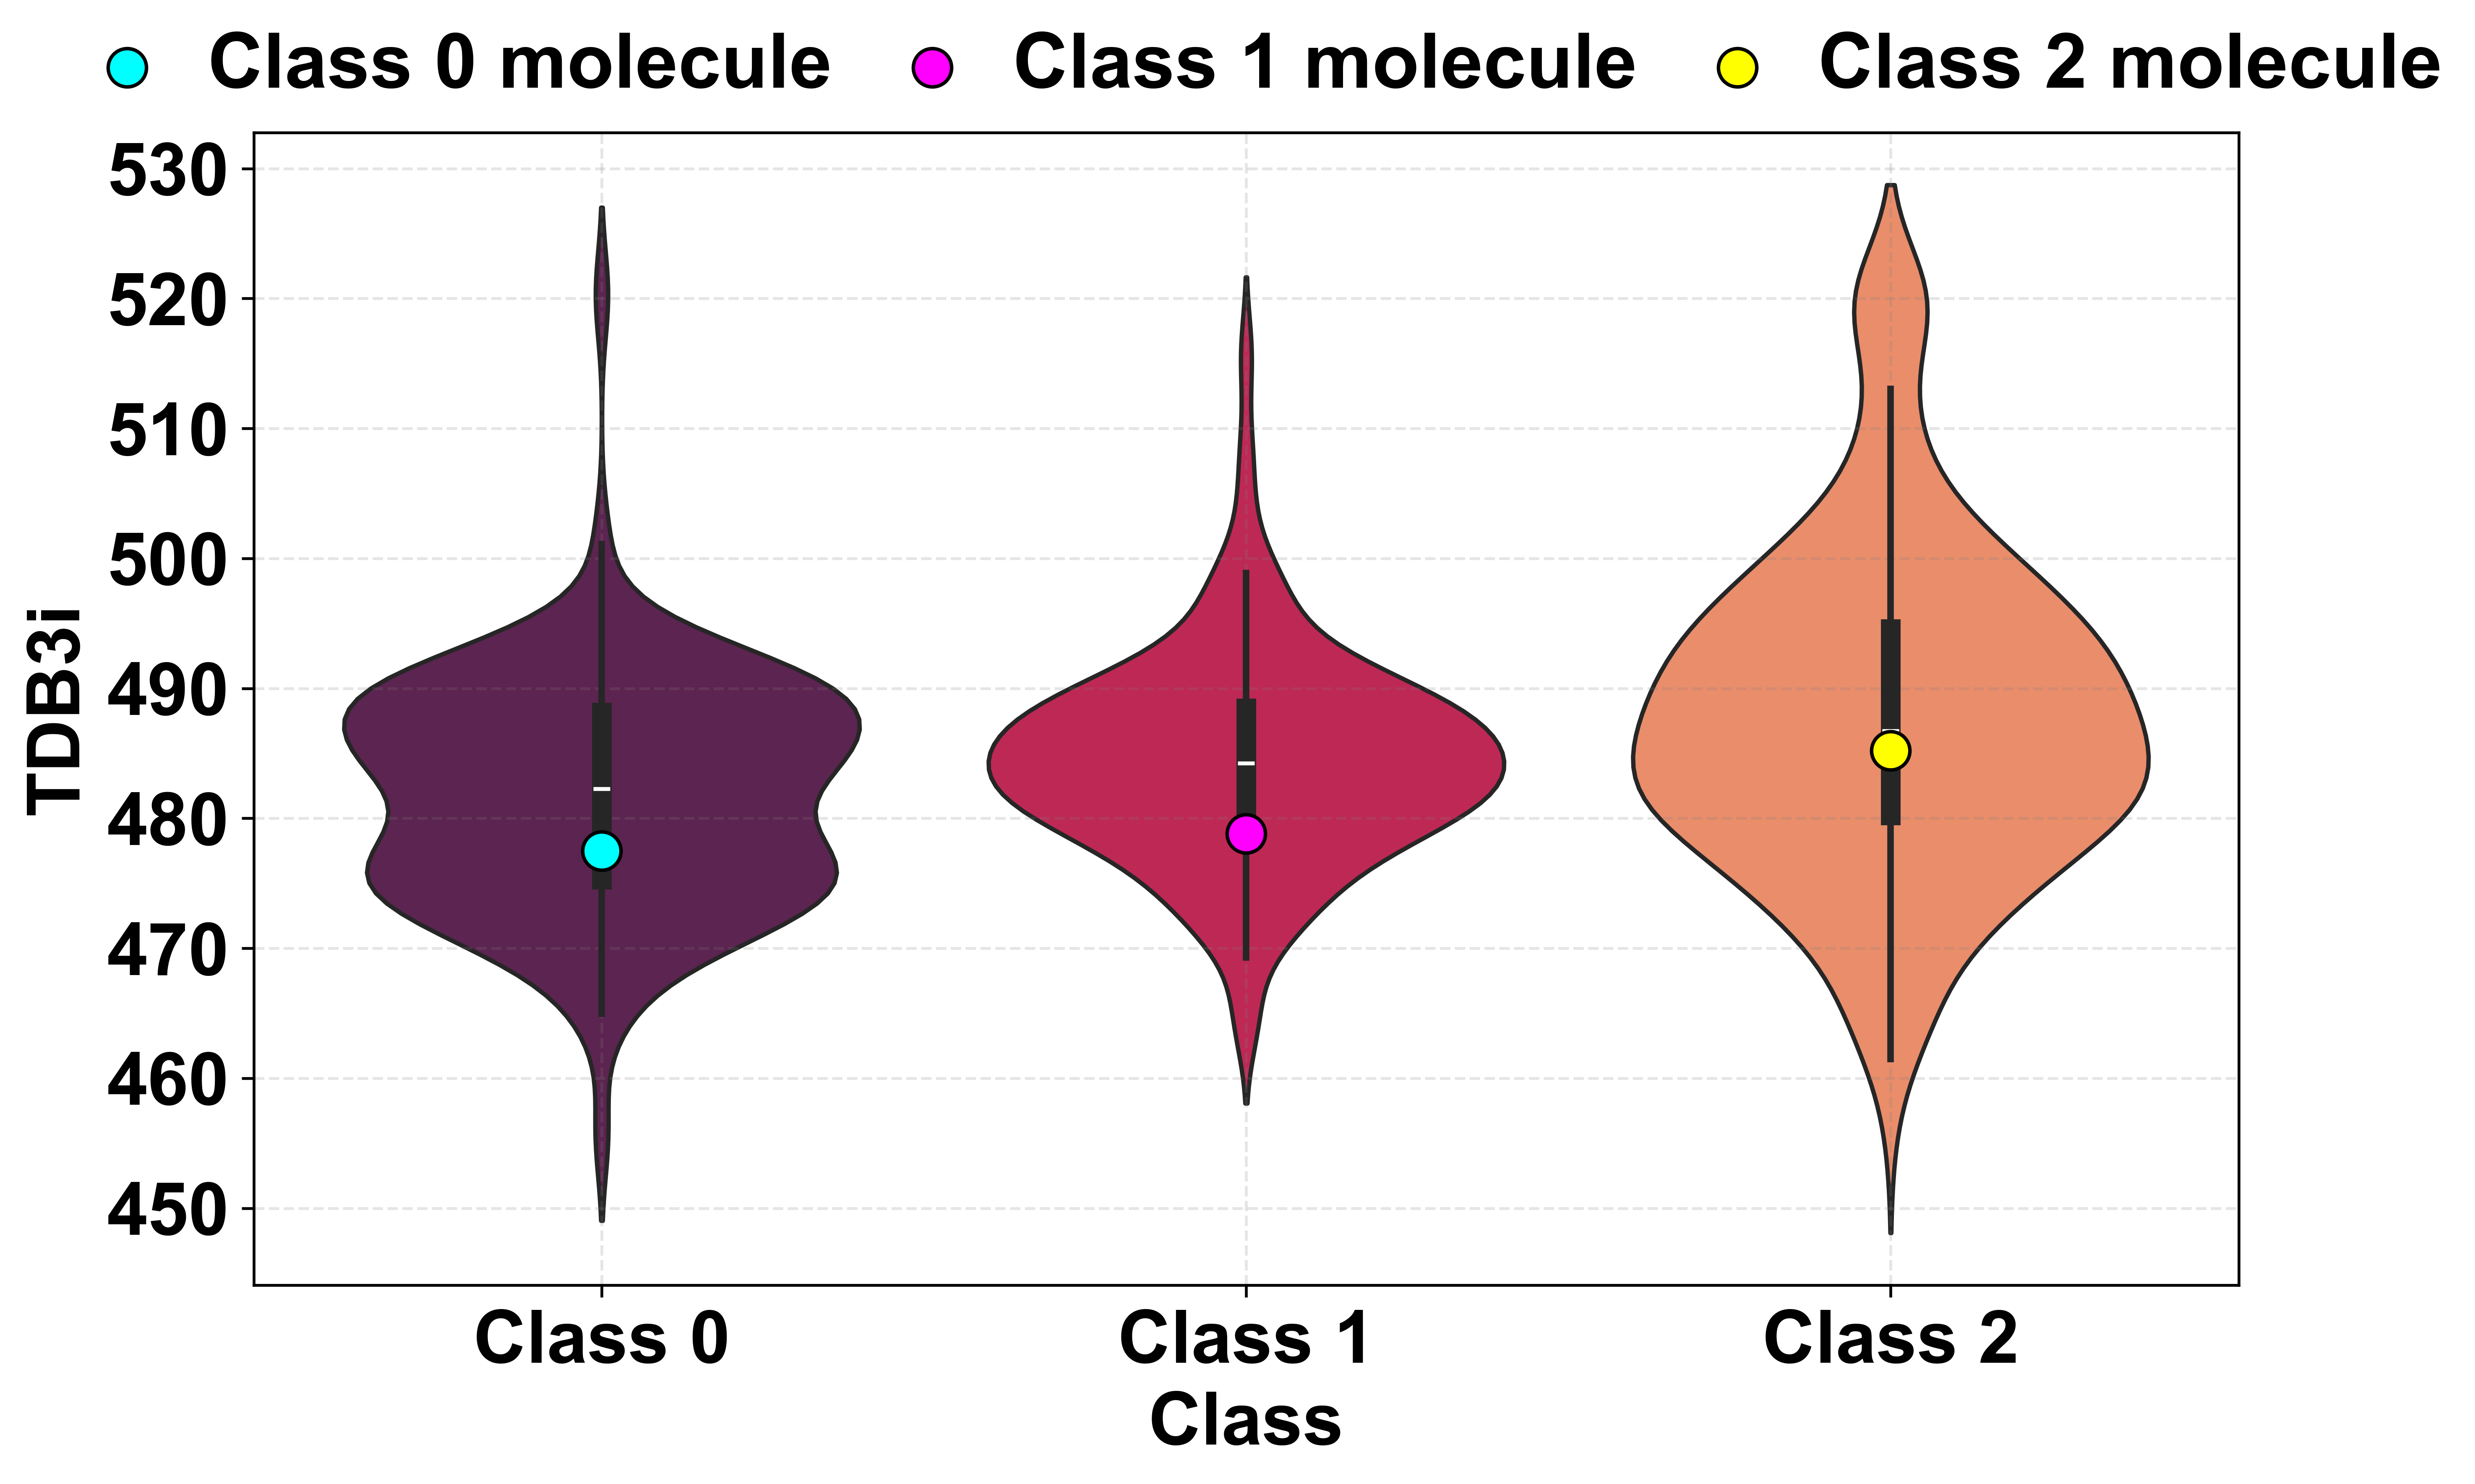

 75%|███████▌  | 3/4 [00:07<00:02,  2.42s/it]/tmp/ipykernel_10597/1918297526.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_df, x='Class', y=feature,


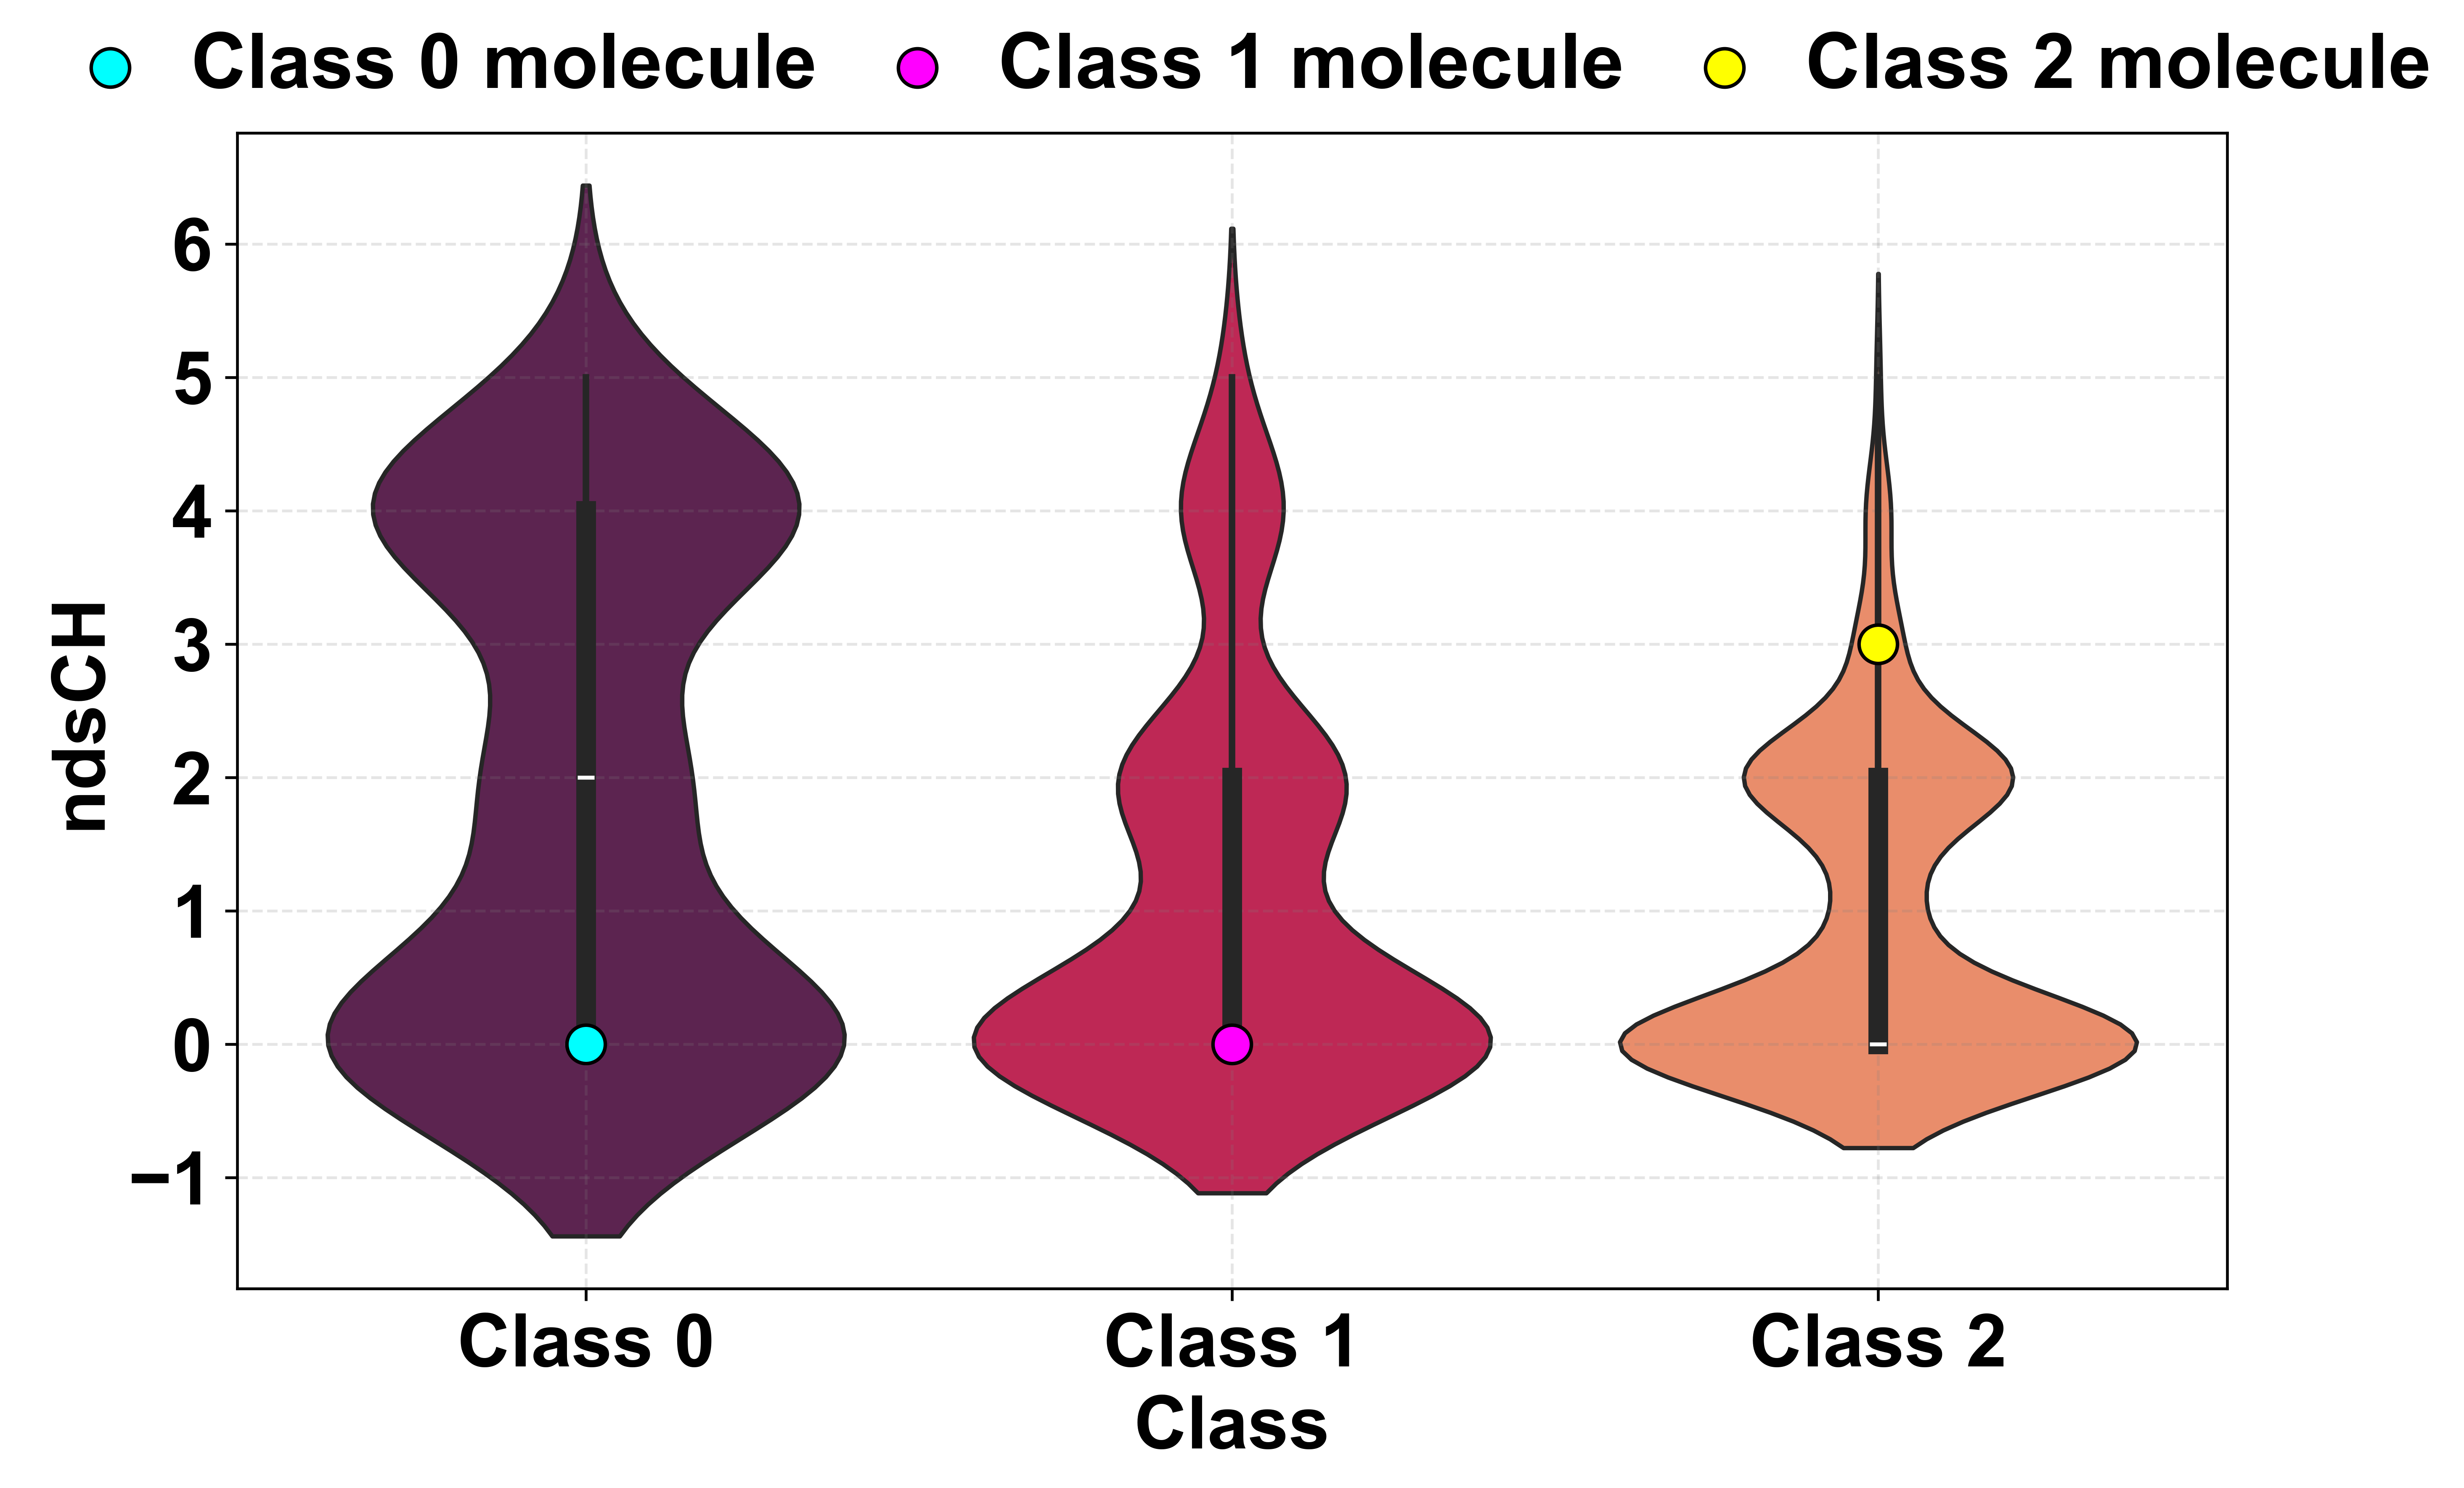

100%|██████████| 4/4 [00:09<00:00,  2.40s/it]


In [303]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define new dot colors that contrast well with rocket palette
dot_colors = ['#00FFFF', '#FF00FF', '#FFFF00']  # Cyan, Magenta, Yellow
bar_labels = ['Class 0', 'Class 1', 'Class 2']
plt.figure(figsize=(8, 8))
# Global settings
plt.rcParams.update({
    'font.family': 'Arial',
    'figure.dpi': 600
})

# Combine features and class labels
plot_df = x_train.copy()
plot_df['Class'] = y_train

for feature in tqdm(feature_importance_df['Feature'].iloc[:4]):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Violin plot with rocket palette
    sns.violinplot(data=plot_df, x='Class', y=feature, 
                   palette='rocket', saturation=0.85, ax=ax)
    
    scatter_handles = []
    for i in range(len(bar_labels)):
        # Sample dot only (no mean line)
        sample_val = plot_df[plot_df['Class'] == i][feature].sample(1).values[0]
        scatter = ax.scatter(i, sample_val,
                           color=dot_colors[i],
                           edgecolors='black',
                           s=120,  # Larger dots
                           linewidths=1,
                           zorder=5,
                           label=f'Class {i} molecule')
        scatter_handles.append(scatter)

    # Styling
    ax.set_xlabel('Class', fontfamily='Arial', fontweight='bold', fontsize=21)
    ax.set_ylabel(feature, fontfamily='Arial', fontweight='bold', fontsize=21)
    
    ax.set_xticks(range(len(bar_labels)))
    ax.set_xticklabels(bar_labels, fontfamily='Arial', fontweight='bold', fontsize=21)
    
    for lbl in ax.get_yticklabels():
        lbl.set_fontfamily('Arial')
        lbl.set_fontweight('bold')
        lbl.set_fontsize(21)

       
    
    ax.legend(
    handles=scatter_handles,
    ncol=3,                         # 3 columns (Mean, Decoy Sample, Inhibitor Sample)
    handletextpad=0.05,             # minimal space between marker and text
    labelspacing=0.1,               # smaller vertical space between entries
    columnspacing=0.3,              # tighter space between columns
    borderpad=0.1,                  # smaller padding around the legend box
    borderaxespad=0.1,              # smaller padding between legend and axes
    loc='upper center',
    bbox_to_anchor=(0.5, 1.10),    # position legend just above plot, centered
    frameon=False,
    framealpha=0.7,                 
    prop={'family': 'Arial', 'weight': 'bold', 'size':22}
)

    # Light grid
    ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.2)
    ax.grid(True, axis='x', linestyle='--', color='gray', alpha=0.2)

    plt.tight_layout()
    plt.savefig(f"violin_plot_{feature}.png", 
               dpi=600, format='png', bbox_inches='tight')
    plt.show()